In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
data = pd.read_csv("data/kc_house_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
data['waterfront'].fillna('NO', inplace=True)

In [7]:
data.yr_renovated.fillna(0, inplace=True)

In [8]:
data.view.fillna('NONE', inplace=True)

In [9]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
data.drop(columns=['id', 'date'], inplace=True)

In [11]:
data

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

      waterfront  view  condition          grade  sqft_above sqft_basement  \
0             NO  NONE    Average      7 Average        1180           0.0   
1             NO  NONE    Average      7 Average        2170         400.0   
2             NO  NONE    Average  6 Low Average         770           0.0   
3             NO  NONE  Very Good      7 Average        1050         910.0   
4             NO  NONE    Average         8 Good        1680           0.0   
...          ...   ...        ...            ...         ...           ...   
21592         NO  NONE    Average         8 Good        1530           0.0   
21593         NO  NONE    Average         8 Good        2310           0.0   
21594         NO  NONE    Average      7 Average        1020           0.0   
21595         NO  NONE    Average         8 Good        1600           0.0   
21596         NO  NONE    Average      7 Average        1020           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955           0.0    98178  47.5112 -122.257           1340   
1          1951        1991.0    98125  47.7210 -122.319           1690   
2          1933           0.0    98028  47.7379 -122.233           2720   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[21597 rows x 19 columns]

In [12]:
#cities and corresponding zipcodes data
cities = {'Algona': [98001], 'Auburn': [98001, 98002, 98003, 98023, 98063, 98071, 98092, 98093], 'Federal Way': [98001, 98003, 98023, 98063, 98093],
         'Beaux Arts Village': [98004], 'Bellevue':[98004, 98005, 98006, 98007, 98008, 98009, 98015], 
          'Clyde Hill': [98004], 'Hunts Point': [98004], 'Yarrow Point': [98004], 'Black Diamond': [98010],
         'Bothell': [98011, 98041, 98028], 'Burton': [98013], 'Vashion': [98013], 'Carnation': [98014],
         'Duvall':[98019], 'Enumclaw': [98022], 'Fall City': [98024], 'Hobart': [98025], 
         'Issaquah': [98027], 'Kent': [98030, 98031, 98032, 98035, 98042, 98064], 'Kirkland':[98033, 98034, 98083],
         'Maple Valley': [98038], 'Medina': [98039], 'Mercer Island': [98040], 'Kenmore': [98028],
         'Covington':[98042], 'North Bend': [98045], 'Pacific':[98047], 'Preston':[98050],
         'Ravensdale':[98051], 'Redmond': [98052, 98053, 98073, 98074], 'Redondo': [98054], 'Renton': [98055, 98056, 98057, 98058, 98059],
         'Newcastle': [98056, 98059,], 'Seahurst':[98062], 'Snoqualmie': [98065, 98068], 'Snoqualmie Pass': [98068],
         'Vashon': [98070], 'Woodinville': [98072], 'Sammamish':[98075, 98075], 'Issaquah': [98075, 98027, 98029],
         'Seattle': [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98111, 98112, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 
                     98126, 98131, 98132, 98133, 98134, 98136, 98138, 98144, 98145, 98146, 98148, 98154, 98155, 98158, 98160, 98161, 98164, 98166, 98168, 98171, 98174, 98177, 98178, 98188, 98198, 98199 ], 
          'Tukwila': [98108, 98138, 98168, 98178, 98188],
         'Shoreline': [98133, 98155, 98177 ], 'Burien': [98146, 98148, 98166, 98168 ], 'Des Moines' : [98148, 98198], 'Normandy Park': [98148, 98166, 98198], 'Seatac': [98148, 98158, 98168, 98188, 98198], 
          'Lake Forest Park': [98155, 98155, 98155], 'Baring': [98224], 'Skykomish': [98288]}

In [13]:
def city_finder(zipcode):

    lst = []
    for key, value in cities.items():
        if zipcode in value:
            lst.append(key)

    if lst != []:
        return lst
    else:
        return None

In [14]:
data['cities'] = data.zipcode.apply(lambda x: city_finder(x))
data['cities']

0        [Seattle, Tukwila]
1                 [Seattle]
2        [Bothell, Kenmore]
3                 [Seattle]
4                 [Redmond]
                ...        
21592             [Seattle]
21593     [Seattle, Burien]
21594             [Seattle]
21595            [Issaquah]
21596             [Seattle]
Name: cities, Length: 21597, dtype: object

In [15]:
data.isna().sum()

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
cities           198
dtype: int64

In [16]:
data.dropna(inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21399 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21399 non-null  float64
 1   bedrooms       21399 non-null  int64  
 2   bathrooms      21399 non-null  float64
 3   sqft_living    21399 non-null  int64  
 4   sqft_lot       21399 non-null  int64  
 5   floors         21399 non-null  float64
 6   waterfront     21399 non-null  object 
 7   view           21399 non-null  object 
 8   condition      21399 non-null  object 
 9   grade          21399 non-null  object 
 10  sqft_above     21399 non-null  int64  
 11  sqft_basement  21399 non-null  object 
 12  yr_built       21399 non-null  int64  
 13  yr_renovated   21399 non-null  float64
 14  zipcode        21399 non-null  int64  
 15  lat            21399 non-null  float64
 16  long           21399 non-null  float64
 17  sqft_living15  21399 non-null  int64  
 18  sqft_l

In [18]:
def binary_cities(lst, city):
    if city in lst:
        return 1
    else:
        return 0

#looping through genre columns to apply binary_genres function to add new columns
for i in cities.keys():
    data[i] = data.cities.apply(lambda x: binary_cities(x, i))

In [19]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'cities', 'Algona', 'Auburn',
       'Federal Way', 'Beaux Arts Village', 'Bellevue', 'Clyde Hill',
       'Hunts Point', 'Yarrow Point', 'Black Diamond', 'Bothell', 'Burton',
       'Vashion', 'Carnation', 'Duvall', 'Enumclaw', 'Fall City', 'Hobart',
       'Issaquah', 'Kent', 'Kirkland', 'Maple Valley', 'Medina',
       'Mercer Island', 'Kenmore', 'Covington', 'North Bend', 'Pacific',
       'Preston', 'Ravensdale', 'Redmond', 'Redondo', 'Renton', 'Newcastle',
       'Seahurst', 'Snoqualmie', 'Snoqualmie Pass', 'Vashon', 'Woodinville',
       'Sammamish', 'Seattle', 'Tukwila', 'Shoreline', 'Burien', 'Des Moines',
       'Normandy Park', 'Seatac', 'Lake Forest Park', 'Baring', 'Skykomish'],
      dtype='object')

In [20]:
t = []
for i in cities.keys():
    print('{}: {}'.format(i, data[i].sum()))
    t.append(data[i].sum())

Algona: 361
Auburn: 1690
Federal Way: 1140
Beaux Arts Village: 317
Bellevue: 1407
Clyde Hill: 317
Hunts Point: 317
Yarrow Point: 317
Black Diamond: 100
Bothell: 478
Burton: 0
Vashion: 0
Carnation: 124
Duvall: 190
Enumclaw: 233
Fall City: 80
Hobart: 0
Issaquah: 1092
Kent: 1201
Kirkland: 977
Maple Valley: 589
Medina: 50
Mercer Island: 282
Kenmore: 283
Covington: 547
North Bend: 220
Pacific: 0
Preston: 0
Ravensdale: 0
Redmond: 1418
Redondo: 0
Renton: 1597
Newcastle: 874
Seahurst: 0
Snoqualmie: 308
Snoqualmie Pass: 0
Vashon: 117
Woodinville: 273
Sammamish: 359
Seattle: 8973
Tukwila: 853
Shoreline: 1194
Burien: 868
Des Moines: 337
Normandy Park: 591
Seatac: 742
Lake Forest Park: 446
Baring: 0
Skykomish: 0


In [21]:
sum(t)

31262

In [22]:
deleted_list = []
for i in cities.keys():
    if data[i].sum() == 0:
        deleted_list.append(i)
        del data[i]
    else: 
        continue

deleted_list

['Burton',
 'Vashion',
 'Hobart',
 'Pacific',
 'Preston',
 'Ravensdale',
 'Redondo',
 'Seahurst',
 'Snoqualmie Pass',
 'Baring',
 'Skykomish']

In [23]:
for i in deleted_list:
    cities.pop(i)

cities

{'Algona': [98001],
 'Auburn': [98001, 98002, 98003, 98023, 98063, 98071, 98092, 98093],
 'Federal Way': [98001, 98003, 98023, 98063, 98093],
 'Beaux Arts Village': [98004],
 'Bellevue': [98004, 98005, 98006, 98007, 98008, 98009, 98015],
 'Clyde Hill': [98004],
 'Hunts Point': [98004],
 'Yarrow Point': [98004],
 'Black Diamond': [98010],
 'Bothell': [98011, 98041, 98028],
 'Carnation': [98014],
 'Duvall': [98019],
 'Enumclaw': [98022],
 'Fall City': [98024],
 'Issaquah': [98075, 98027, 98029],
 'Kent': [98030, 98031, 98032, 98035, 98042, 98064],
 'Kirkland': [98033, 98034, 98083],
 'Maple Valley': [98038],
 'Medina': [98039],
 'Mercer Island': [98040],
 'Kenmore': [98028],
 'Covington': [98042],
 'North Bend': [98045],
 'Redmond': [98052, 98053, 98073, 98074],
 'Renton': [98055, 98056, 98057, 98058, 98059],
 'Newcastle': [98056, 98059],
 'Snoqualmie': [98065, 98068],
 'Vashon': [98070],
 'Woodinville': [98072],
 'Sammamish': [98075, 98075],
 'Seattle': [98101,
  98102,
  98103,
  98104

In [24]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0  221900.0         3       1.00         1180      5650     1.0         NO   
1  538000.0         3       2.25         2570      7242     2.0         NO   
2  180000.0         2       1.00          770     10000     1.0         NO   
3  604000.0         4       3.00         1960      5000     1.0         NO   
4  510000.0         3       2.00         1680      8080     1.0         NO   

   view  condition          grade  ...  Woodinville Sammamish  Seattle  \
0  NONE    Average      7 Average  ...            0         0        1   
1  NONE    Average      7 Average  ...            0         0        1   
2  NONE    Average  6 Low Average  ...            0         0        0   
3  NONE  Very Good      7 Average  ...            0         0        1   
4  NONE    Average         8 Good  ...            0         0        0   

   Tukwila  Shoreline  Burien  Des Moines  Normandy Park  Seatac  \
0        1          0       0           0              0       0   
1        0          0       0           0              0       0   
2        0          0       0           0              0       0   
3        0          0       0           0              0       0   
4        0          0       0           0              0       0   

  Lake Forest Park  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 58 columns]

In [25]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'cities', 'Algona', 'Auburn',
       'Federal Way', 'Beaux Arts Village', 'Bellevue', 'Clyde Hill',
       'Hunts Point', 'Yarrow Point', 'Black Diamond', 'Bothell', 'Carnation',
       'Duvall', 'Enumclaw', 'Fall City', 'Issaquah', 'Kent', 'Kirkland',
       'Maple Valley', 'Medina', 'Mercer Island', 'Kenmore', 'Covington',
       'North Bend', 'Redmond', 'Renton', 'Newcastle', 'Snoqualmie', 'Vashon',
       'Woodinville', 'Sammamish', 'Seattle', 'Tukwila', 'Shoreline', 'Burien',
       'Des Moines', 'Normandy Park', 'Seatac', 'Lake Forest Park'],
      dtype='object')

In [26]:
data.waterfront.replace('NO', 0, inplace=True)
data.waterfront.replace('YES', 1, inplace=True)

In [27]:
data.waterfront.value_counts()

0    21253
1      146
Name: waterfront, dtype: int64

In [28]:
data.sqft_basement.unique()
data.sqft_basement.replace('?', '0', inplace=True)

In [29]:
data.sqft_basement = data.sqft_basement.astype('float')

In [30]:
data['has_basement'] = data.sqft_basement.apply(lambda x: 0 if x == 0.0 else 1)

In [31]:
data['has_basement'].value_counts()

0    13122
1     8277
Name: has_basement, dtype: int64

In [32]:
data.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [33]:
data['recently_renovated'] = data.yr_renovated.apply(lambda x: 0 if x < 2000 else 1)

In [34]:
data.recently_renovated.value_counts()

0    21021
1      378
Name: recently_renovated, dtype: int64

In [35]:
data.grade.unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [36]:
data.grade = data.grade.astype('category')

In [37]:
data.grade.unique()

['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better', ..., '10 Very Good', '12 Luxury', '4 Low', '3 Poor', '13 Mansion']
Length: 11
Categories (11, object): ['10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion', ..., '6 Low Average', '7 Average', '8 Good', '9 Better']

In [38]:
data.grade = data.grade.cat.reorder_categories(['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
                                                '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])

In [39]:
data.grade.cat.codes

0        4
1        4
2        3
3        4
4        5
        ..
21592    5
21593    5
21594    4
21595    5
21596    4
Length: 21399, dtype: int8

In [40]:
data.grade

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21399, dtype: category
Categories (11, object): ['3 Poor', '4 Low', '5 Fair', '6 Low Average', ..., '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']

In [41]:
data.condition = data.condition.astype('category')

In [42]:
data.condition = data.condition.cat.reorder_categories(['Fair', 'Poor', 'Average',
                                                        'Good', 'Very Good'])
data.condition

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21399, dtype: category
Categories (5, object): ['Fair', 'Poor', 'Average', 'Good', 'Very Good']

In [43]:
data.condition.cat.codes

0        2
1        2
2        2
3        4
4        2
        ..
21592    2
21593    2
21594    2
21595    2
21596    2
Length: 21399, dtype: int8

In [44]:
data.view.unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [45]:
data.view = data.view.astype('category')

In [46]:
data.view = data.view.cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])

In [47]:
data.view.cat.codes

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Length: 21399, dtype: int8

In [48]:
cities

{'Algona': [98001],
 'Auburn': [98001, 98002, 98003, 98023, 98063, 98071, 98092, 98093],
 'Federal Way': [98001, 98003, 98023, 98063, 98093],
 'Beaux Arts Village': [98004],
 'Bellevue': [98004, 98005, 98006, 98007, 98008, 98009, 98015],
 'Clyde Hill': [98004],
 'Hunts Point': [98004],
 'Yarrow Point': [98004],
 'Black Diamond': [98010],
 'Bothell': [98011, 98041, 98028],
 'Carnation': [98014],
 'Duvall': [98019],
 'Enumclaw': [98022],
 'Fall City': [98024],
 'Issaquah': [98075, 98027, 98029],
 'Kent': [98030, 98031, 98032, 98035, 98042, 98064],
 'Kirkland': [98033, 98034, 98083],
 'Maple Valley': [98038],
 'Medina': [98039],
 'Mercer Island': [98040],
 'Kenmore': [98028],
 'Covington': [98042],
 'North Bend': [98045],
 'Redmond': [98052, 98053, 98073, 98074],
 'Renton': [98055, 98056, 98057, 98058, 98059],
 'Newcastle': [98056, 98059],
 'Snoqualmie': [98065, 98068],
 'Vashon': [98070],
 'Woodinville': [98072],
 'Sammamish': [98075, 98075],
 'Seattle': [98101,
  98102,
  98103,
  98104

In [49]:
sum_list = []
for i in cities.keys():
    print('{} : {}'.format(i, data[i].sum()))
    sum_list.append(data[i].sum())


Algona : 361
Auburn : 1690
Federal Way : 1140
Beaux Arts Village : 317
Bellevue : 1407
Clyde Hill : 317
Hunts Point : 317
Yarrow Point : 317
Black Diamond : 100
Bothell : 478
Carnation : 124
Duvall : 190
Enumclaw : 233
Fall City : 80
Issaquah : 1092
Kent : 1201
Kirkland : 977
Maple Valley : 589
Medina : 50
Mercer Island : 282
Kenmore : 283
Covington : 547
North Bend : 220
Redmond : 1418
Renton : 1597
Newcastle : 874
Snoqualmie : 308
Vashon : 117
Woodinville : 273
Sammamish : 359
Seattle : 8973
Tukwila : 853
Shoreline : 1194
Burien : 868
Des Moines : 337
Normandy Park : 591
Seatac : 742
Lake Forest Park : 446


In [50]:
city_dfs = {}

for i in cities.keys():
    
    df = data[data[i] == 1]
    city_dfs[i] = df

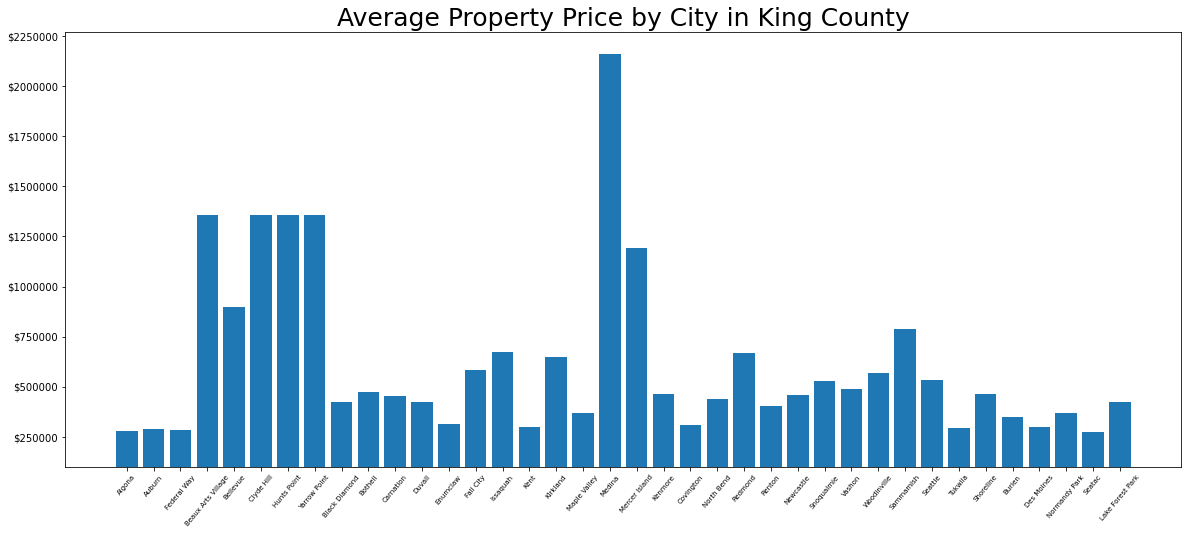

In [51]:
mean_prices = []

for key, value in city_dfs.items():
    mean = city_dfs[key]['price'].mean()
    mean_prices.append(mean)

fig, ax = plt.subplots(figsize=(20,8))

ax.bar(list(range(len(city_dfs.keys()))), mean_prices)
ax.set_xticks(list(range(len(city_dfs.keys()))))
ax.set_xticklabels(city_dfs.keys(), rotation =50, fontsize=7)
ax.set_yticks(list(range(0, 2500000, 250000)))
ax.set_yticklabels(['${}'.format(i) for i in range(0,2500000, 250000)])

ax.set_ylim(100000)

ax.set_title('Average Property Price by City in King County', fontsize=25)


plt.show()

In [52]:
#seems like hunts point yarrow point clyde hill and beaux arts village might all be the same place

data[(data['Beaux Arts Village'] == 1) & (data['Clyde Hill'] == 1) & (data['Hunts Point'] ==1) & (data['Yarrow Point']) ==1]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
66      975000.0         4       2.50         2720     11049     2.0   
69     1330000.0         5       2.25         3200     20158     1.0   
103    1090000.0         3       2.50         2920      8113     2.0   
125    1450000.0         4       2.75         2750     17789     1.5   
269    2900000.0         4       3.25         5050     20100     1.5   
...          ...       ...        ...          ...       ...     ...   
21457  1750000.0         4       2.75         3560      8975     2.0   
21514  3000000.0         4       3.75         5090     14823     1.0   
21517   999999.0         3       2.50         2100      4097     2.0   
21552  1700000.0         4       3.50         3830      8963     2.0   
21584  1540000.0         5       3.75         4470      8088     2.0   

       waterfront     view condition         grade  ...  Seattle  Tukwila  \
66              0     NONE   Average  10 Very Good  ...        0        0   
69              0     NONE   Average        8 Good  ...        0        0   
103             0     NONE   Average        8 Good  ...        0        0   
125             0     NONE   Average        8 Good  ...        0        0   
269             0  AVERAGE   Average  11 Excellent  ...        0        0   
...           ...      ...       ...           ...  ...      ...      ...   
21457           0     NONE   Average  10 Very Good  ...        0        0   
21514           0     NONE   Average  11 Excellent  ...        0        0   
21517           0     NONE   Average      9 Better  ...        0        0   
21552           0     NONE   Average  10 Very Good  ...        0        0   
21584           0     NONE   Average  11 Excellent  ...        0        0   

       Shoreline  Burien  Des Moines  Normandy Park  Seatac  Lake Forest Park  \
66             0       0           0              0       0                 0   
69             0       0           0              0       0                 0   
103            0       0           0              0       0                 0   
125            0       0           0              0       0                 0   
269            0       0           0              0       0                 0   
...          ...     ...         ...            ...     ...               ...   
21457          0       0           0              0       0                 0   
21514          0       0           0              0       0                 0   
21517          0       0           0              0       0                 0   
21552          0       0           0              0       0                 0   
21584          0       0           0              0       0                 0   

       has_basement recently_renovated  
66                0                  0  
69                1                  0  
103               0                  1  
125               1                  0  
269               1                  0  
...             ...                ...  
21457             0                  0  
21514             1                  0  
21517             0                  0  
21552             1                  0  
21584             0                  0  

[317 rows x 60 columns]

In [53]:
city_dfs.keys()

dict_keys(['Algona', 'Auburn', 'Federal Way', 'Beaux Arts Village', 'Bellevue', 'Clyde Hill', 'Hunts Point', 'Yarrow Point', 'Black Diamond', 'Bothell', 'Carnation', 'Duvall', 'Enumclaw', 'Fall City', 'Issaquah', 'Kent', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island', 'Kenmore', 'Covington', 'North Bend', 'Redmond', 'Renton', 'Newcastle', 'Snoqualmie', 'Vashon', 'Woodinville', 'Sammamish', 'Seattle', 'Tukwila', 'Shoreline', 'Burien', 'Des Moines', 'Normandy Park', 'Seatac', 'Lake Forest Park'])

In [54]:
#Yarrow Point will represent these three cities
city_dfs.pop('Beaux Arts Village')
city_dfs.pop('Clyde Hill')
city_dfs.pop('Hunts Point')

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
66      975000.0         4       2.50         2720     11049     2.0   
69     1330000.0         5       2.25         3200     20158     1.0   
103    1090000.0         3       2.50         2920      8113     2.0   
125    1450000.0         4       2.75         2750     17789     1.5   
269    2900000.0         4       3.25         5050     20100     1.5   
...          ...       ...        ...          ...       ...     ...   
21457  1750000.0         4       2.75         3560      8975     2.0   
21514  3000000.0         4       3.75         5090     14823     1.0   
21517   999999.0         3       2.50         2100      4097     2.0   
21552  1700000.0         4       3.50         3830      8963     2.0   
21584  1540000.0         5       3.75         4470      8088     2.0   

       waterfront     view condition         grade  ...  Seattle  Tukwila  \
66              0     NONE   Average  10 Very Good  ...        0        0   
69              0     NONE   Average        8 Good  ...        0        0   
103             0     NONE   Average        8 Good  ...        0        0   
125             0     NONE   Average        8 Good  ...        0        0   
269             0  AVERAGE   Average  11 Excellent  ...        0        0   
...           ...      ...       ...           ...  ...      ...      ...   
21457           0     NONE   Average  10 Very Good  ...        0        0   
21514           0     NONE   Average  11 Excellent  ...        0        0   
21517           0     NONE   Average      9 Better  ...        0        0   
21552           0     NONE   Average  10 Very Good  ...        0        0   
21584           0     NONE   Average  11 Excellent  ...        0        0   

       Shoreline  Burien  Des Moines  Normandy Park  Seatac  Lake Forest Park  \
66             0       0           0              0       0                 0   
69             0       0           0              0       0                 0   
103            0       0           0              0       0                 0   
125            0       0           0              0       0                 0   
269            0       0           0              0       0                 0   
...          ...     ...         ...            ...     ...               ...   
21457          0       0           0              0       0                 0   
21514          0       0           0              0       0                 0   
21517          0       0           0              0       0                 0   
21552          0       0           0              0       0                 0   
21584          0       0           0              0       0                 0   

       has_basement recently_renovated  
66                0                  0  
69                1                  0  
103               0                  1  
125               1                  0  
269               1                  0  
...             ...                ...  
21457             0                  0  
21514             1                  0  
21517             0                  0  
21552             1                  0  
21584             0                  0  

[317 rows x 60 columns]

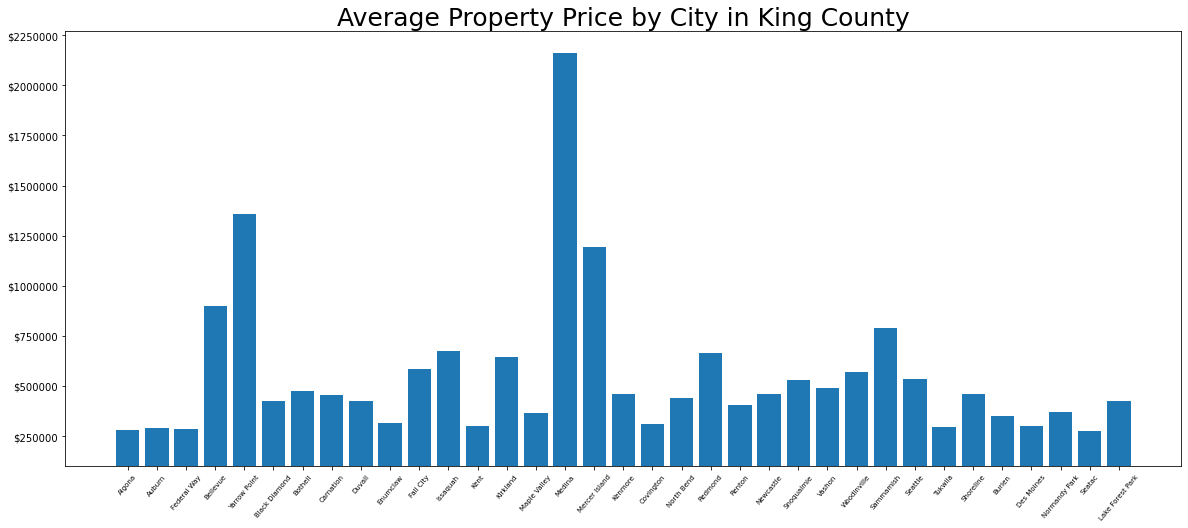

In [55]:
mean_prices = []

for key, values in city_dfs.items():
    mean = city_dfs[key]['price'].mean()
    mean_prices.append(mean)

    
    
fig, ax = plt.subplots(figsize=(20,8))

ax.bar(list(range(len(city_dfs.keys()))), mean_prices)
ax.set_xticks(list(range(len(city_dfs.keys()))))
ax.set_xticklabels(city_dfs.keys(), rotation =50, fontsize=7)
ax.set_yticks(list(range(0, 2500000, 250000)))
ax.set_yticklabels(['${}'.format(i) for i in range(0,2500000, 250000)])

ax.set_ylim(100000)

ax.set_title('Average Property Price by City in King County', fontsize=25)

plt.show()

In [56]:
data.columns, data.view

(Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
        'sqft_living15', 'sqft_lot15', 'cities', 'Algona', 'Auburn',
        'Federal Way', 'Beaux Arts Village', 'Bellevue', 'Clyde Hill',
        'Hunts Point', 'Yarrow Point', 'Black Diamond', 'Bothell', 'Carnation',
        'Duvall', 'Enumclaw', 'Fall City', 'Issaquah', 'Kent', 'Kirkland',
        'Maple Valley', 'Medina', 'Mercer Island', 'Kenmore', 'Covington',
        'North Bend', 'Redmond', 'Renton', 'Newcastle', 'Snoqualmie', 'Vashon',
        'Woodinville', 'Sammamish', 'Seattle', 'Tukwila', 'Shoreline', 'Burien',
        'Des Moines', 'Normandy Park', 'Seatac', 'Lake Forest Park',
        'has_basement', 'recently_renovated'],
       dtype='object'),
 0        NONE
 1        NONE
 2        NONE
 3        NONE
 4        NONE
          ... 
 21592    NONE


boxplot data for Algona


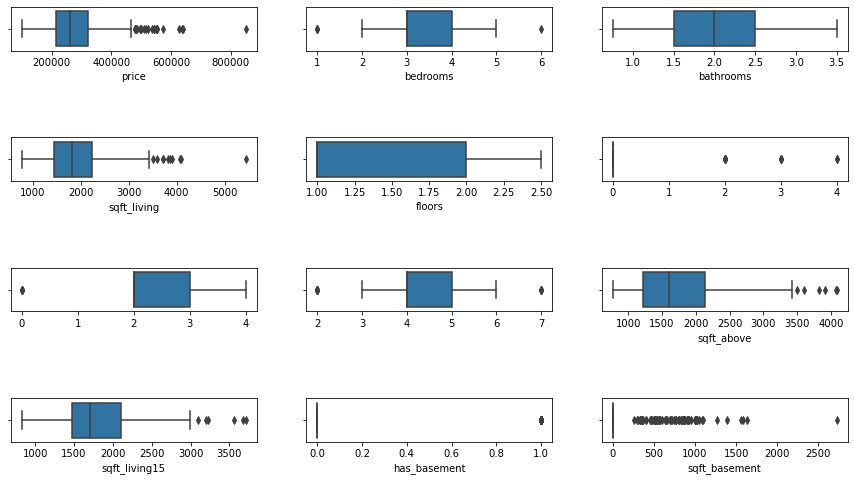

boxplot data for Auburn


<Figure size 432x288 with 0 Axes>

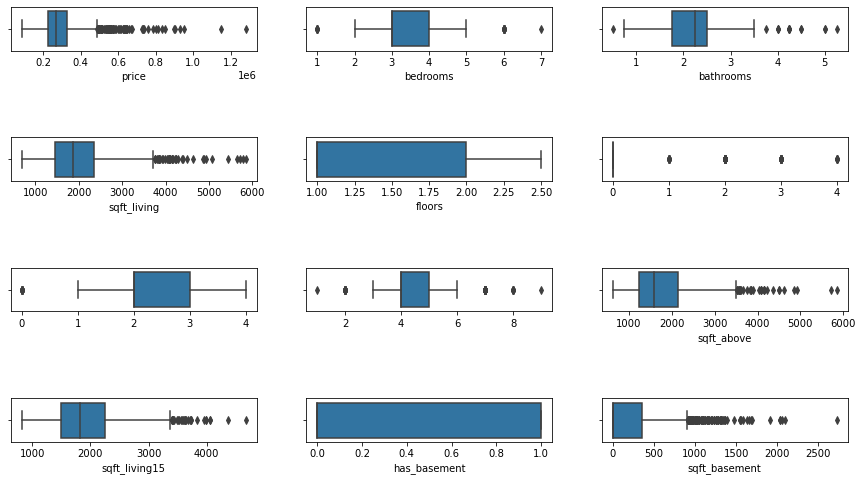

boxplot data for Federal Way


<Figure size 432x288 with 0 Axes>

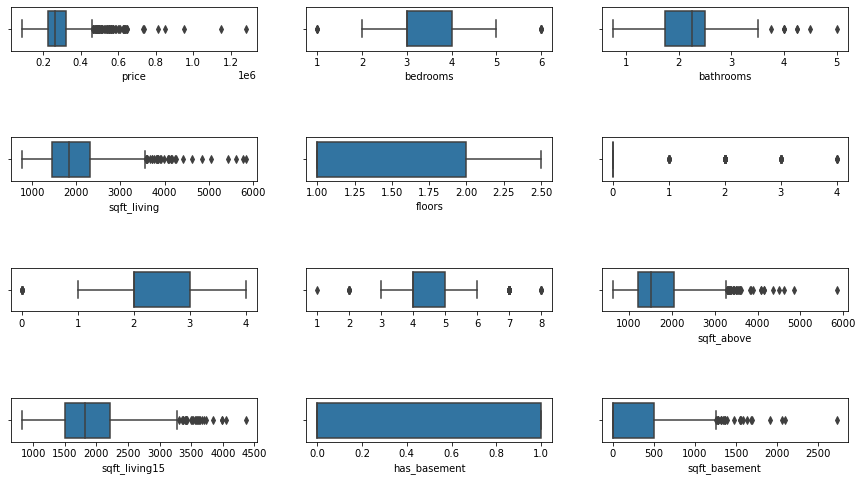

boxplot data for Bellevue


<Figure size 432x288 with 0 Axes>

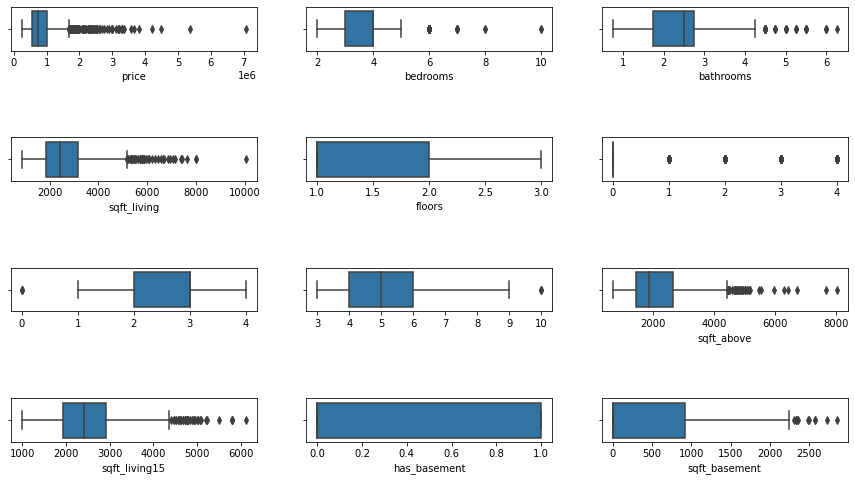

boxplot data for Yarrow Point


<Figure size 432x288 with 0 Axes>

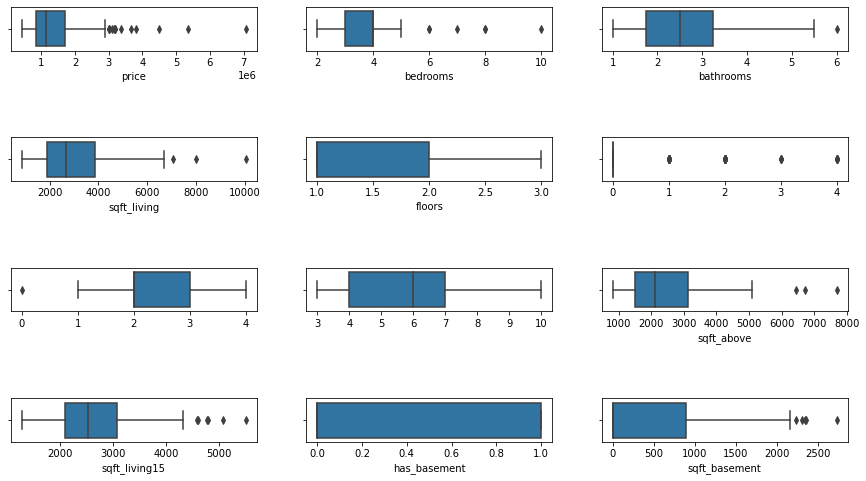

boxplot data for Black Diamond


<Figure size 432x288 with 0 Axes>

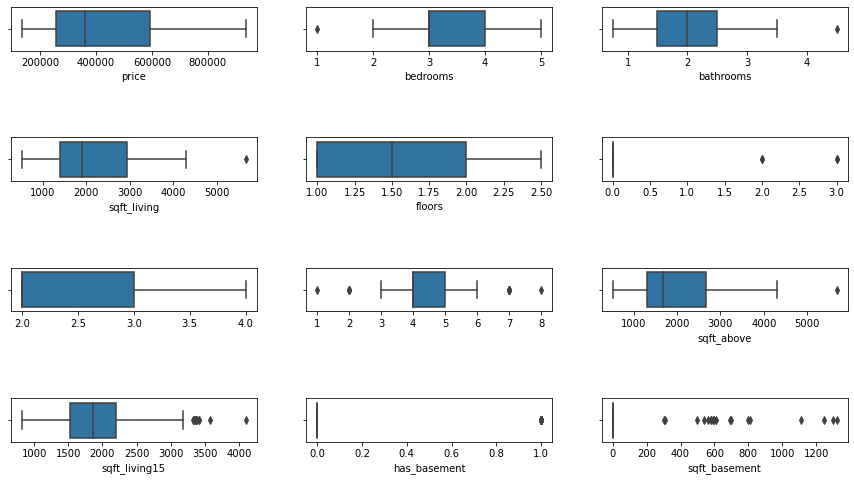

boxplot data for Bothell


<Figure size 432x288 with 0 Axes>

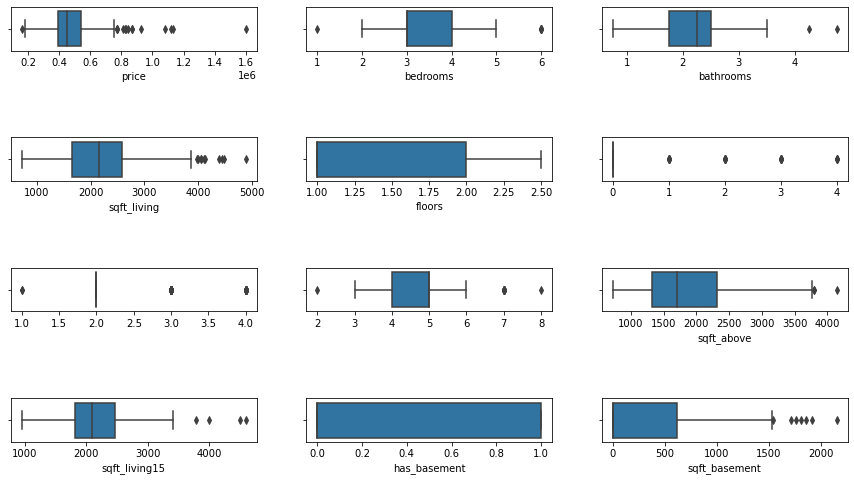

boxplot data for Carnation


<Figure size 432x288 with 0 Axes>

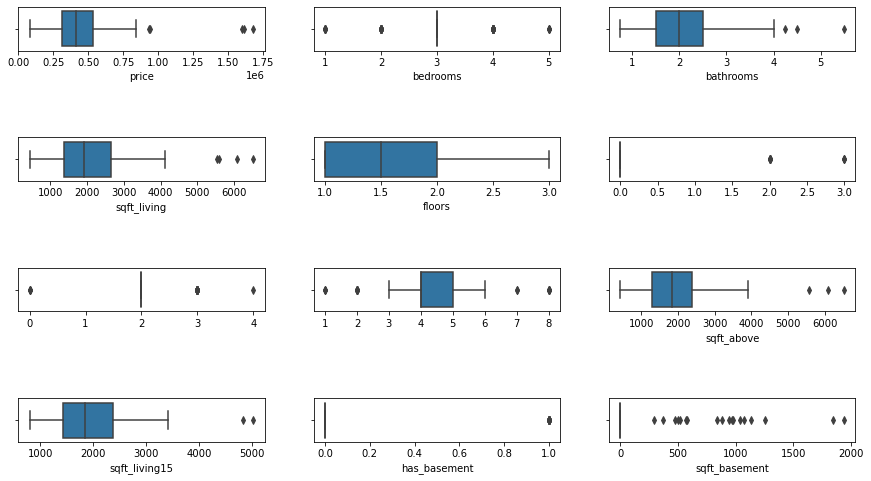

boxplot data for Duvall


<Figure size 432x288 with 0 Axes>

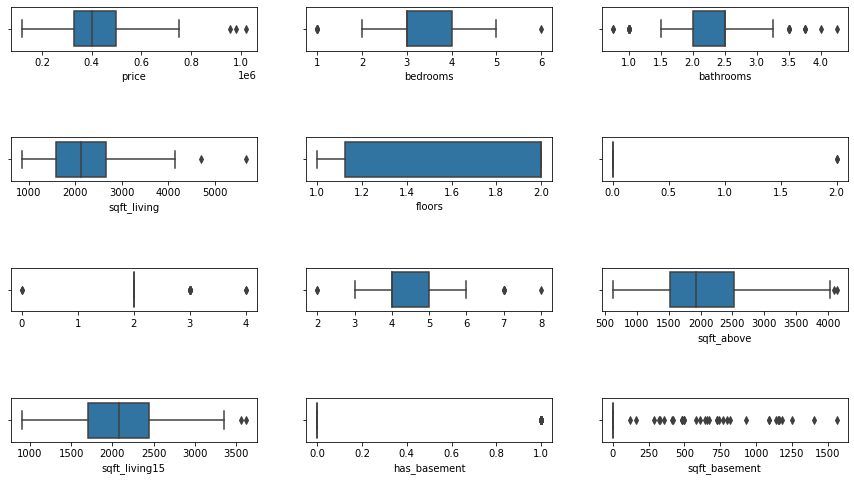

boxplot data for Enumclaw


<Figure size 432x288 with 0 Axes>

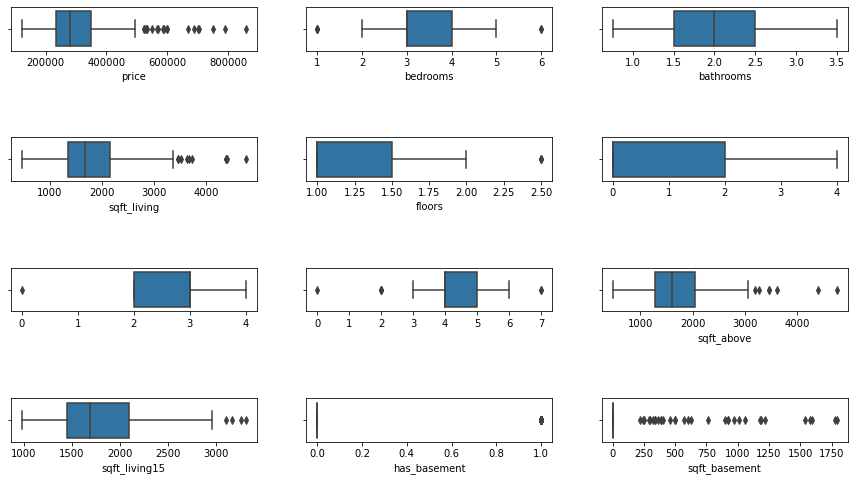

boxplot data for Fall City


<Figure size 432x288 with 0 Axes>

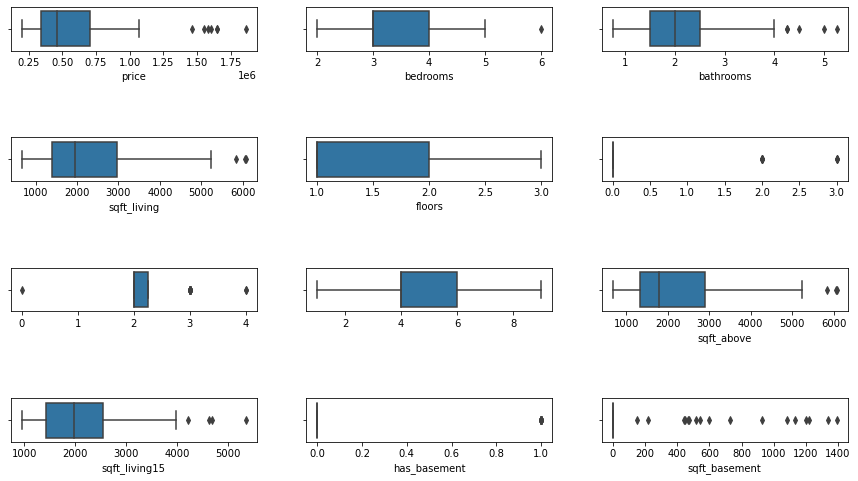

boxplot data for Issaquah


<Figure size 432x288 with 0 Axes>

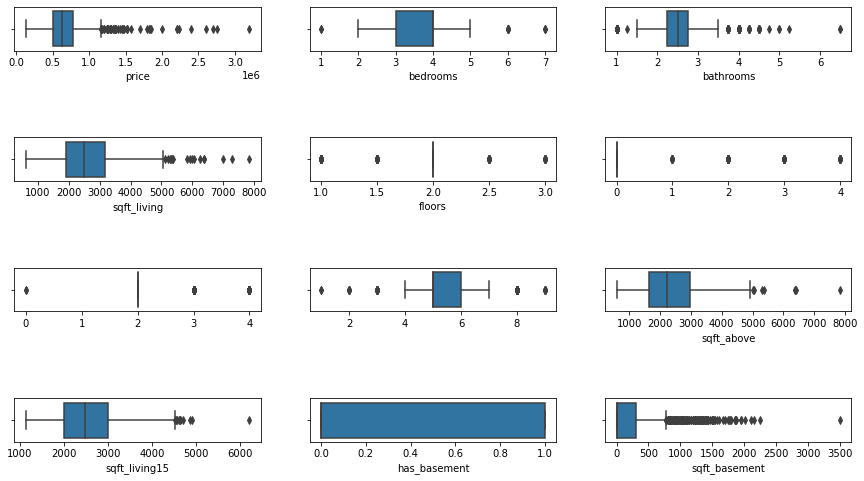

boxplot data for Kent


<Figure size 432x288 with 0 Axes>

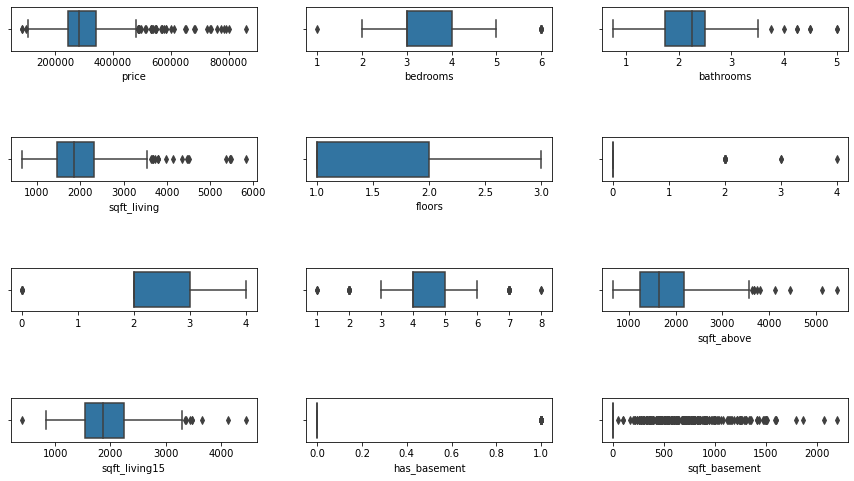

boxplot data for Kirkland


<Figure size 432x288 with 0 Axes>

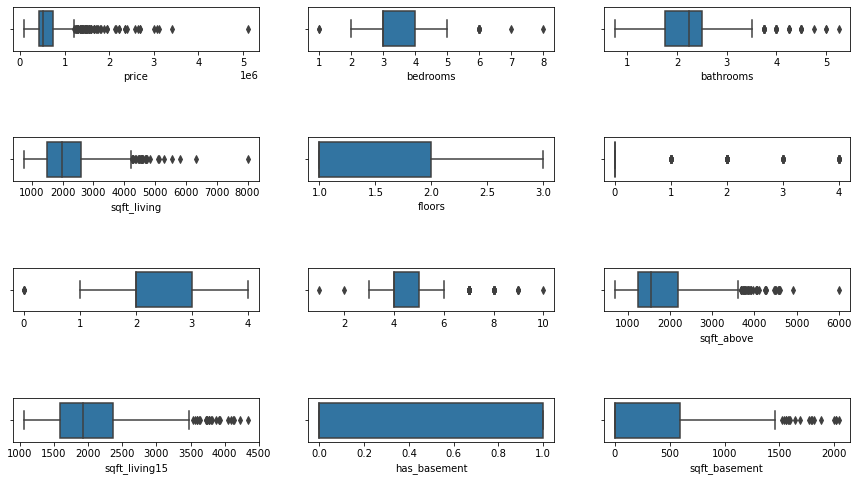

boxplot data for Maple Valley


<Figure size 432x288 with 0 Axes>

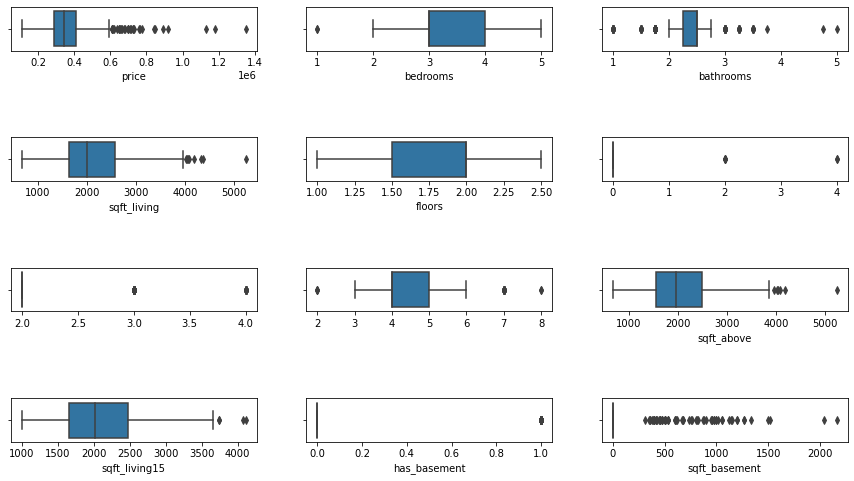

boxplot data for Medina


<Figure size 432x288 with 0 Axes>

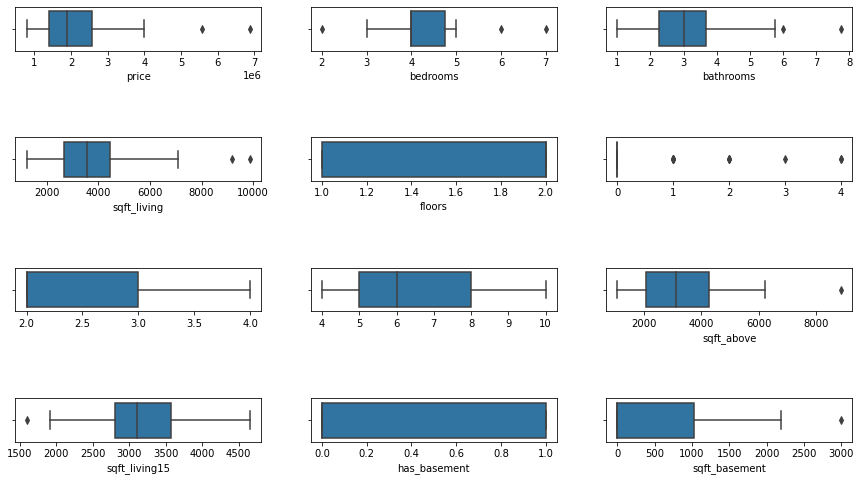

boxplot data for Mercer Island


<Figure size 432x288 with 0 Axes>

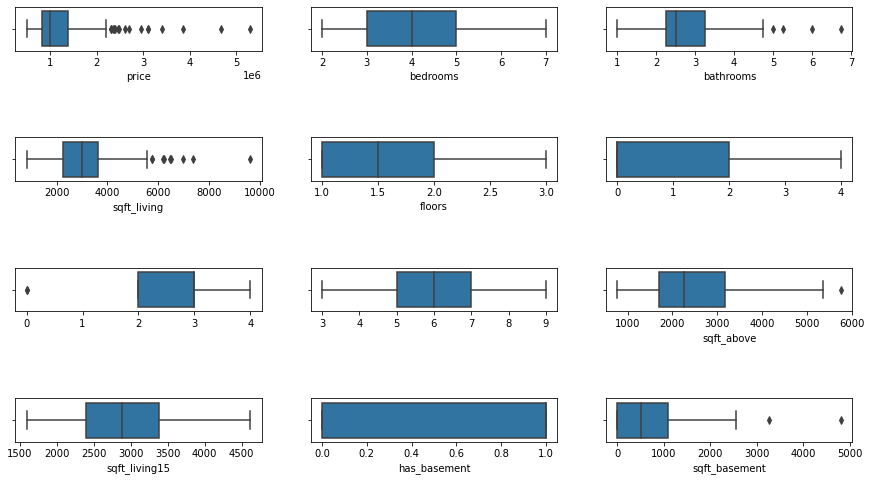

boxplot data for Kenmore


<Figure size 432x288 with 0 Axes>

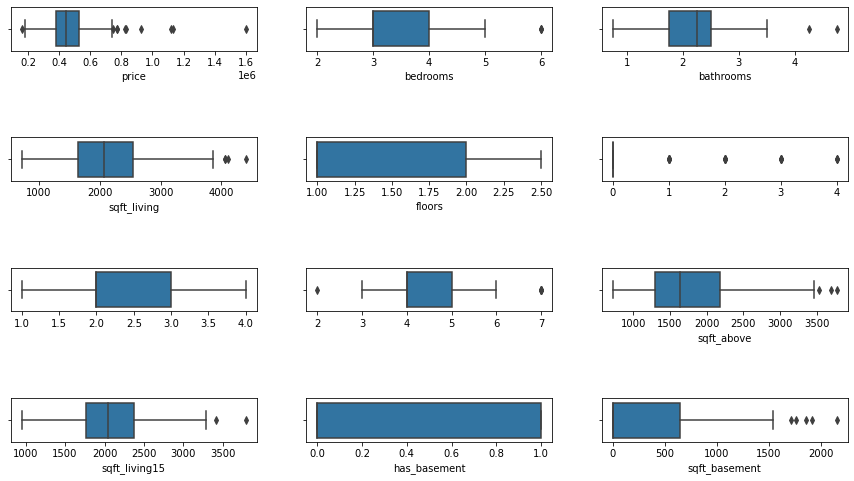

boxplot data for Covington


<Figure size 432x288 with 0 Axes>

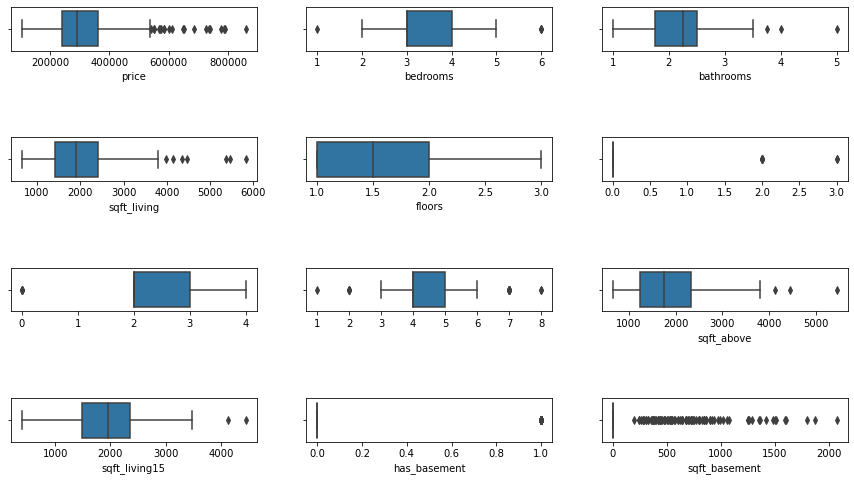

boxplot data for North Bend


<Figure size 432x288 with 0 Axes>

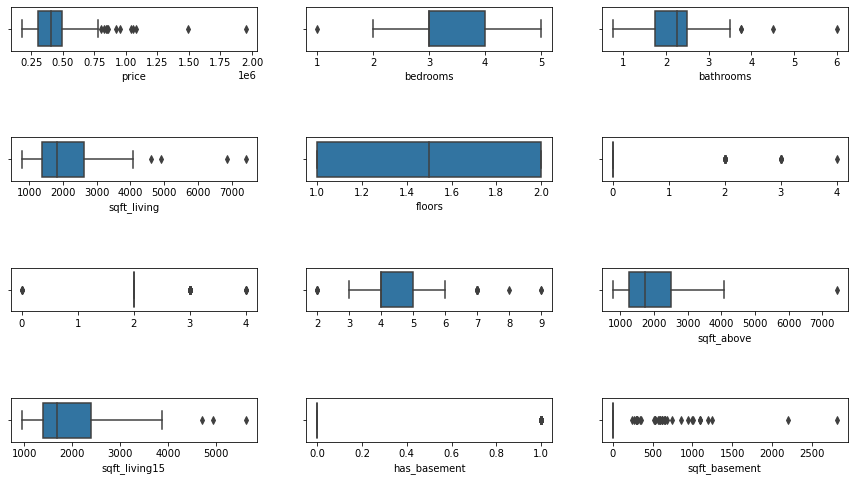

boxplot data for Redmond


<Figure size 432x288 with 0 Axes>

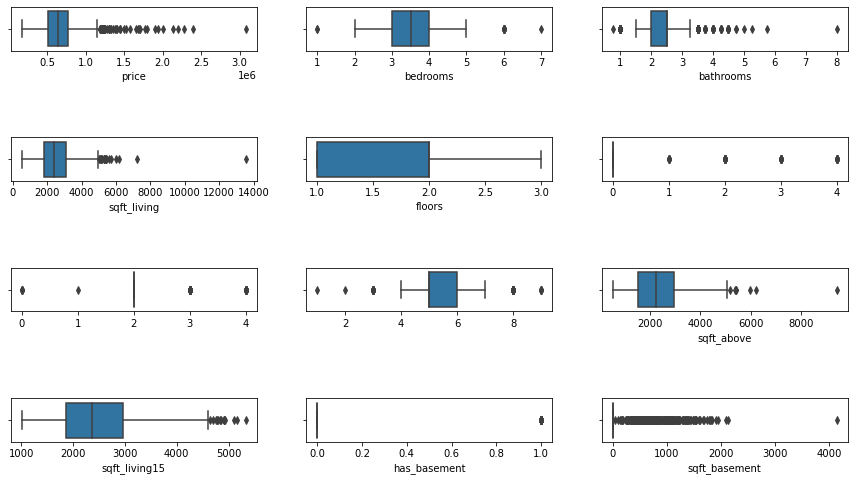

boxplot data for Renton


<Figure size 432x288 with 0 Axes>

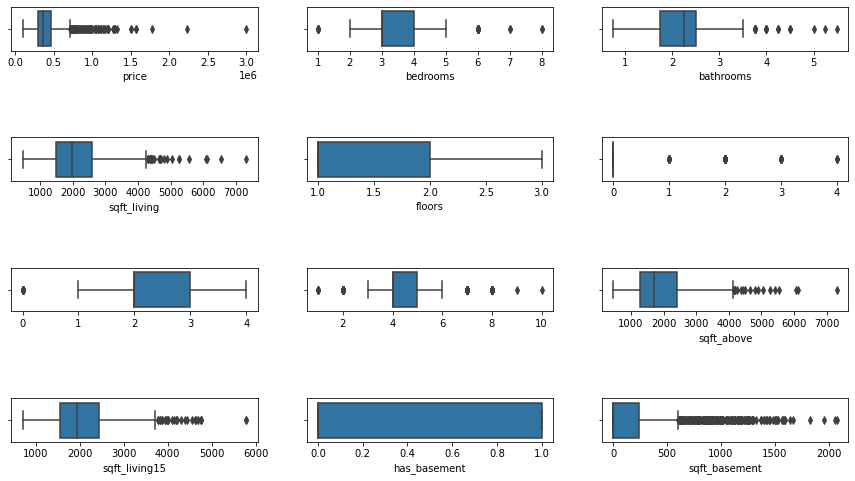

boxplot data for Newcastle


<Figure size 432x288 with 0 Axes>

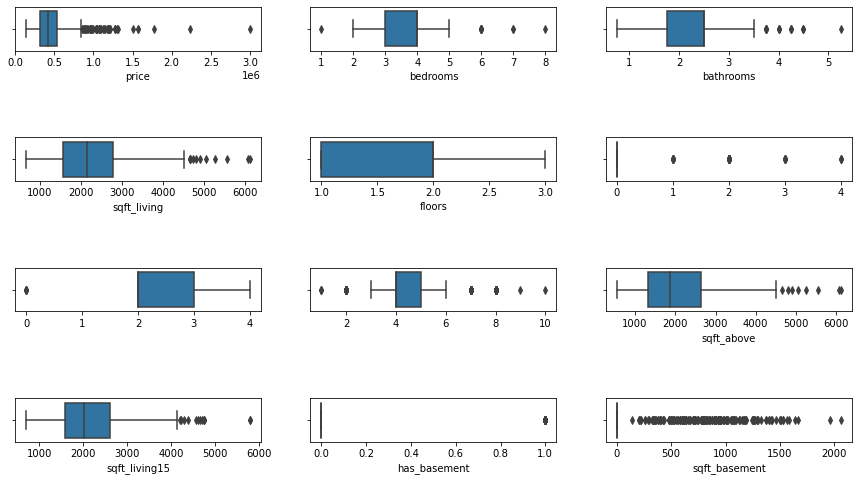

boxplot data for Snoqualmie


<Figure size 432x288 with 0 Axes>

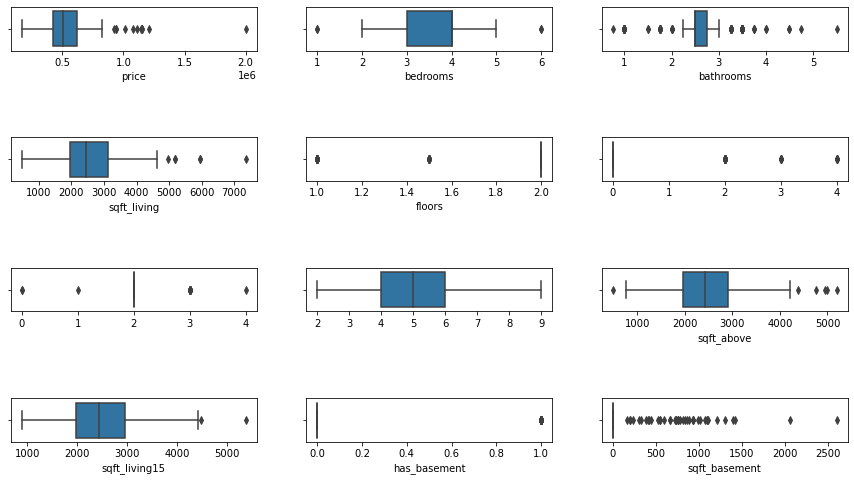

boxplot data for Vashon


<Figure size 432x288 with 0 Axes>

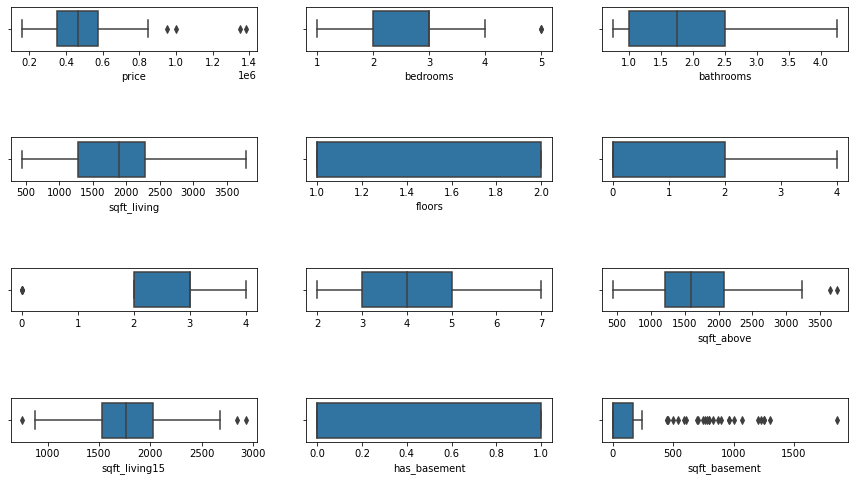

boxplot data for Woodinville


<Figure size 432x288 with 0 Axes>

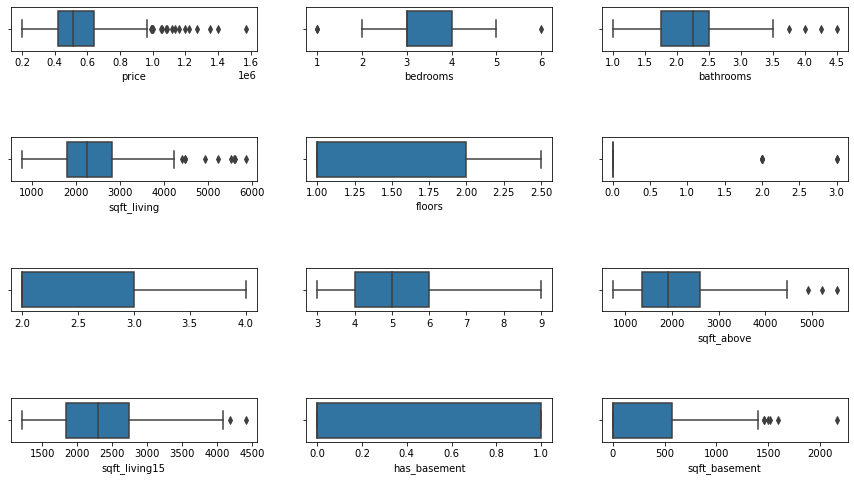

boxplot data for Sammamish


<Figure size 432x288 with 0 Axes>

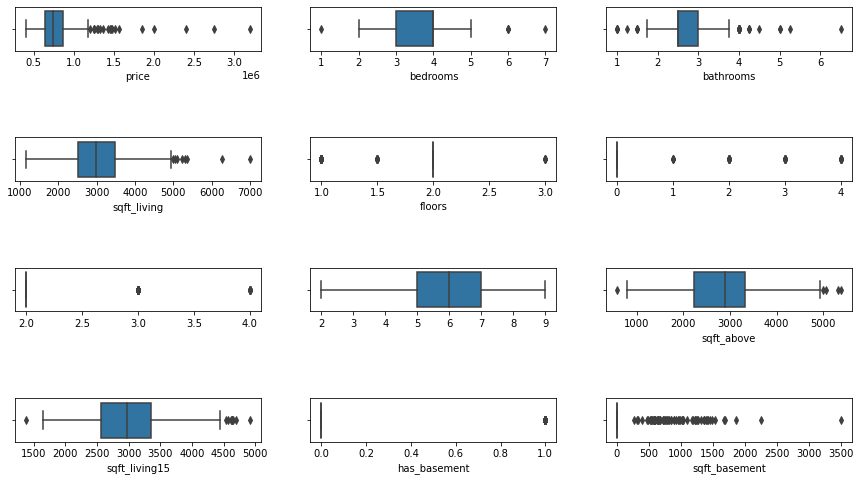

boxplot data for Seattle


<Figure size 432x288 with 0 Axes>

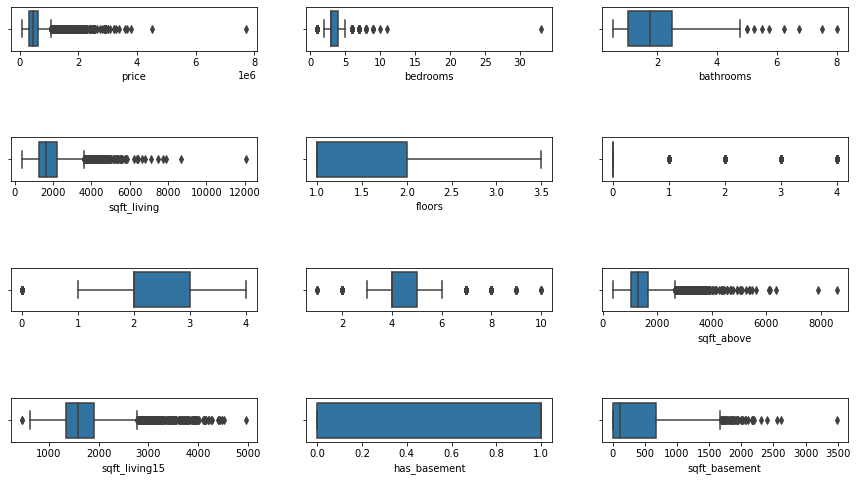

boxplot data for Tukwila


<Figure size 432x288 with 0 Axes>

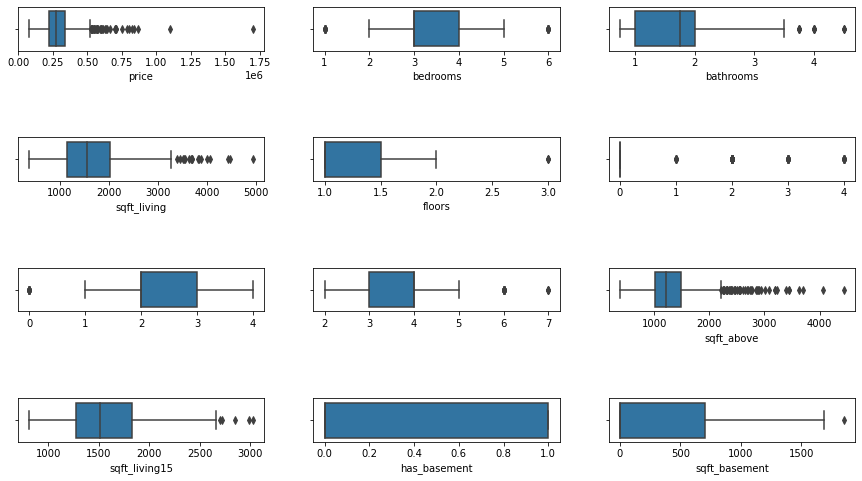

boxplot data for Shoreline


<Figure size 432x288 with 0 Axes>

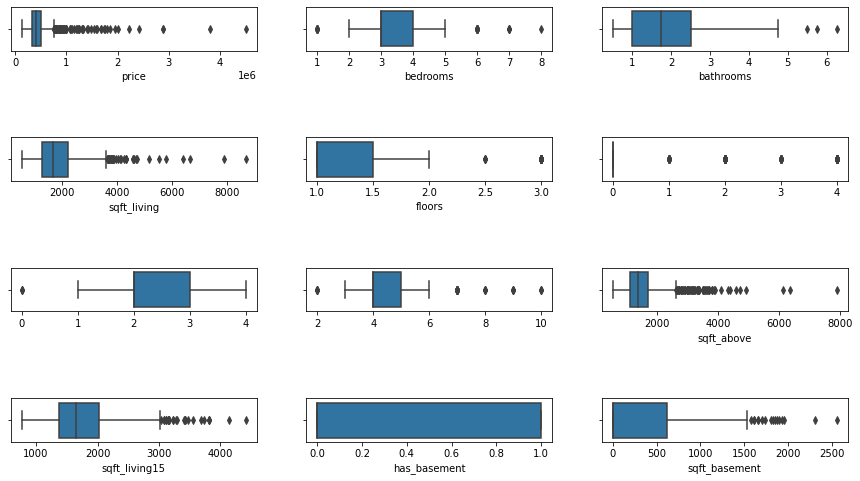

boxplot data for Burien


<Figure size 432x288 with 0 Axes>

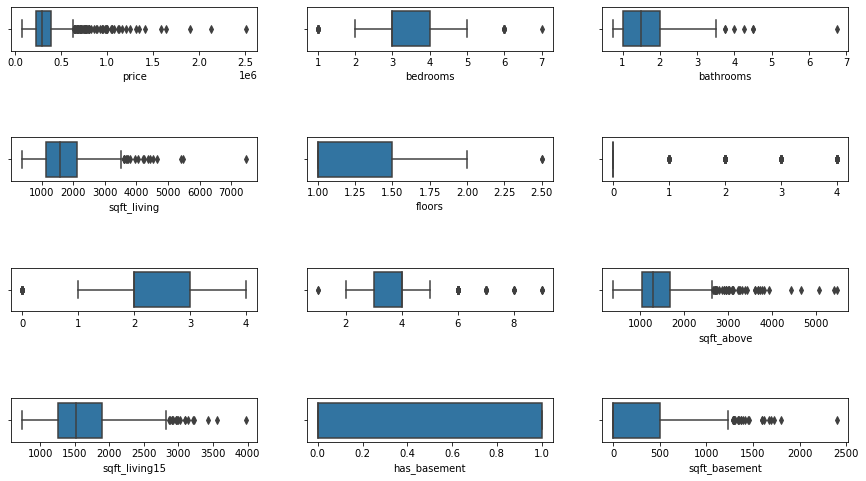

boxplot data for Des Moines


<Figure size 432x288 with 0 Axes>

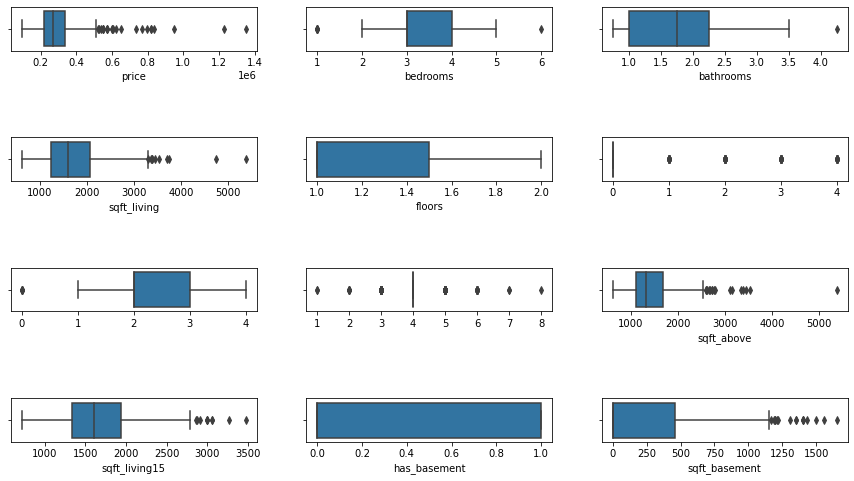

boxplot data for Normandy Park


<Figure size 432x288 with 0 Axes>

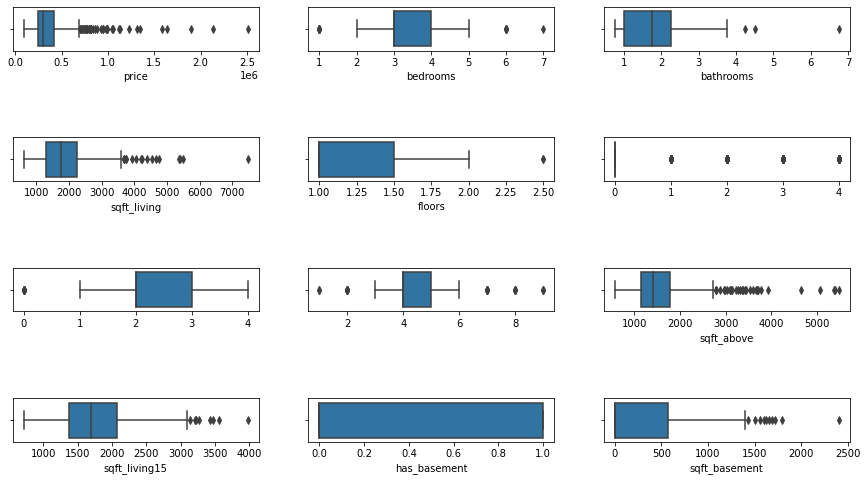

boxplot data for Seatac


<Figure size 432x288 with 0 Axes>

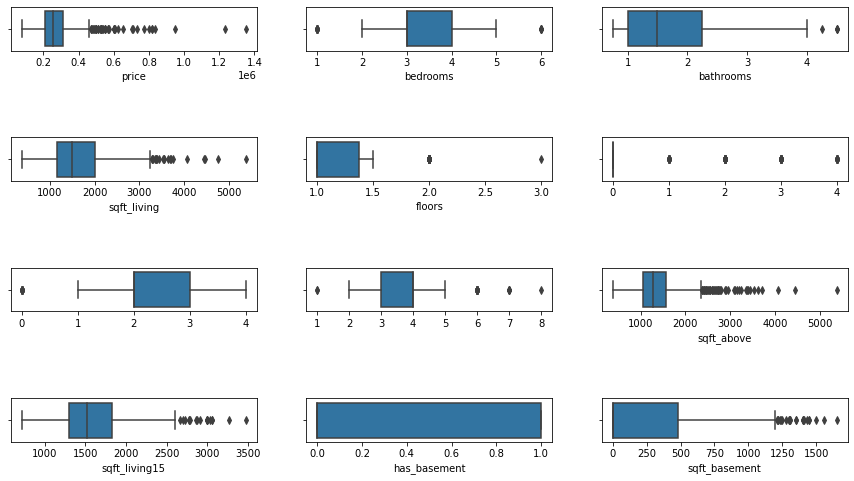

boxplot data for Lake Forest Park


<Figure size 432x288 with 0 Axes>

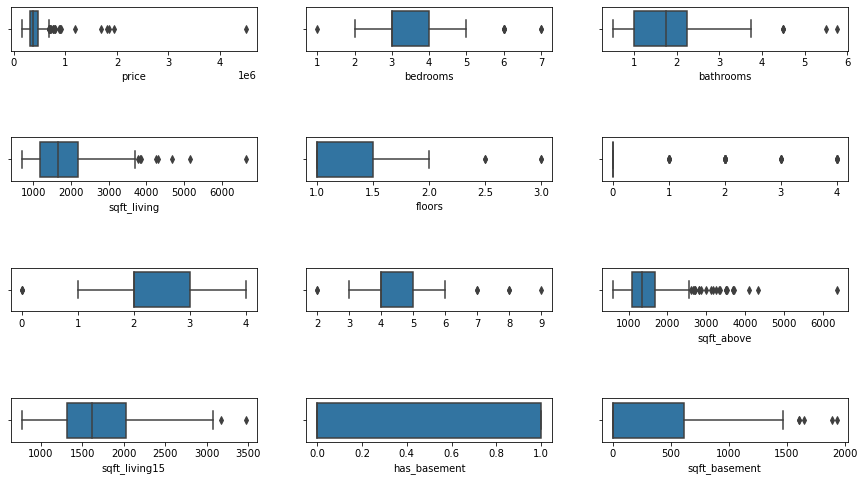

<Figure size 432x288 with 0 Axes>

In [57]:
import warnings
warnings.filterwarnings("ignore") 

city_list1 = list(city_dfs.keys())[0:6]
boxplot_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living','floors', 'view', 'condition',
               'grade', 'sqft_above','sqft_living15', 'has_basement', 'sqft_basement']

for i in city_dfs.keys():
    print('boxplot data for {}'.format(i))
    
    fig, ax = plt.subplots(figsize=(15,8), nrows=4, ncols=3)
    plt.subplots_adjust(hspace=2)
    
    sns.boxplot(city_dfs[i]['price'],data=city_dfs[i],ax=ax[0][0])
    sns.boxplot(city_dfs[i]['bedrooms'],data=city_dfs[i],ax=ax[0][1])
    sns.boxplot(city_dfs[i]['bathrooms'],data=city_dfs[i],ax=ax[0][2])
    sns.boxplot(city_dfs[i]['sqft_living'],data=city_dfs[i],ax=ax[1][0])
    sns.boxplot(city_dfs[i]['floors'],data=city_dfs[i],ax=ax[1][1])
    sns.boxplot(city_dfs[i]['view'].cat.codes,data=city_dfs[i],ax=ax[1][2])
    sns.boxplot(city_dfs[i]['condition'].cat.codes,data=city_dfs[i],ax=ax[2][0])
    sns.boxplot(city_dfs[i]['grade'].cat.codes,data=city_dfs[i],ax=ax[2][1])
    sns.boxplot(city_dfs[i]['sqft_above'],data=city_dfs[i],ax=ax[2][2])
    sns.boxplot(city_dfs[i]['sqft_living15'],data=city_dfs[i],ax=ax[3][0])
    sns.boxplot(city_dfs[i]['has_basement'],data=city_dfs[i],ax=ax[3][1])
    sns.boxplot(city_dfs[i]['sqft_basement'],data=city_dfs[i],ax=ax[3][2])
    
    plt.show()
    
    plt.clf()
# Boxplots to check the outliers

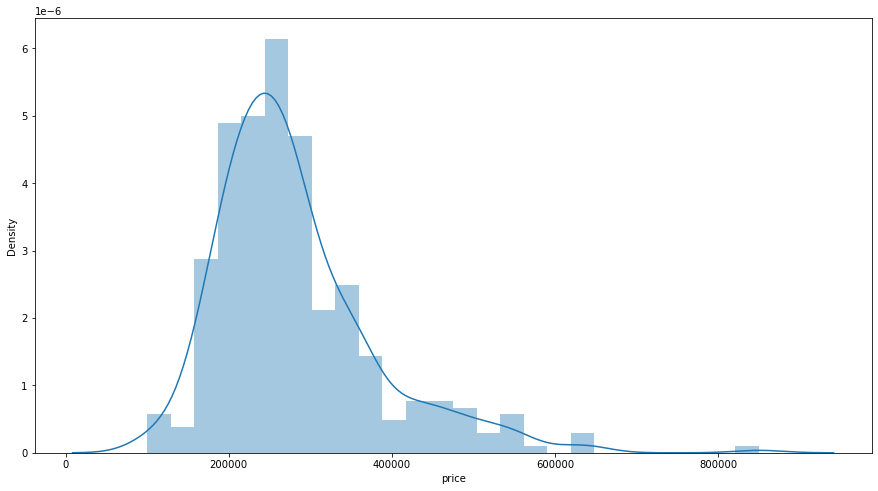

<Figure size 432x288 with 0 Axes>

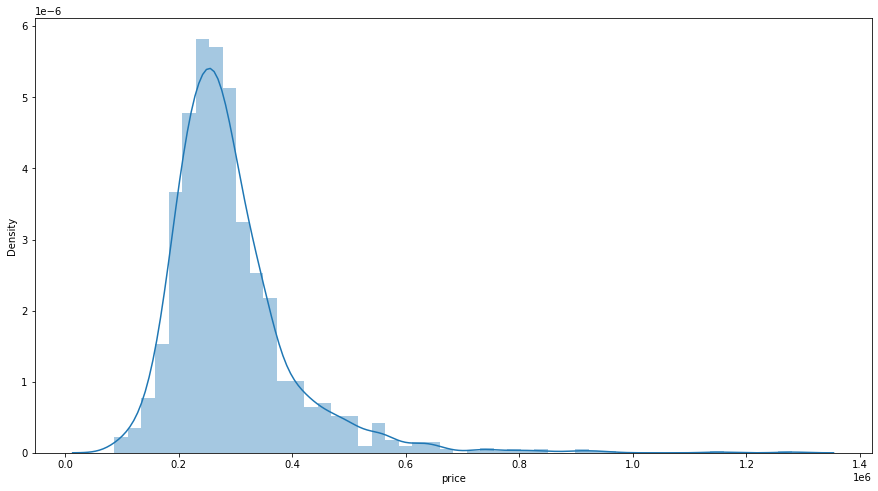

<Figure size 432x288 with 0 Axes>

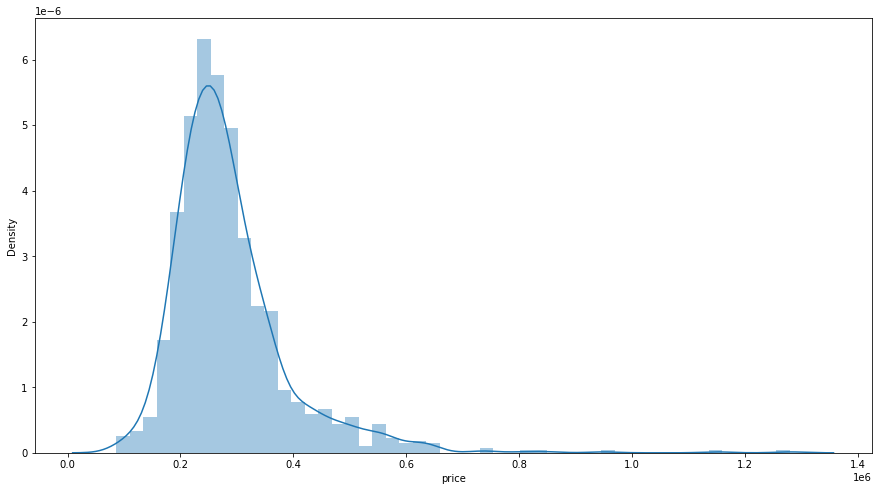

<Figure size 432x288 with 0 Axes>

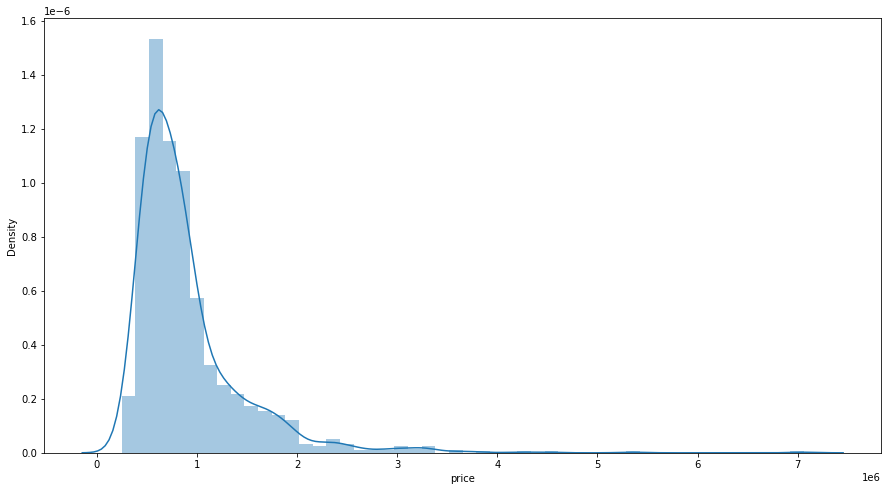

<Figure size 432x288 with 0 Axes>

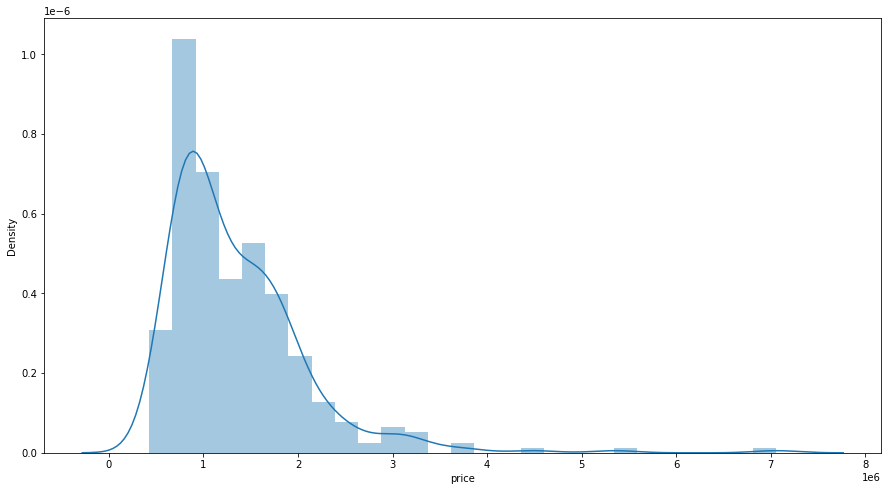

<Figure size 432x288 with 0 Axes>

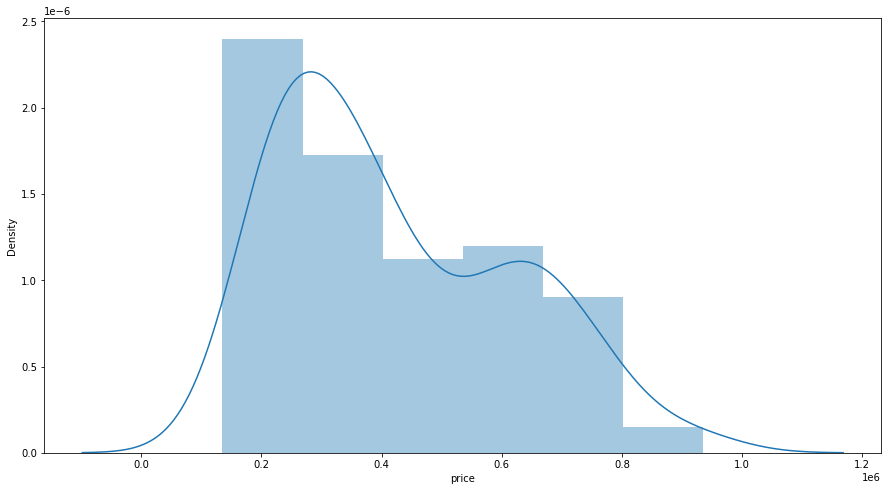

<Figure size 432x288 with 0 Axes>

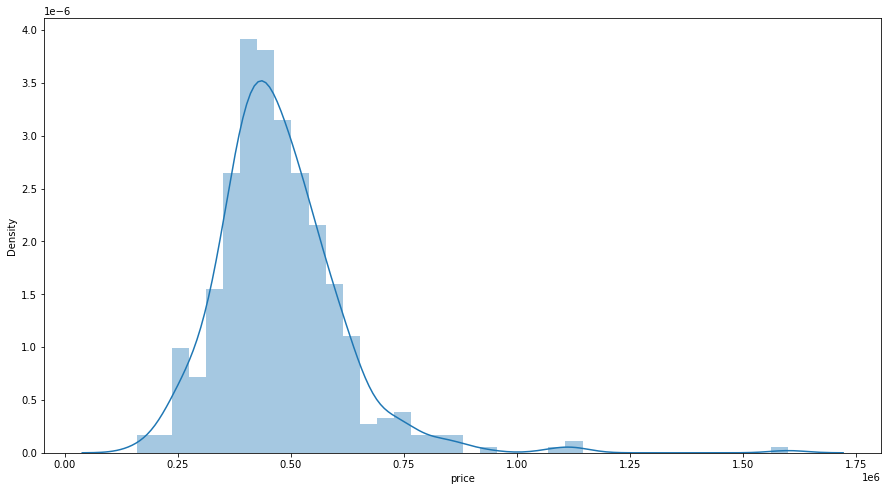

<Figure size 432x288 with 0 Axes>

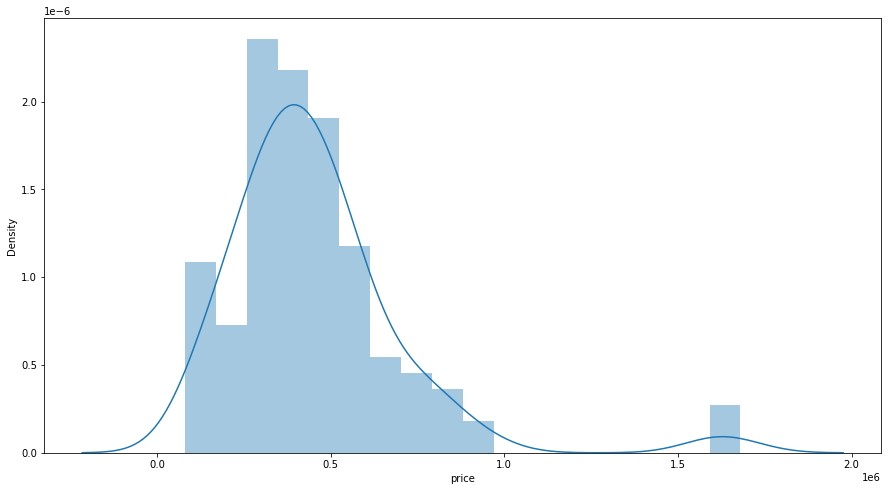

<Figure size 432x288 with 0 Axes>

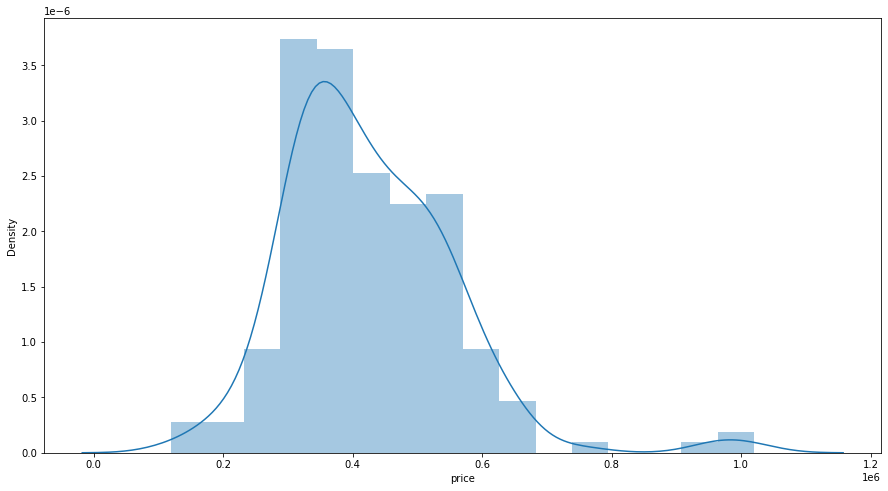

<Figure size 432x288 with 0 Axes>

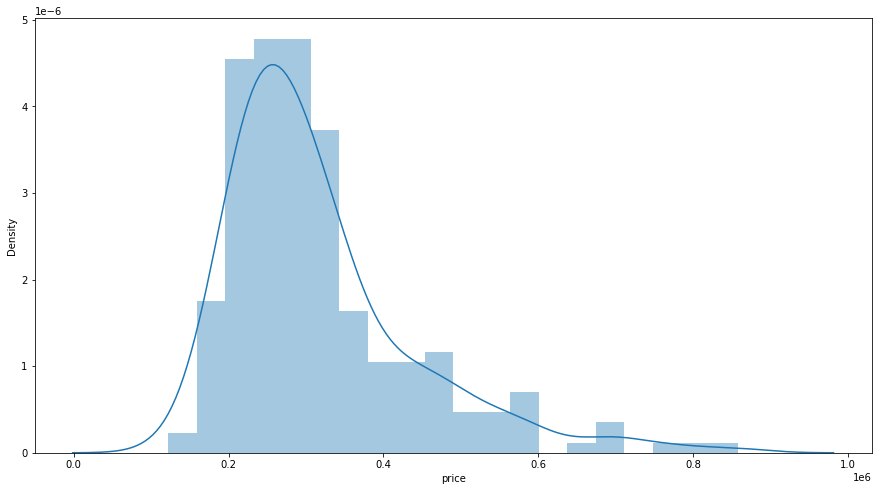

<Figure size 432x288 with 0 Axes>

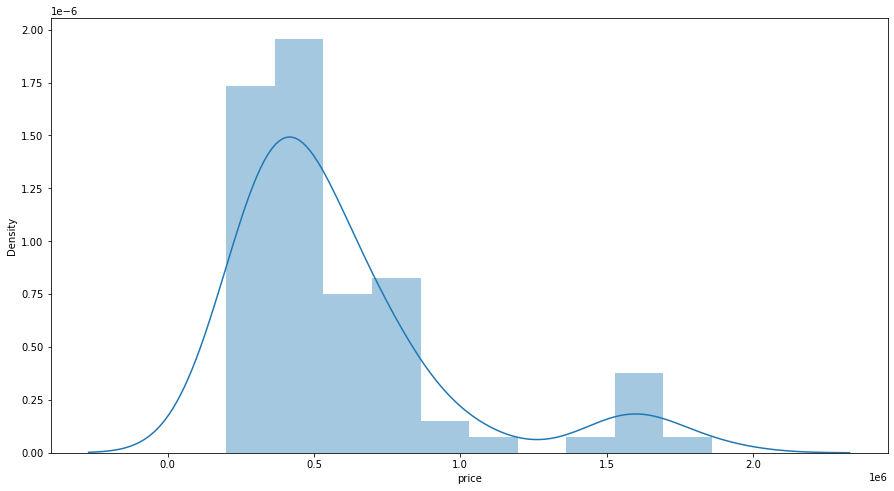

<Figure size 432x288 with 0 Axes>

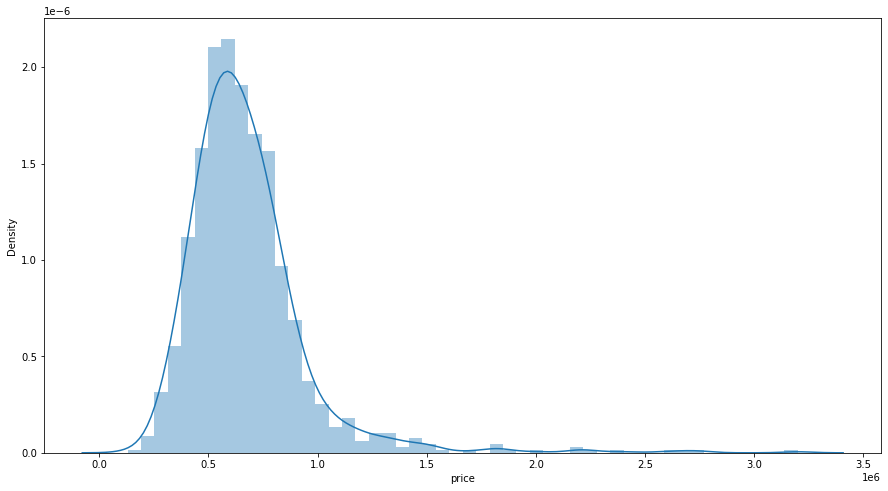

<Figure size 432x288 with 0 Axes>

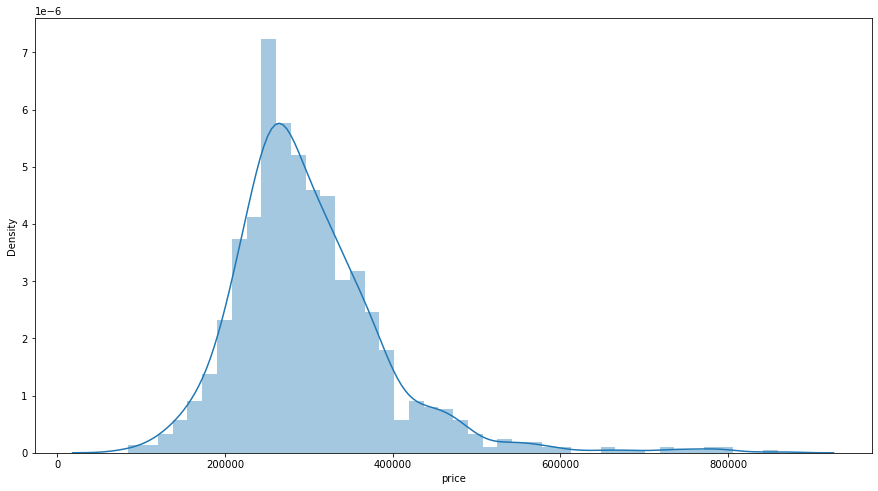

<Figure size 432x288 with 0 Axes>

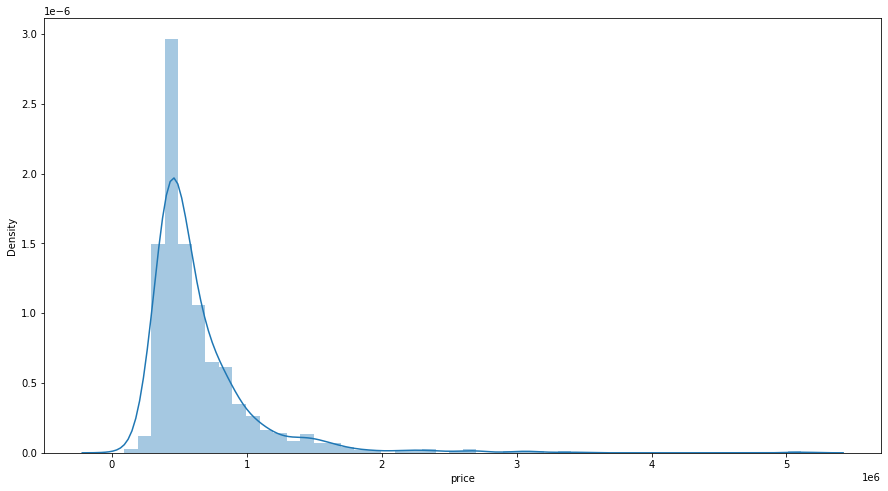

<Figure size 432x288 with 0 Axes>

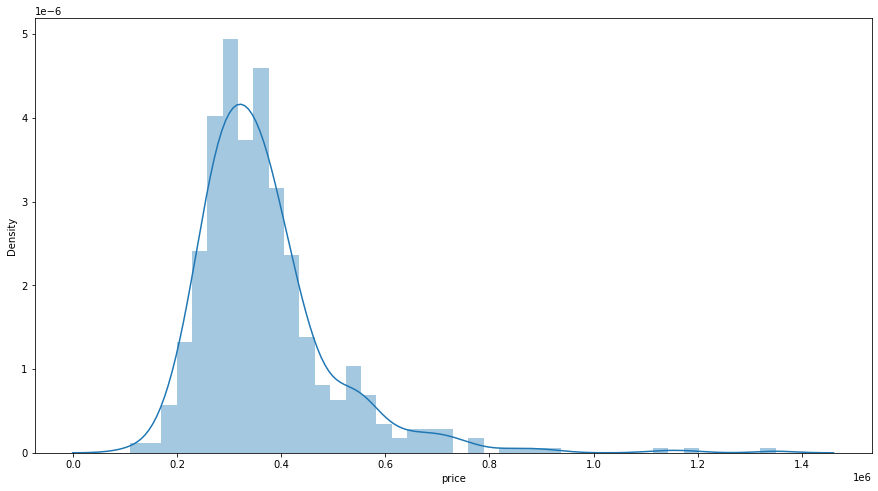

<Figure size 432x288 with 0 Axes>

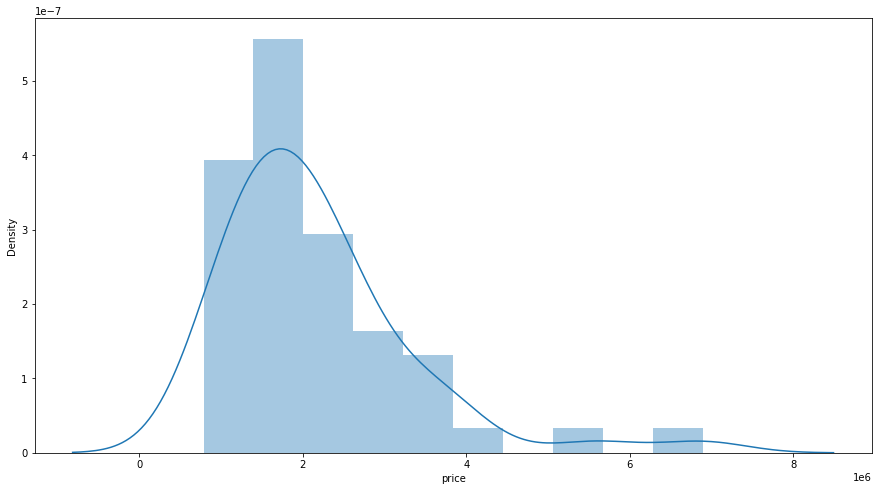

<Figure size 432x288 with 0 Axes>

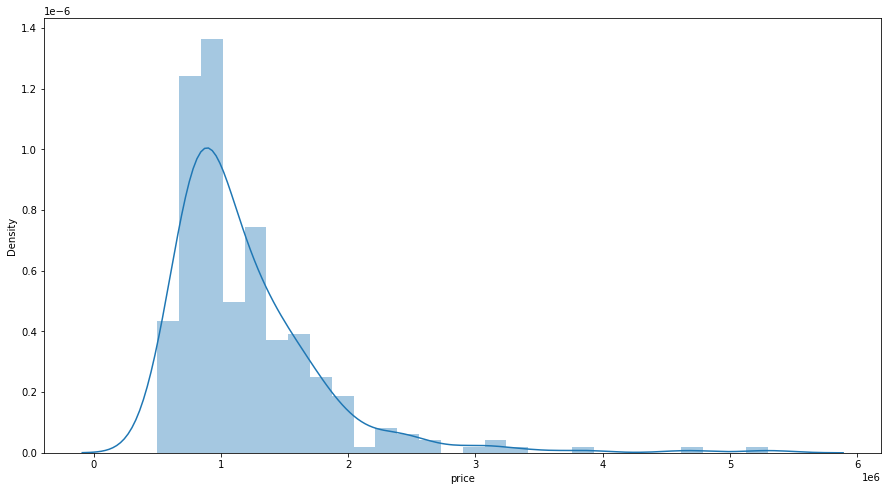

<Figure size 432x288 with 0 Axes>

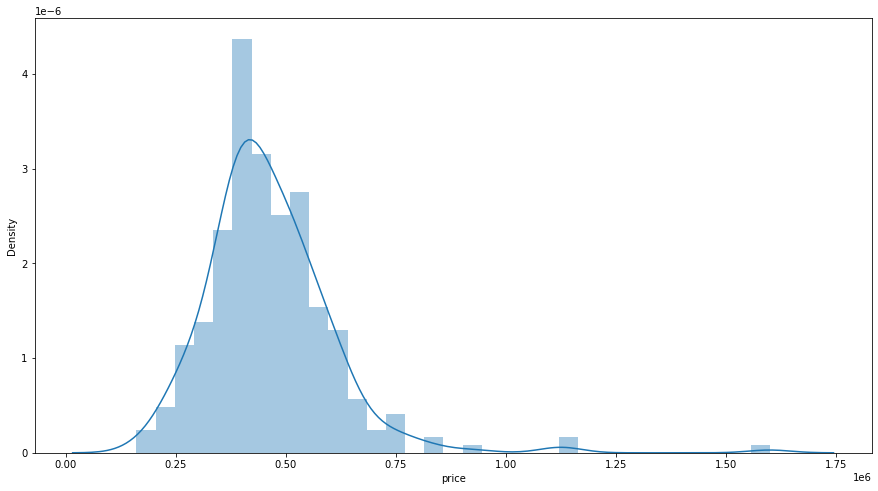

<Figure size 432x288 with 0 Axes>

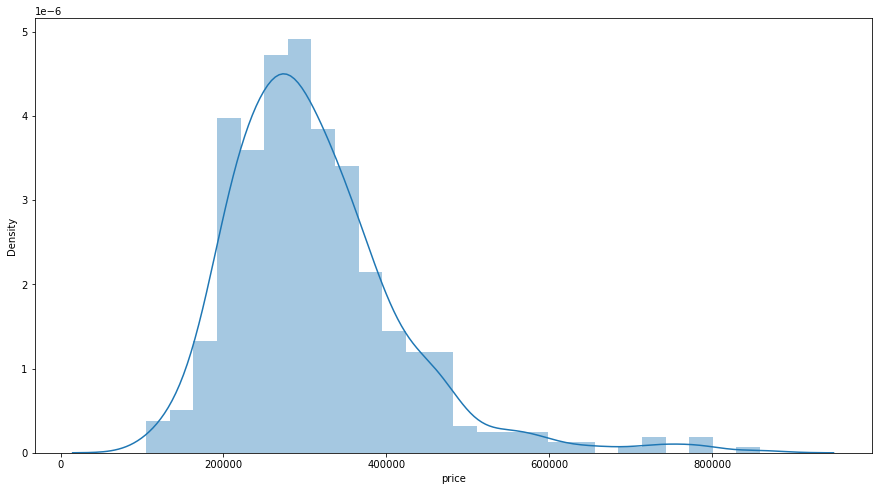

<Figure size 432x288 with 0 Axes>

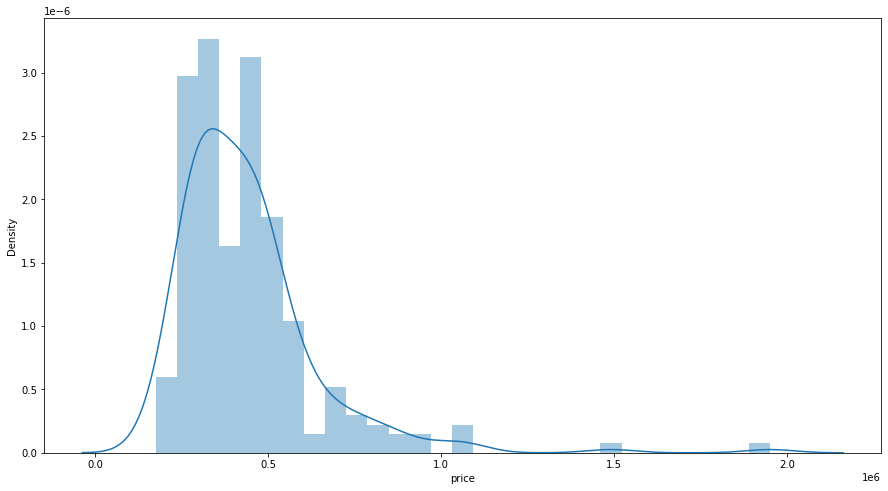

<Figure size 432x288 with 0 Axes>

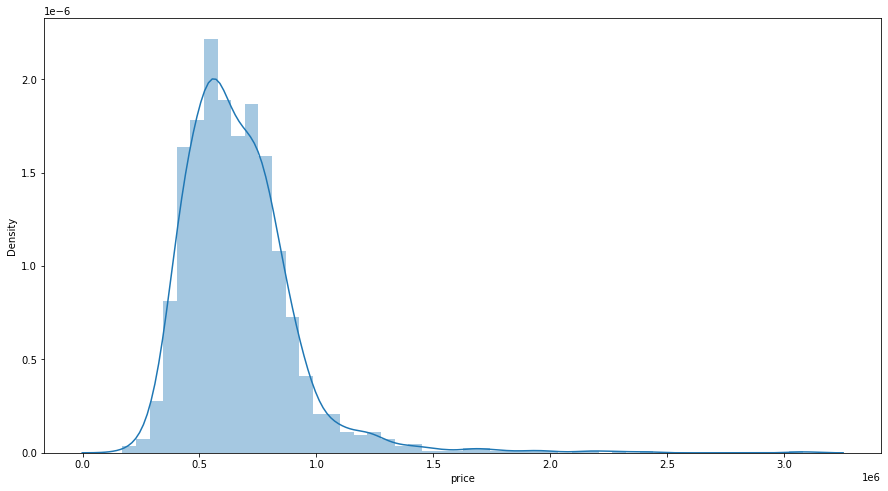

<Figure size 432x288 with 0 Axes>

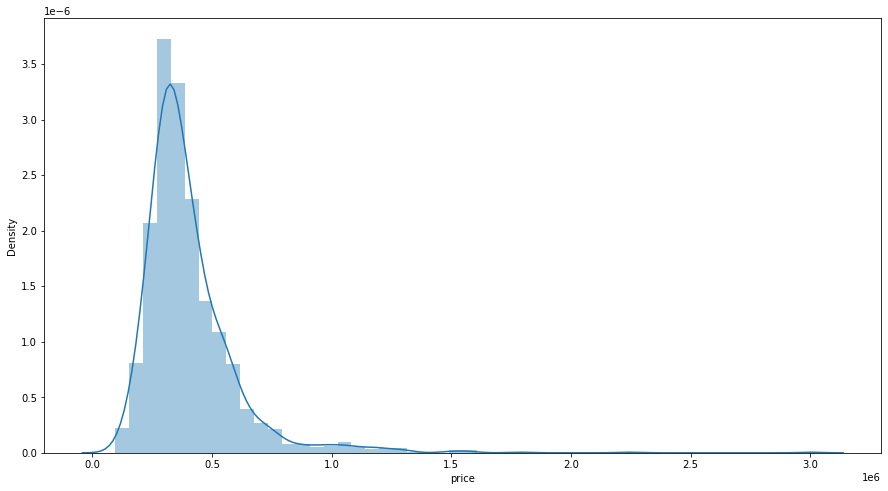

<Figure size 432x288 with 0 Axes>

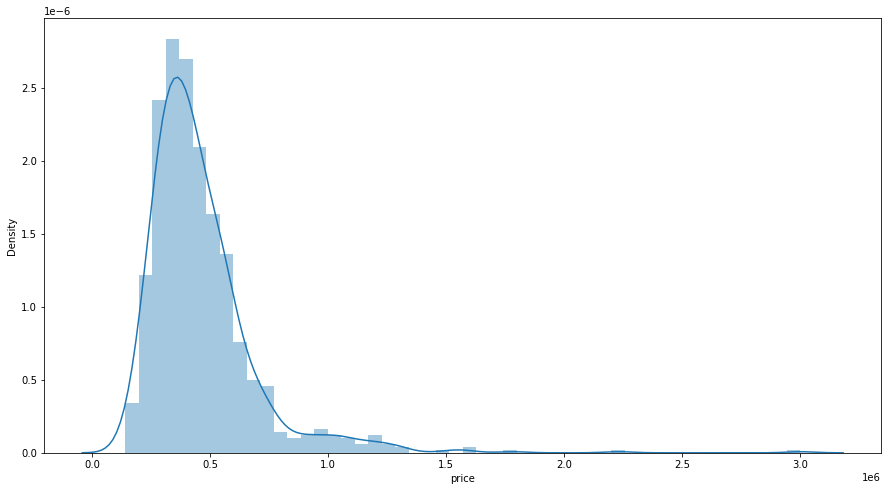

<Figure size 432x288 with 0 Axes>

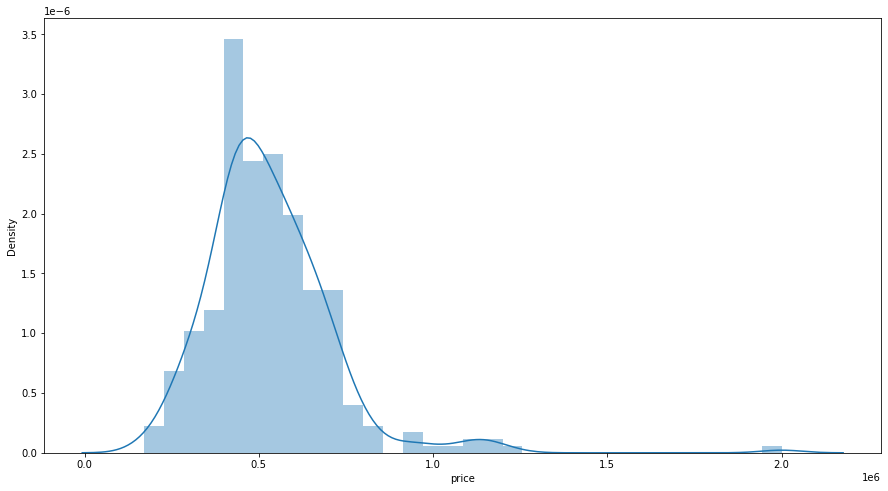

<Figure size 432x288 with 0 Axes>

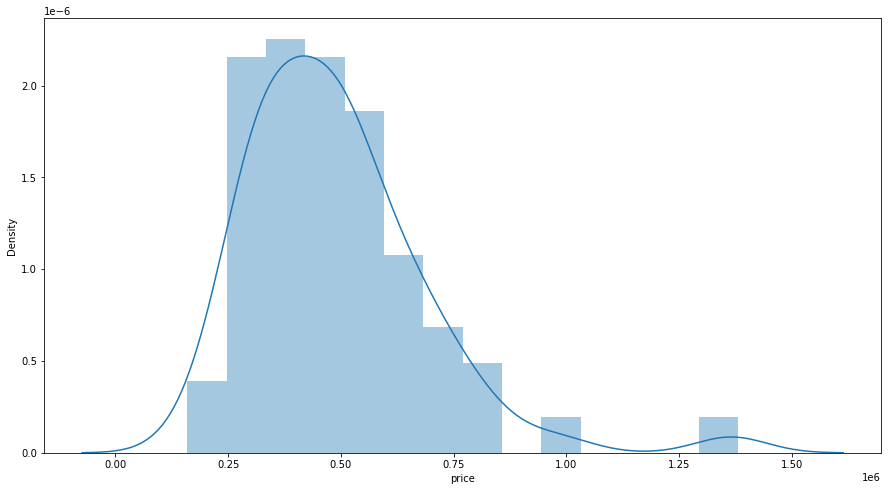

<Figure size 432x288 with 0 Axes>

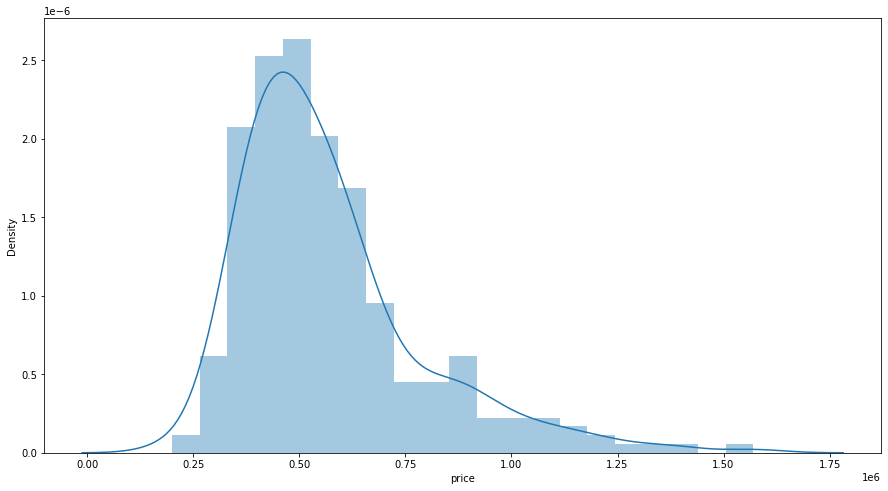

<Figure size 432x288 with 0 Axes>

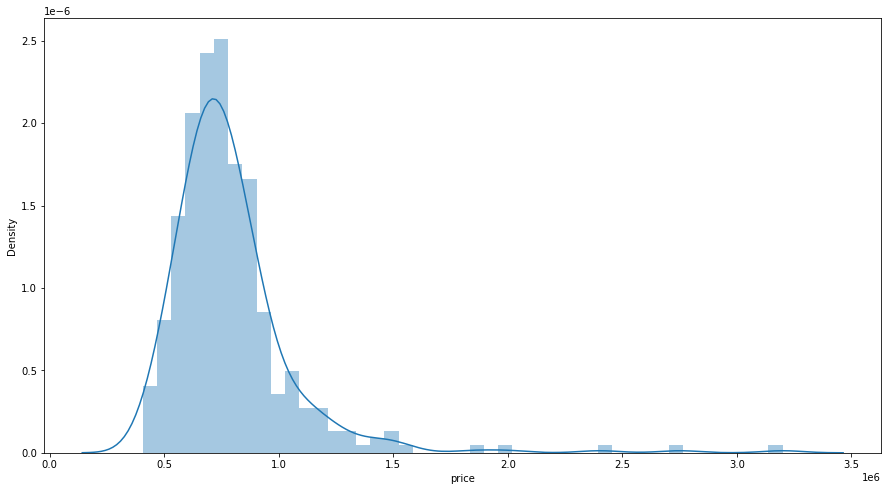

<Figure size 432x288 with 0 Axes>

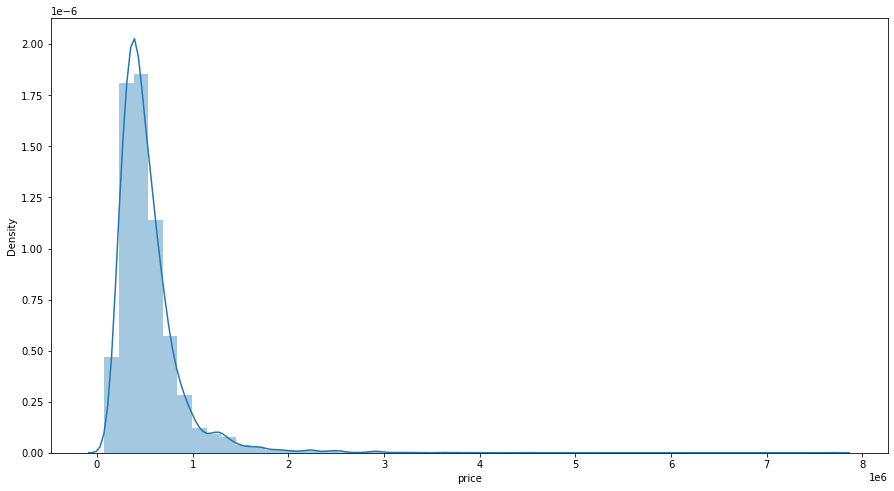

<Figure size 432x288 with 0 Axes>

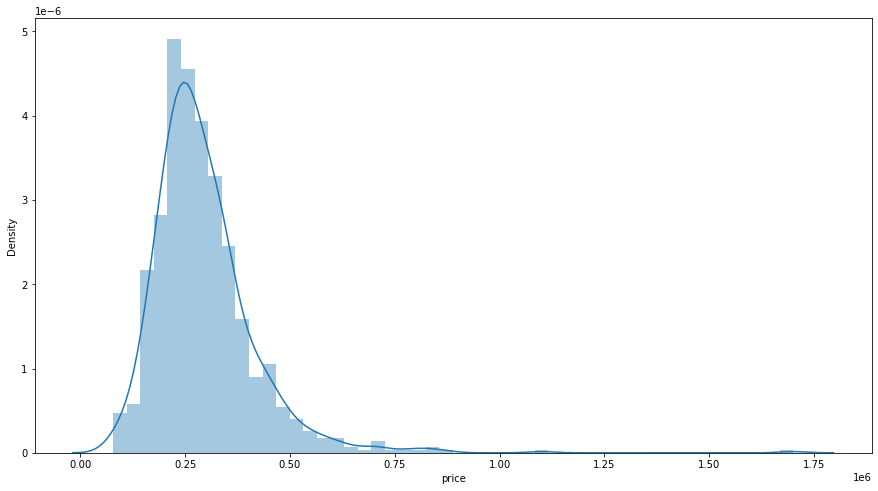

<Figure size 432x288 with 0 Axes>

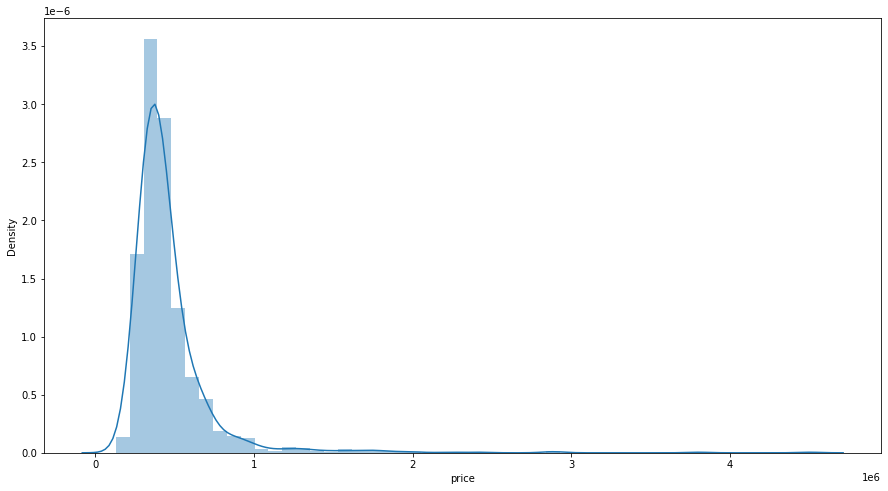

<Figure size 432x288 with 0 Axes>

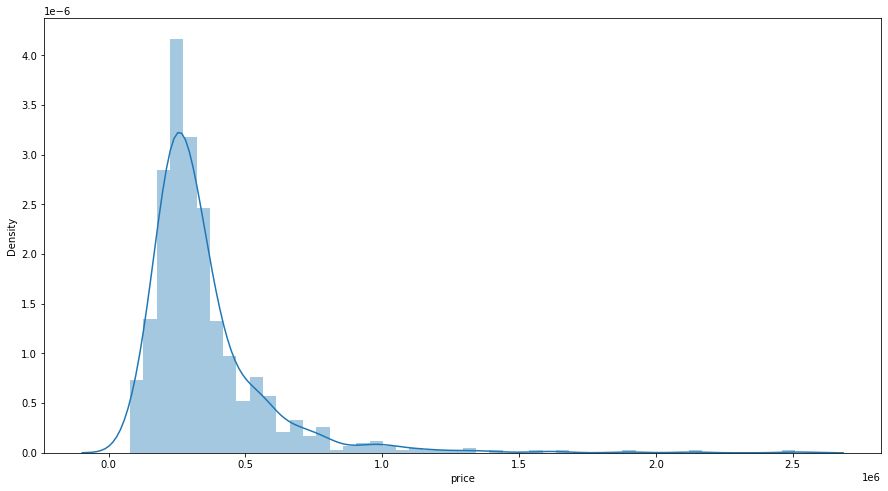

<Figure size 432x288 with 0 Axes>

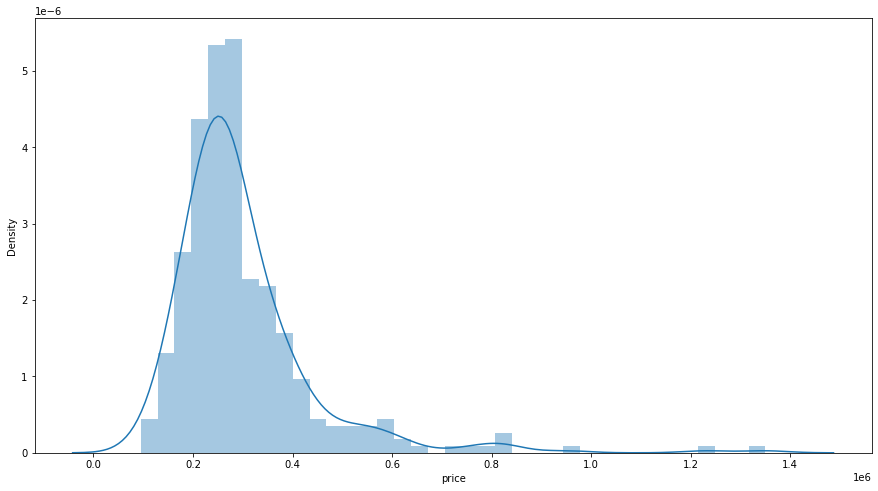

<Figure size 432x288 with 0 Axes>

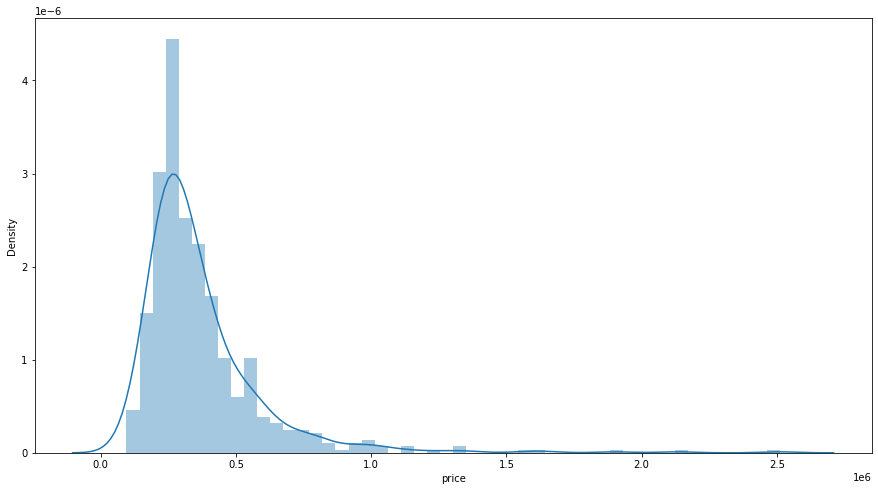

<Figure size 432x288 with 0 Axes>

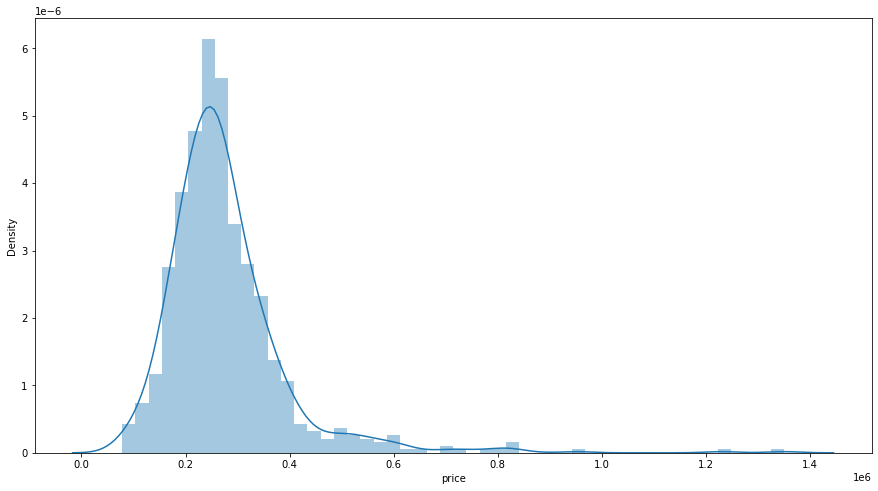

<Figure size 432x288 with 0 Axes>

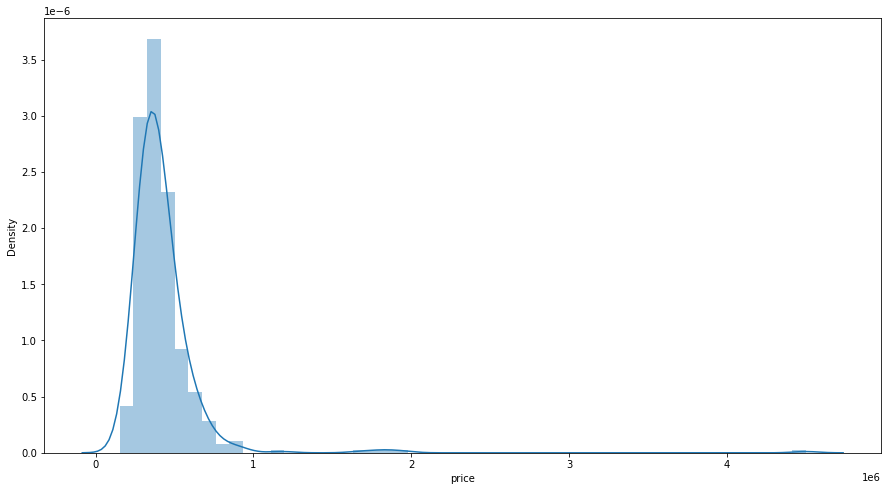

<Figure size 432x288 with 0 Axes>

In [58]:
for i in city_dfs.keys():
    
    fig, ax = plt.subplots(figsize=(15,8))
    sns.distplot(city_dfs[i]['price'], ax=ax)
    
    plt.show()
    plt.clf()

# Distplots to check the outliers

In [59]:
for i in city_dfs.keys():
    for x in boxplot_cols:    
        if (x == 'view') or (x == 'condition') or (x == 'grade'):
            df = city_dfs[i][x].cat.codes
        else:
            df = city_dfs[i][x]
        
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        city_dfs[i][x] = np.where(df > upper, upper, df)
        city_dfs[i][x] = np.where(df < lower, lower, df)

# Outlier Treatment #1

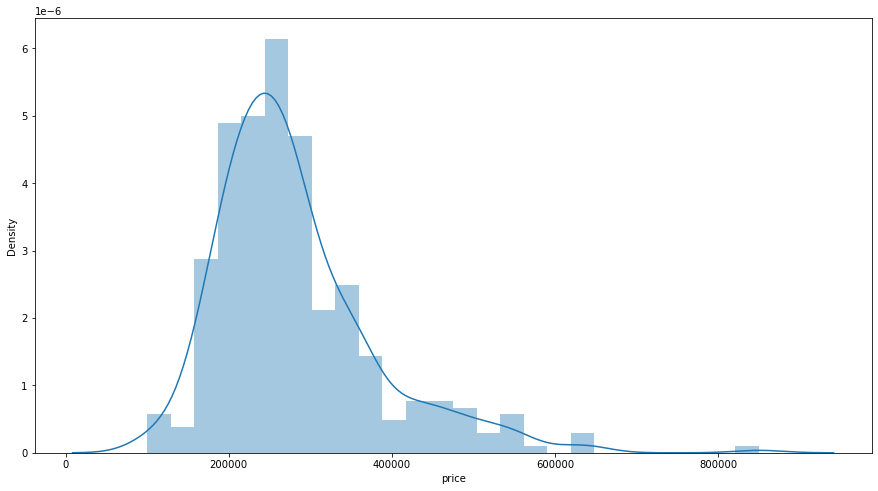

<Figure size 432x288 with 0 Axes>

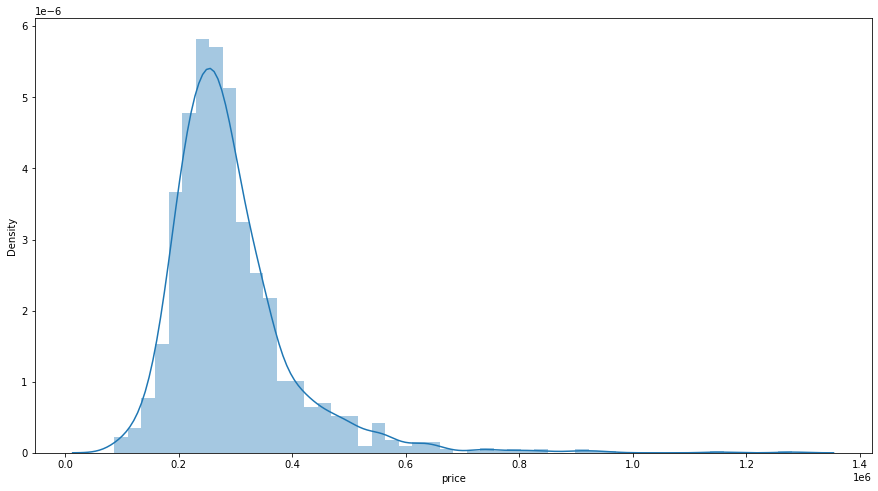

<Figure size 432x288 with 0 Axes>

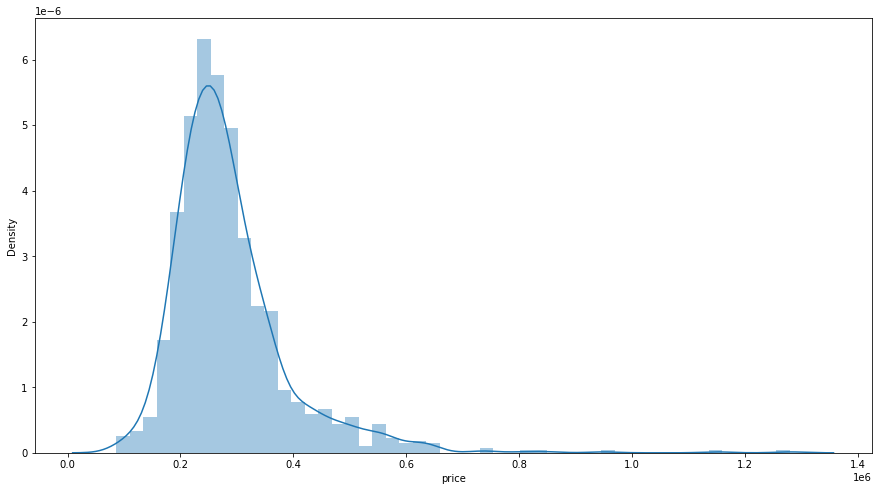

<Figure size 432x288 with 0 Axes>

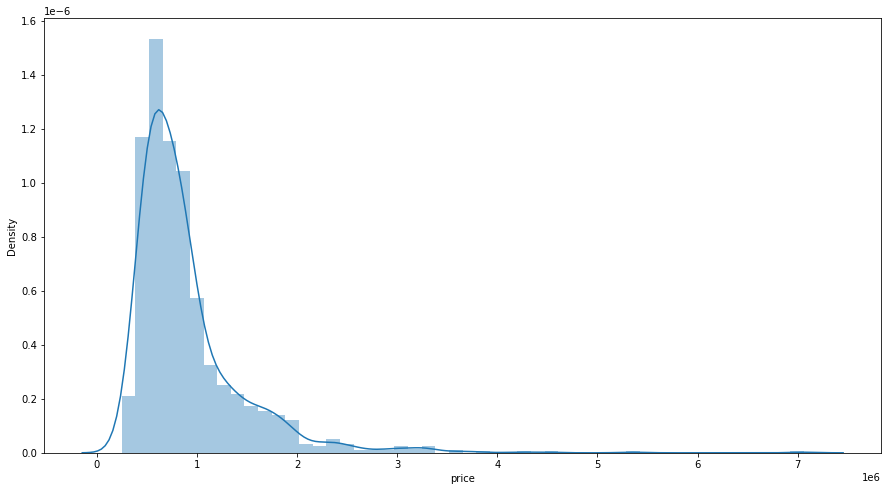

<Figure size 432x288 with 0 Axes>

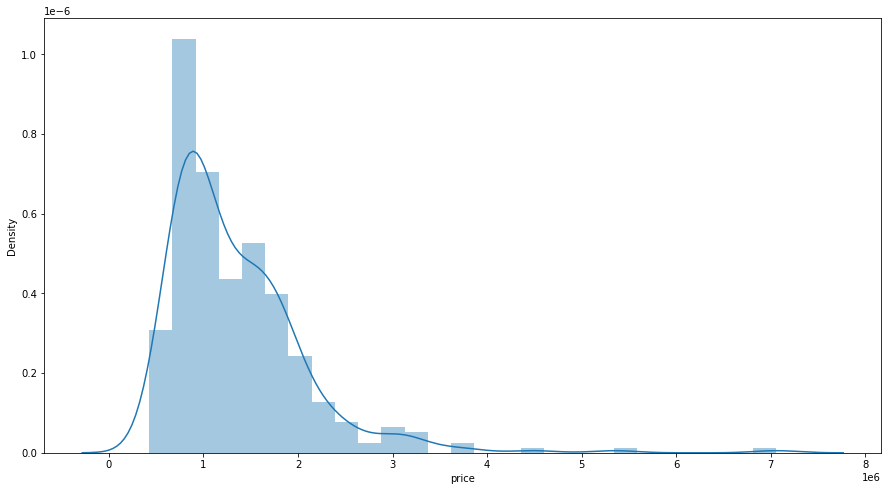

<Figure size 432x288 with 0 Axes>

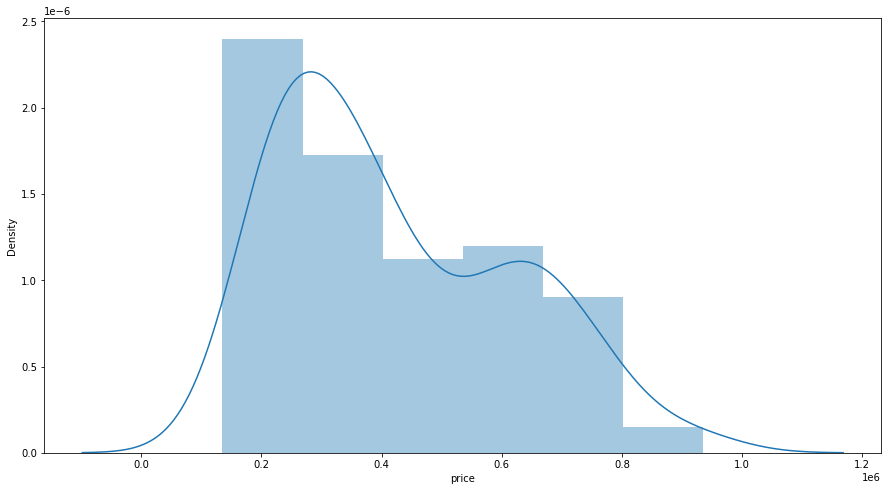

<Figure size 432x288 with 0 Axes>

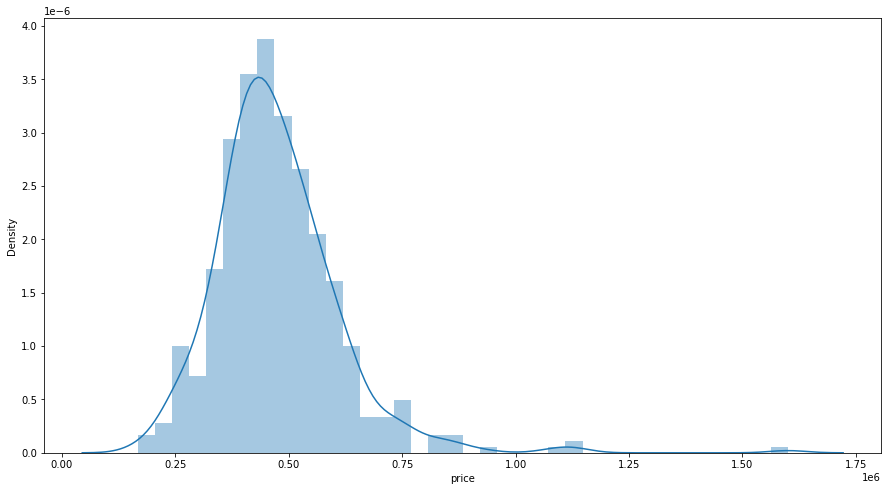

<Figure size 432x288 with 0 Axes>

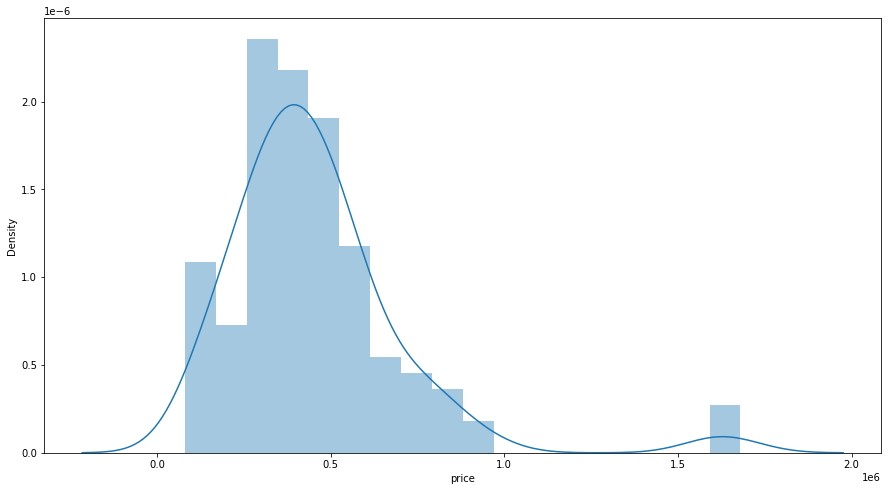

<Figure size 432x288 with 0 Axes>

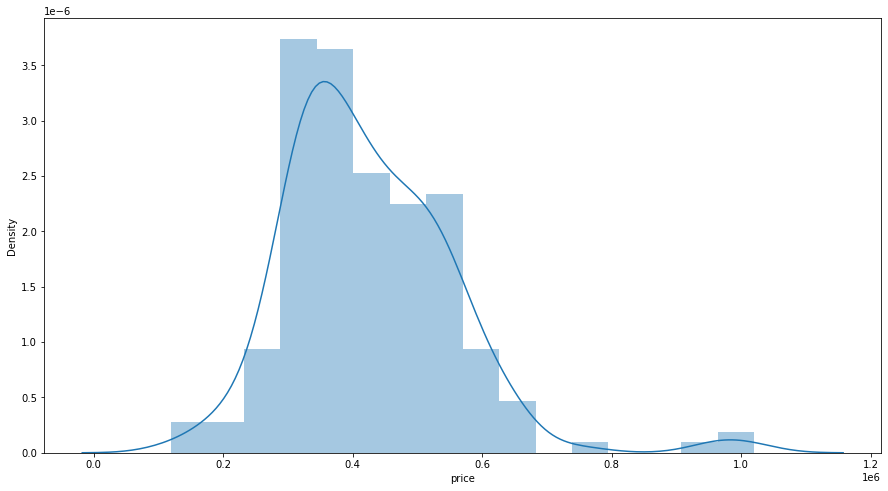

<Figure size 432x288 with 0 Axes>

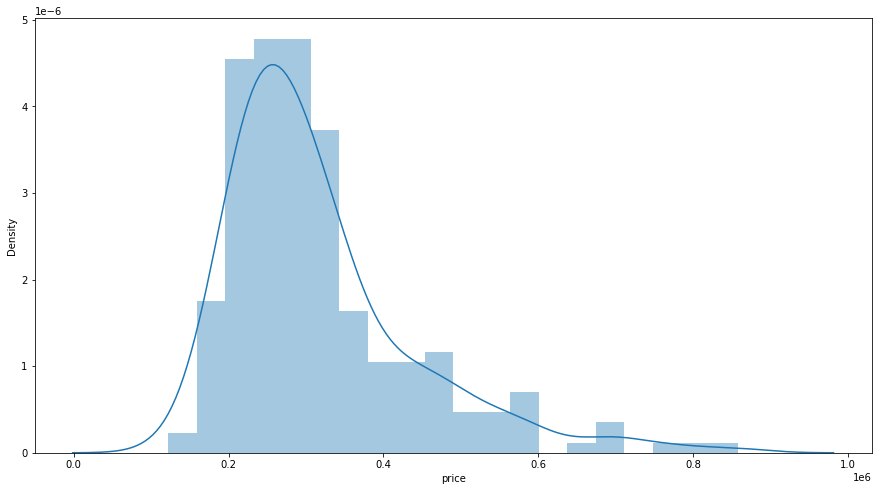

<Figure size 432x288 with 0 Axes>

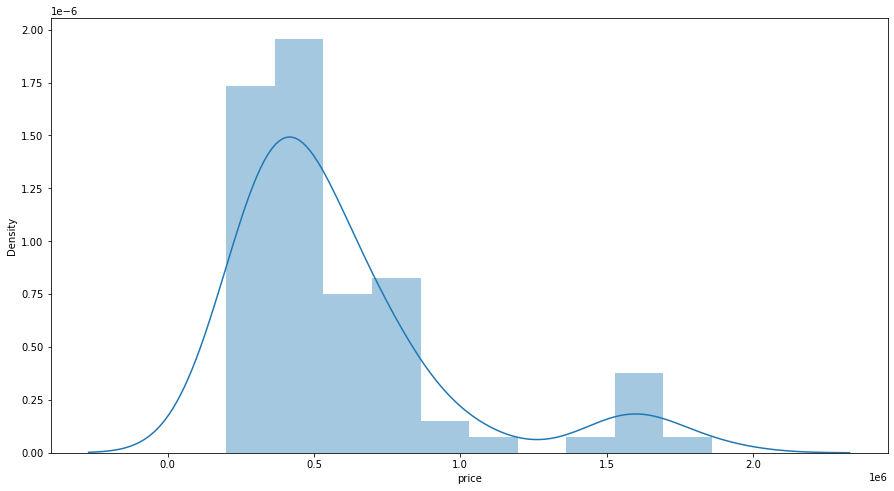

<Figure size 432x288 with 0 Axes>

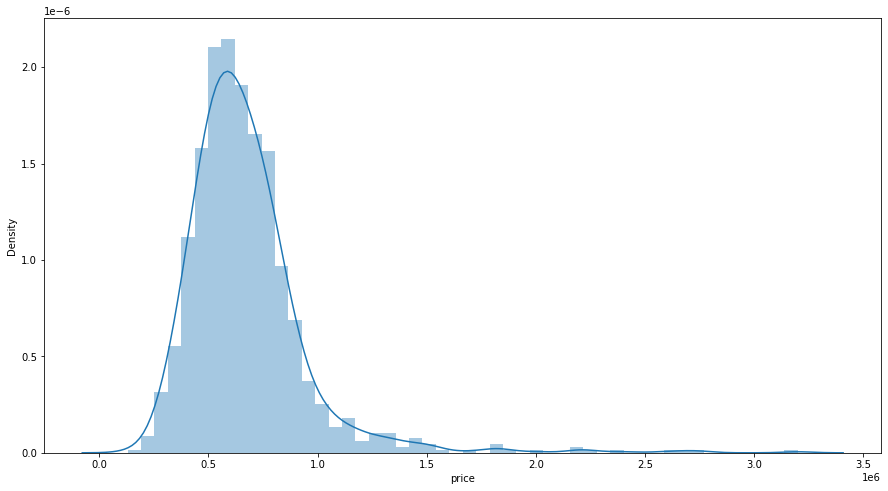

<Figure size 432x288 with 0 Axes>

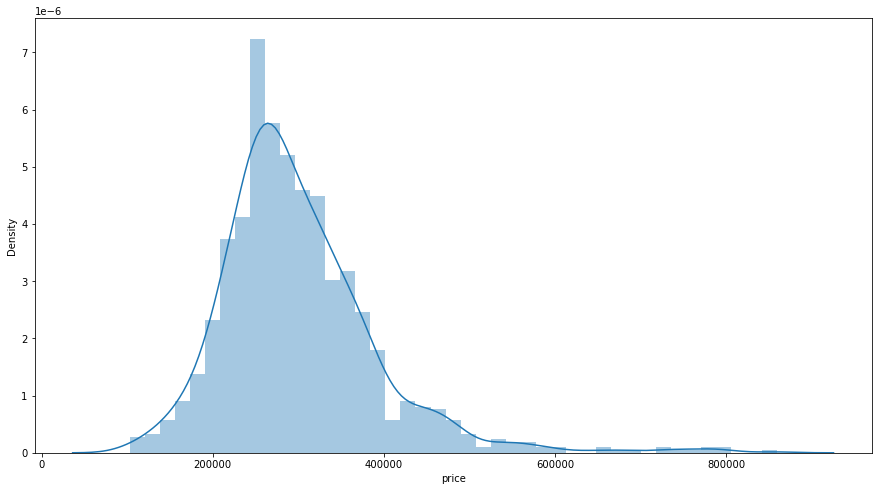

<Figure size 432x288 with 0 Axes>

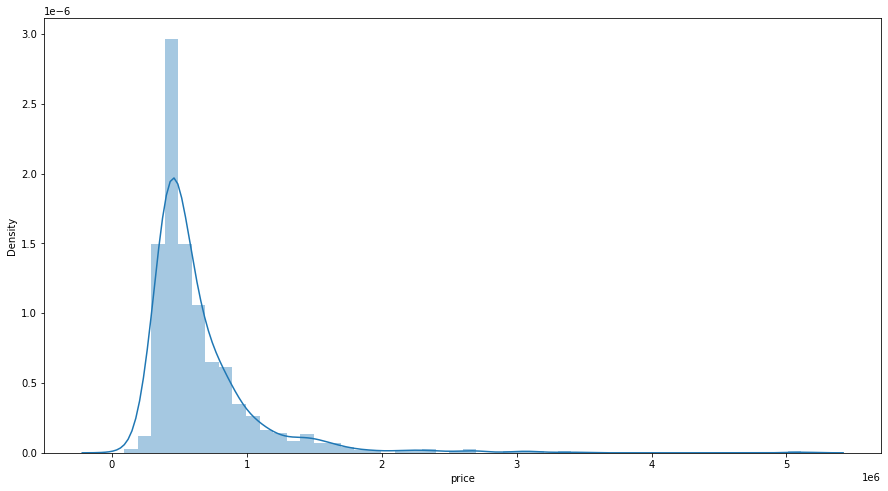

<Figure size 432x288 with 0 Axes>

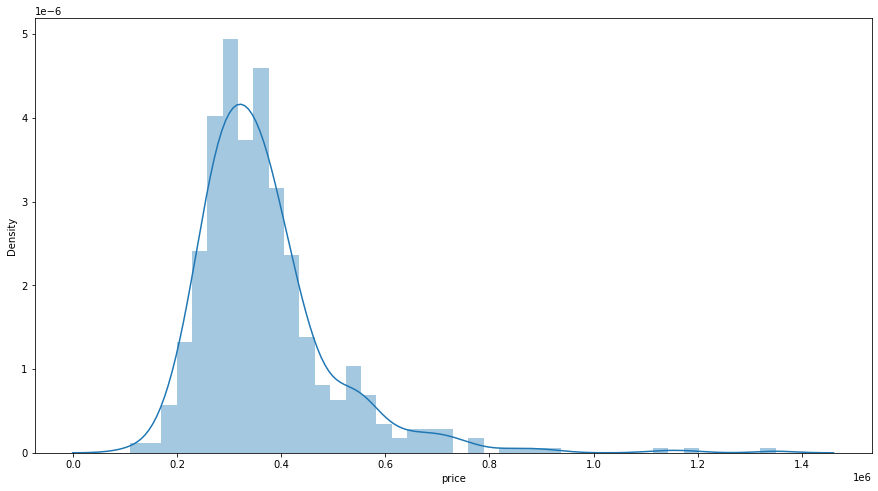

<Figure size 432x288 with 0 Axes>

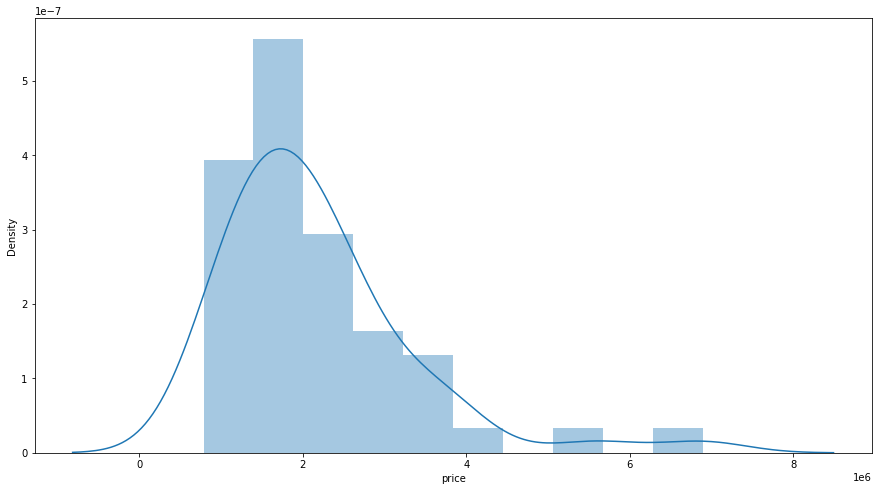

<Figure size 432x288 with 0 Axes>

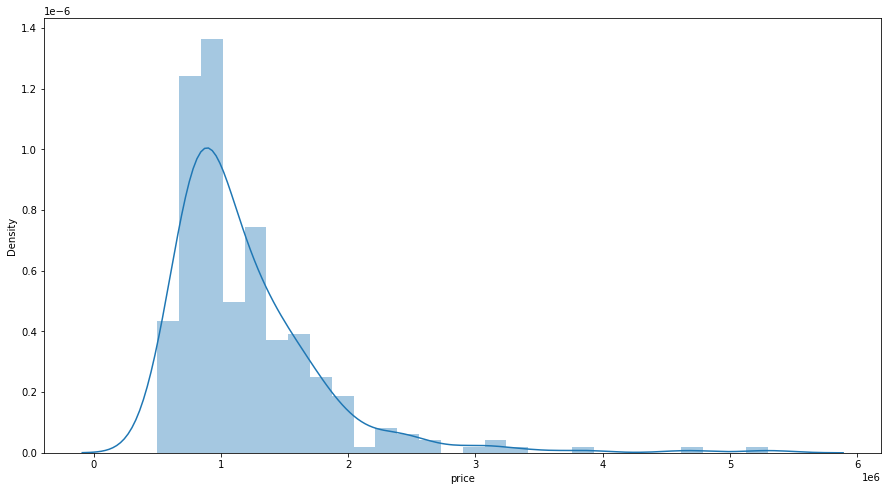

<Figure size 432x288 with 0 Axes>

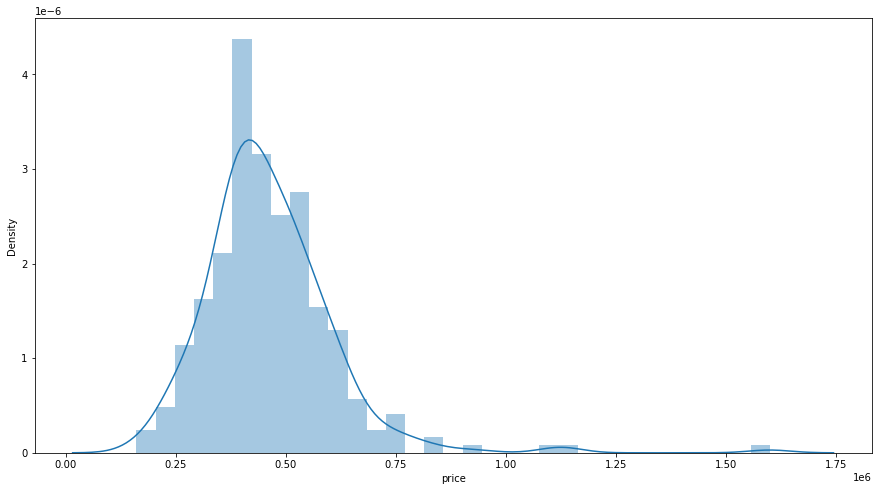

<Figure size 432x288 with 0 Axes>

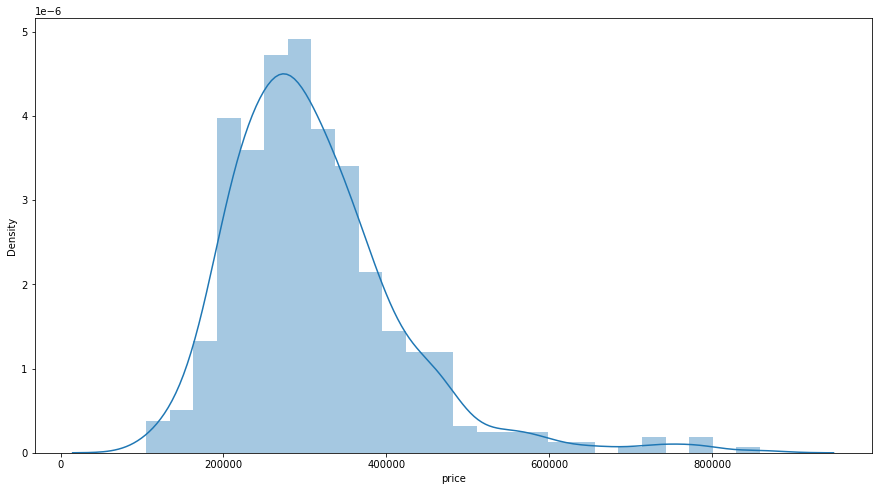

<Figure size 432x288 with 0 Axes>

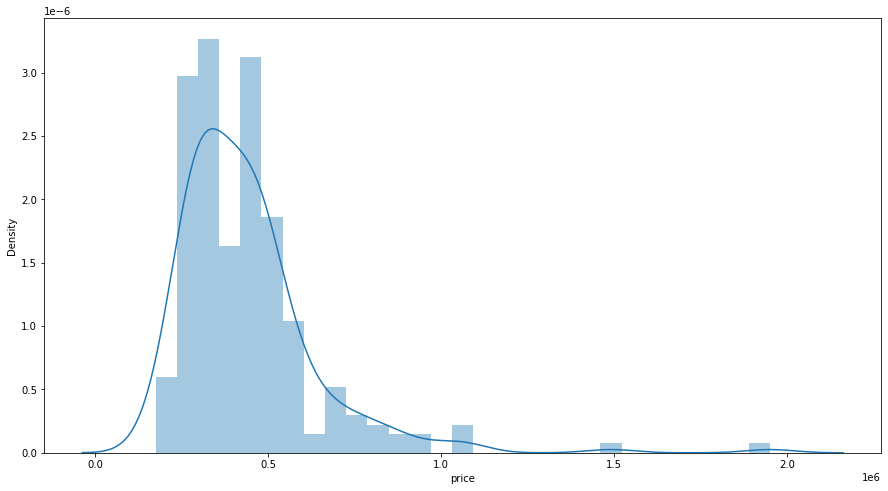

<Figure size 432x288 with 0 Axes>

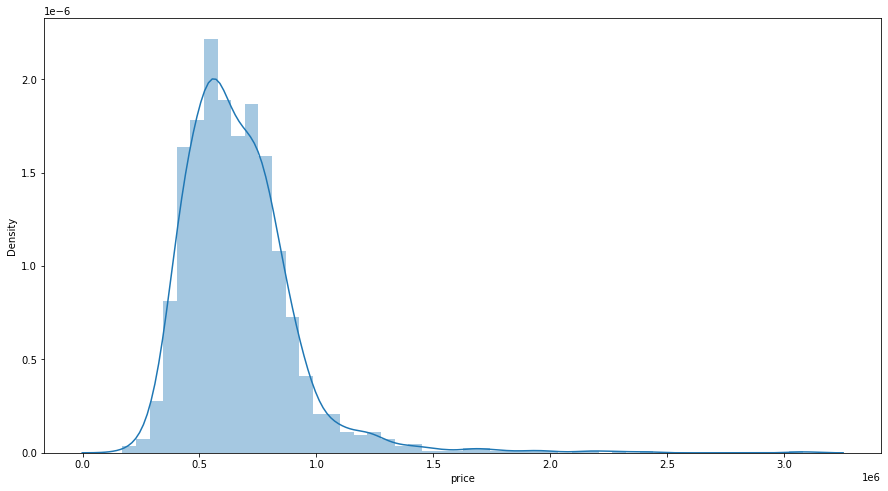

<Figure size 432x288 with 0 Axes>

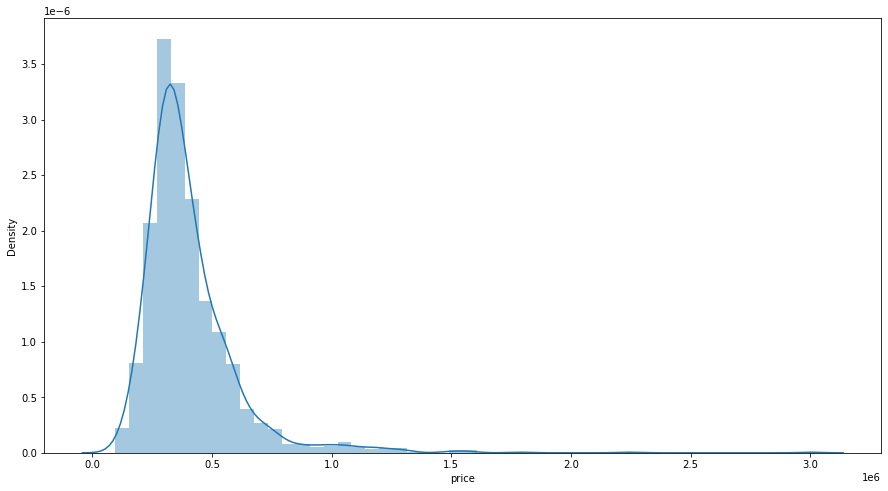

<Figure size 432x288 with 0 Axes>

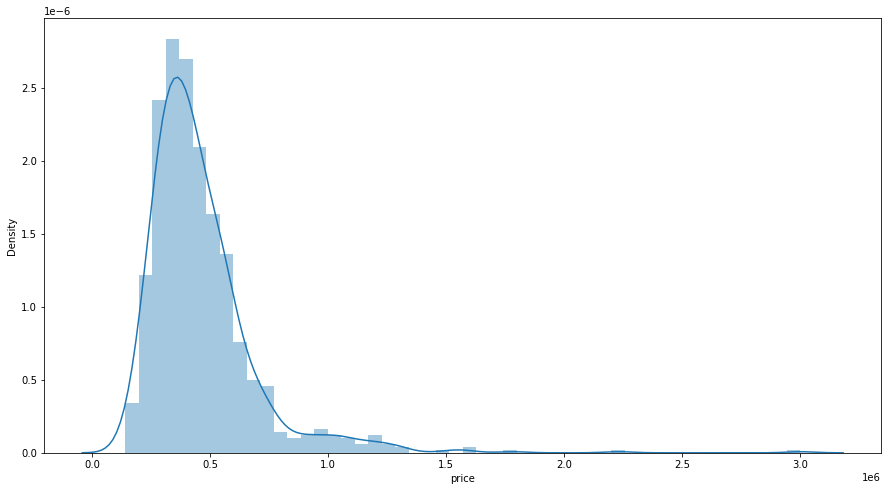

<Figure size 432x288 with 0 Axes>

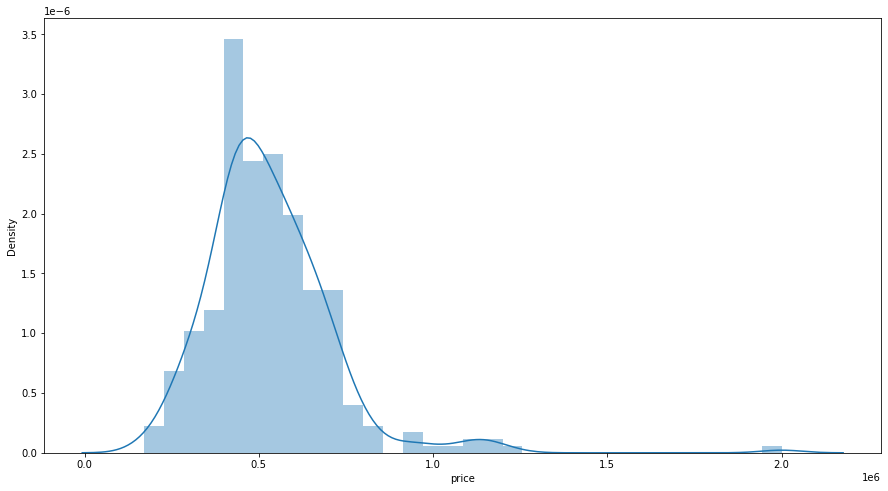

<Figure size 432x288 with 0 Axes>

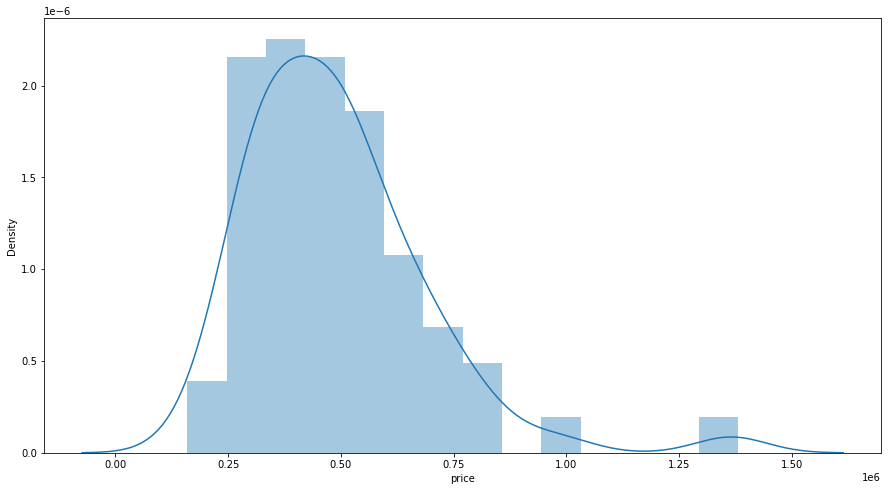

<Figure size 432x288 with 0 Axes>

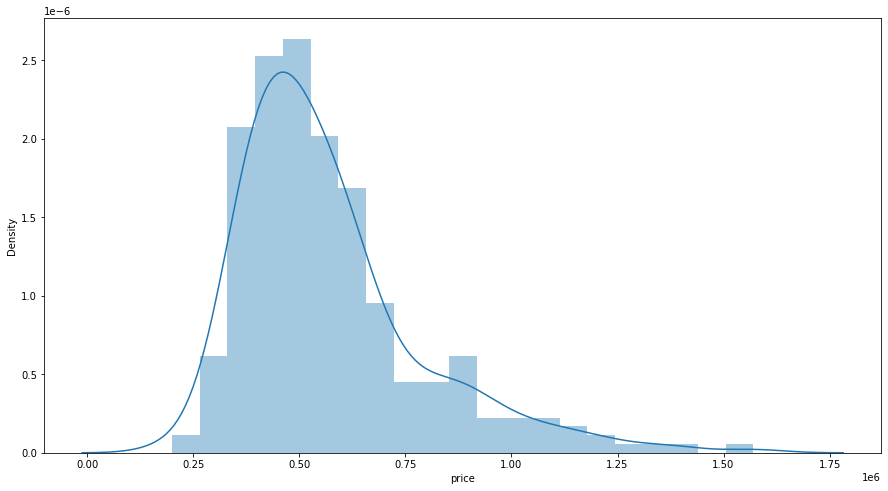

<Figure size 432x288 with 0 Axes>

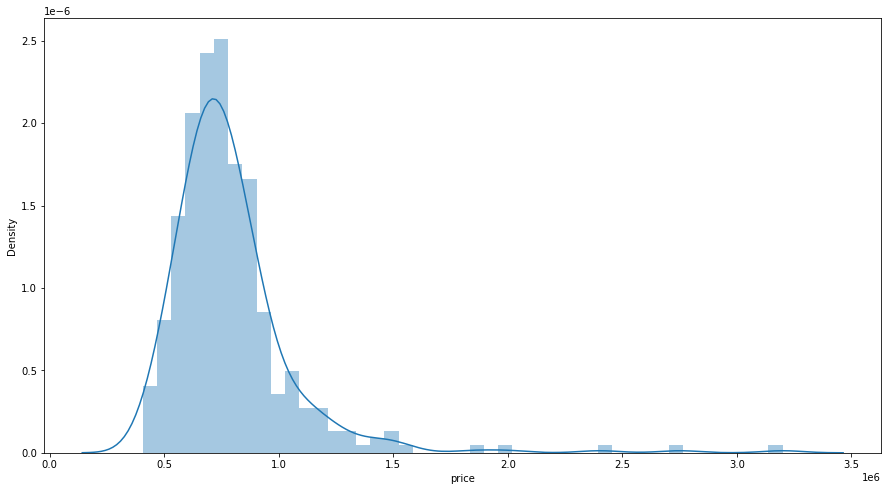

<Figure size 432x288 with 0 Axes>

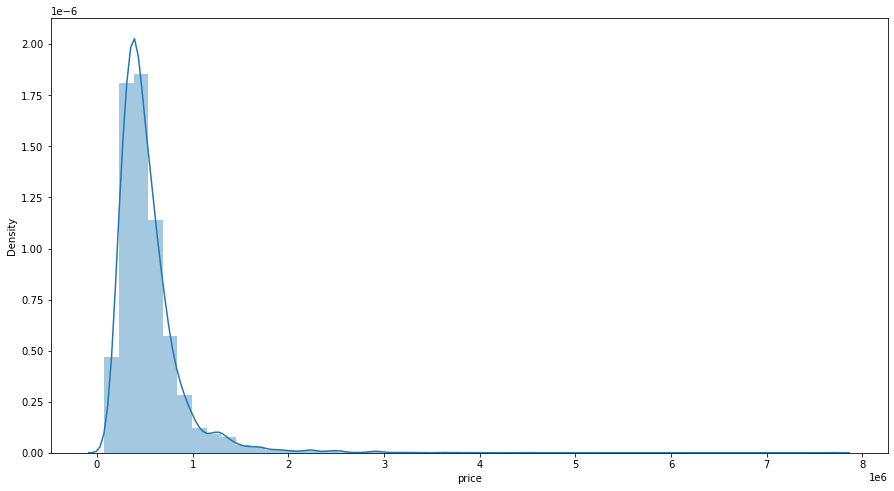

<Figure size 432x288 with 0 Axes>

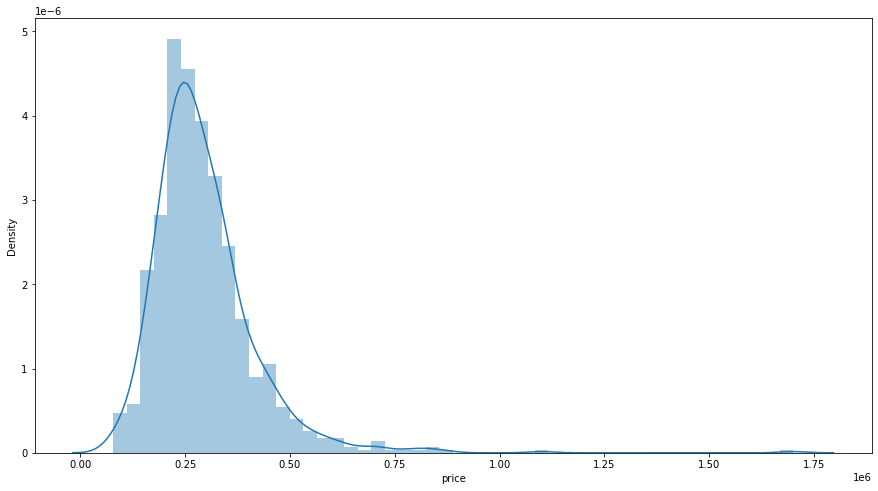

<Figure size 432x288 with 0 Axes>

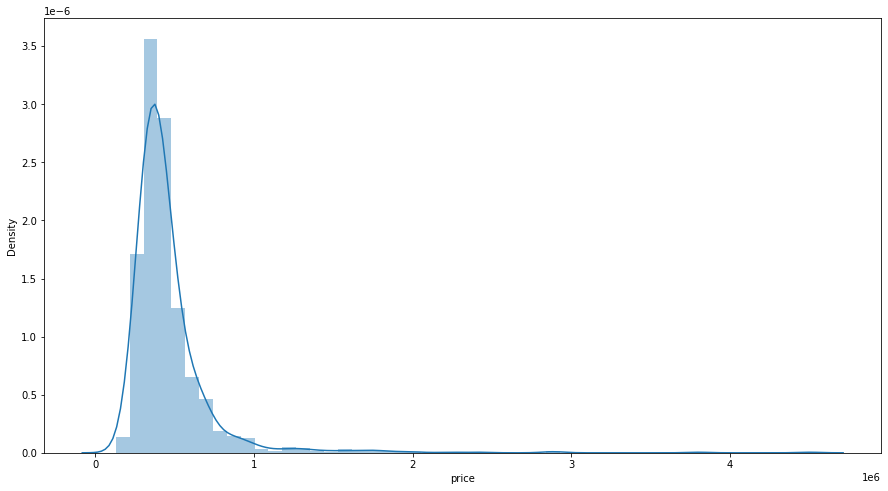

<Figure size 432x288 with 0 Axes>

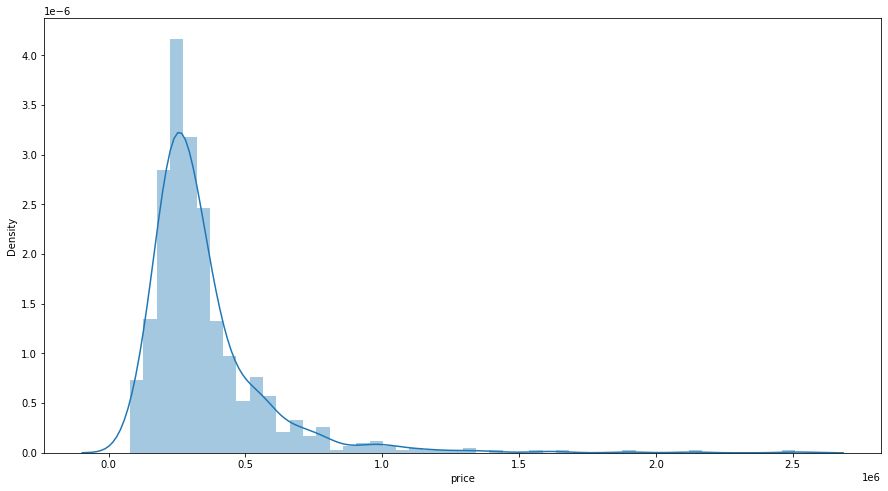

<Figure size 432x288 with 0 Axes>

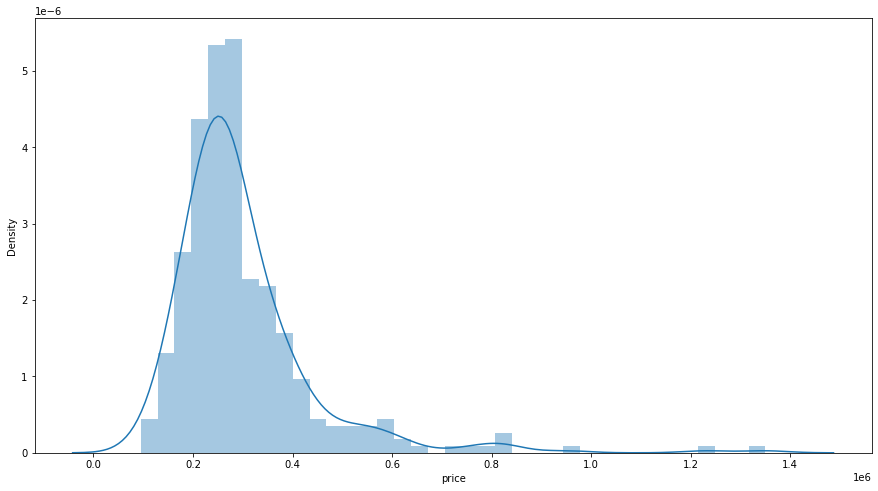

<Figure size 432x288 with 0 Axes>

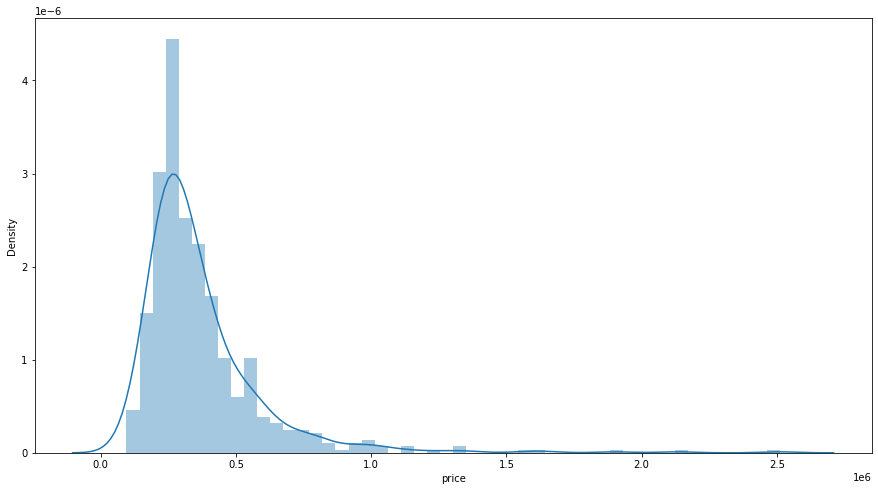

<Figure size 432x288 with 0 Axes>

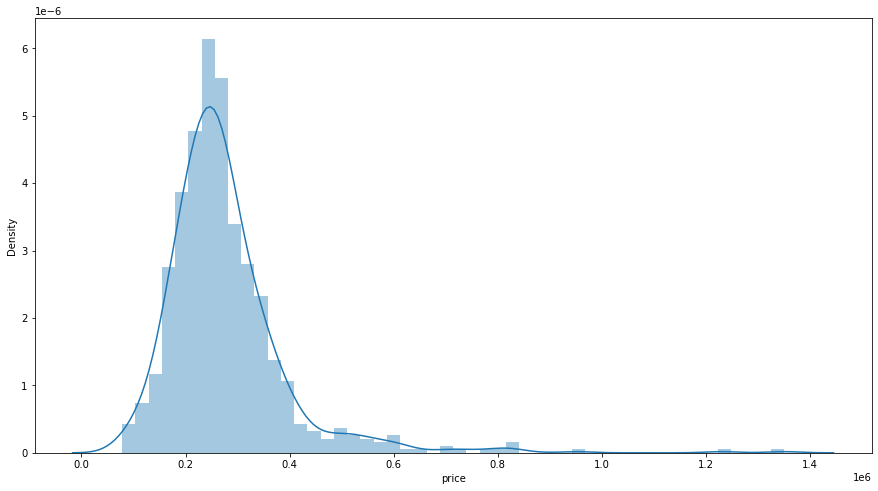

<Figure size 432x288 with 0 Axes>

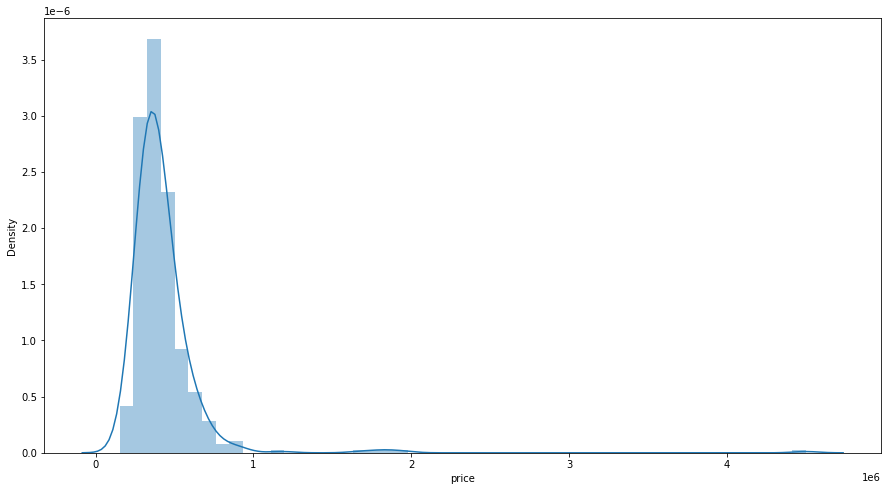

<Figure size 432x288 with 0 Axes>

In [60]:
for i in city_dfs.keys():
    
    fig, ax = plt.subplots(figsize=(15,8))
    sns.distplot(city_dfs[i]['price'], ax=ax)
    
    plt.show()
    plt.clf()

# Distplot after the outlier treatment

boxplot data for Algona


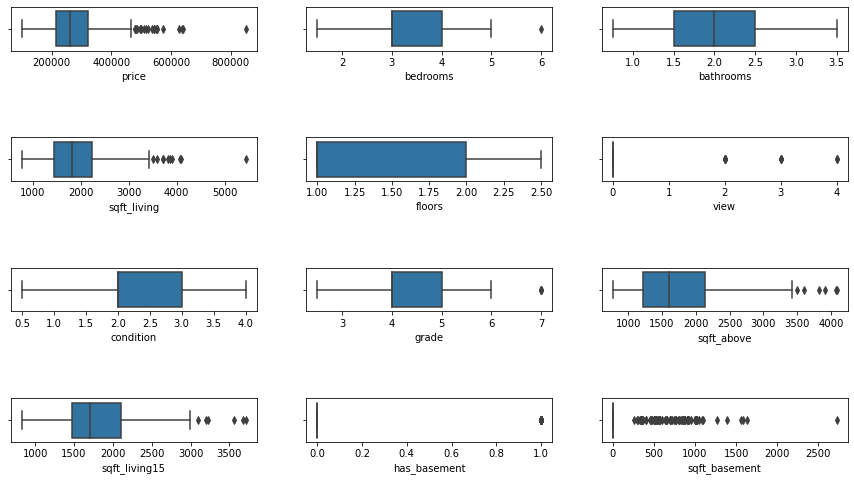

boxplot data for Auburn


<Figure size 432x288 with 0 Axes>

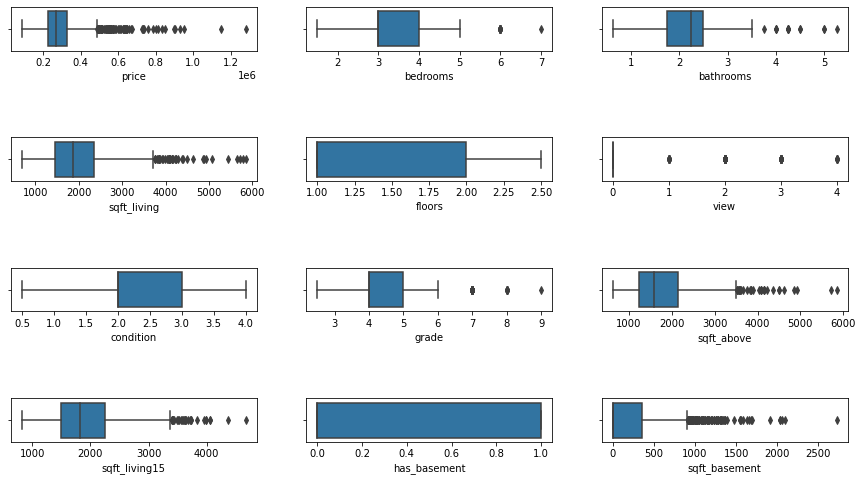

boxplot data for Federal Way


<Figure size 432x288 with 0 Axes>

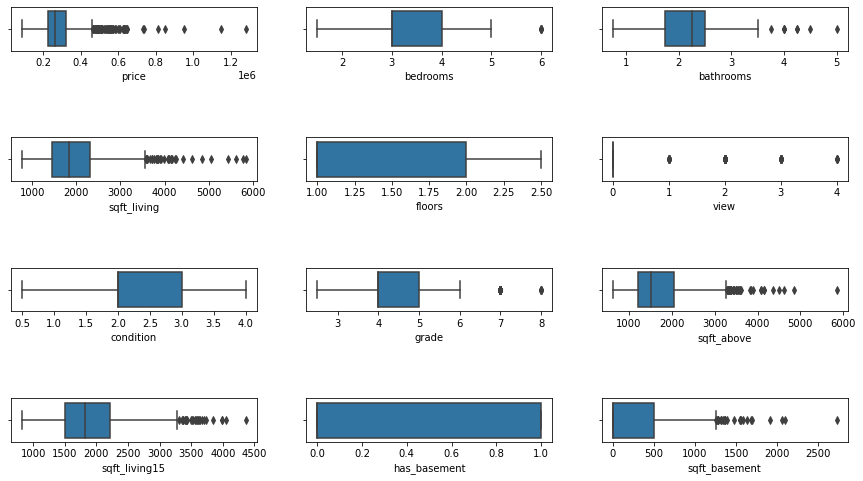

boxplot data for Bellevue


<Figure size 432x288 with 0 Axes>

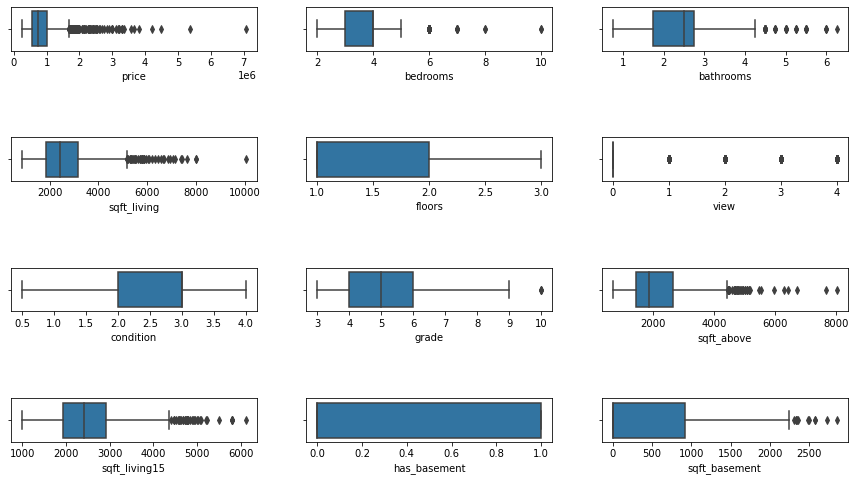

boxplot data for Yarrow Point


<Figure size 432x288 with 0 Axes>

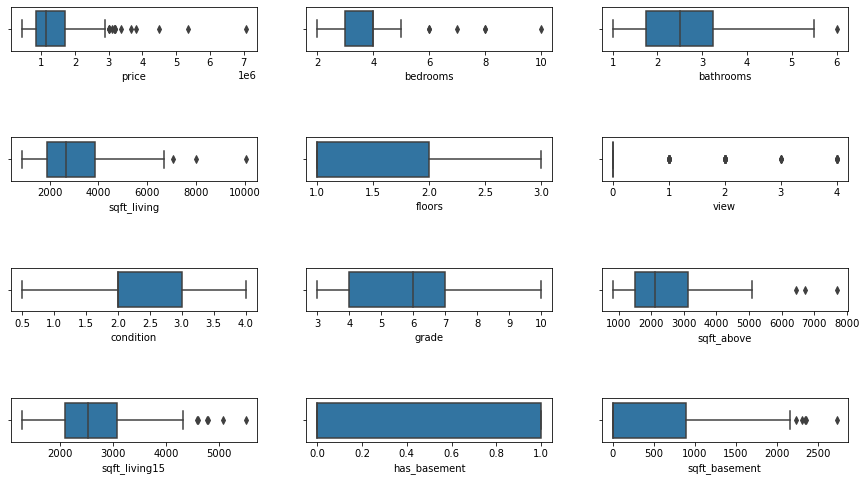

boxplot data for Black Diamond


<Figure size 432x288 with 0 Axes>

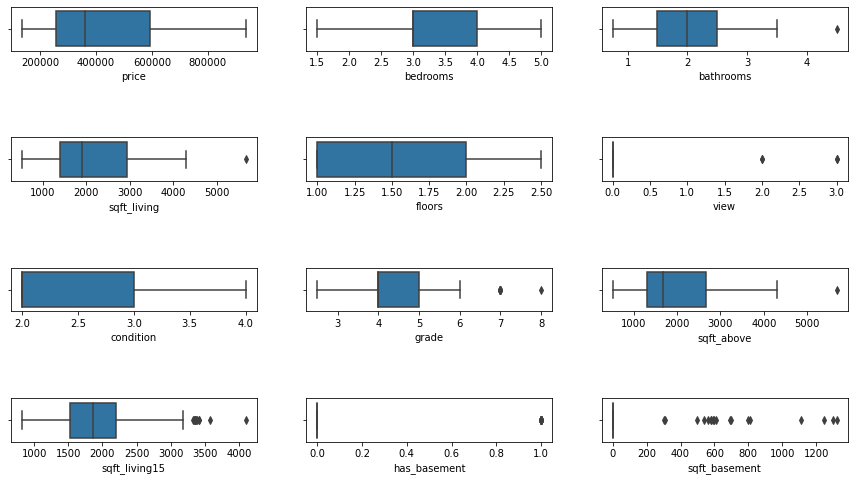

boxplot data for Bothell


<Figure size 432x288 with 0 Axes>

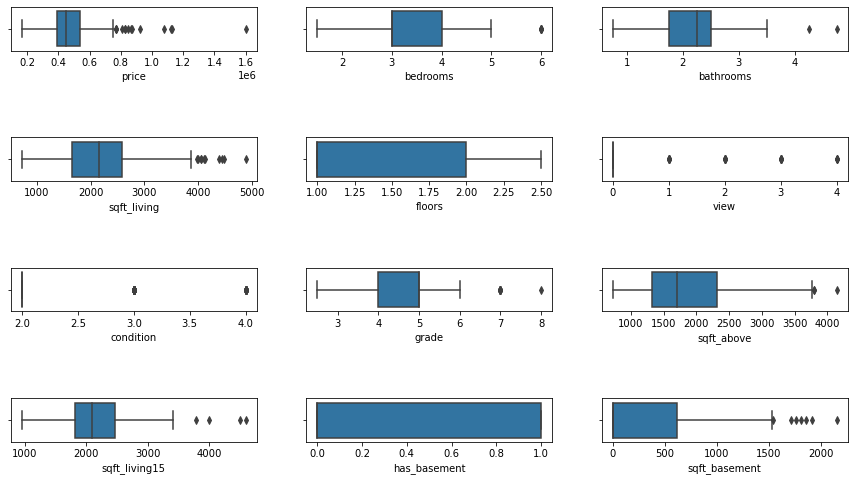

boxplot data for Carnation


<Figure size 432x288 with 0 Axes>

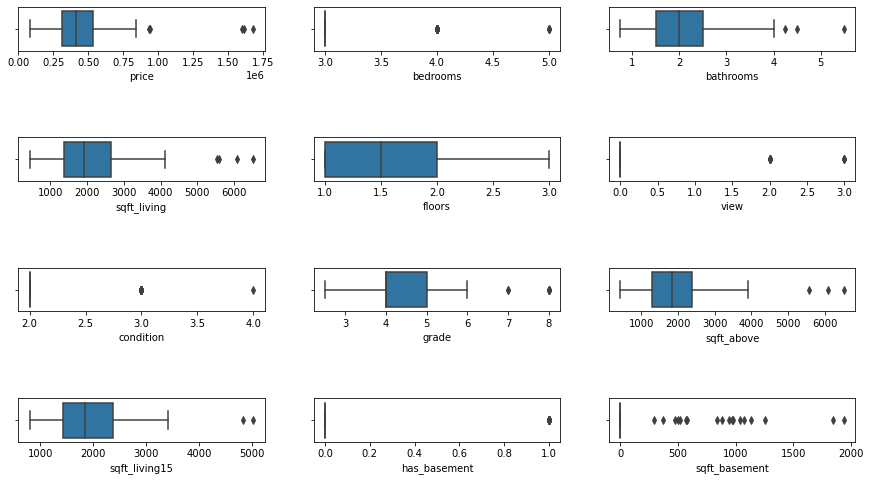

boxplot data for Duvall


<Figure size 432x288 with 0 Axes>

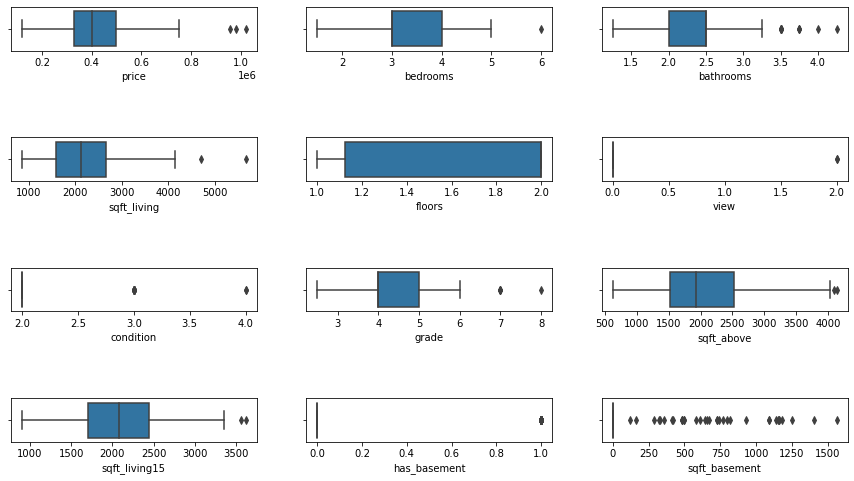

boxplot data for Enumclaw


<Figure size 432x288 with 0 Axes>

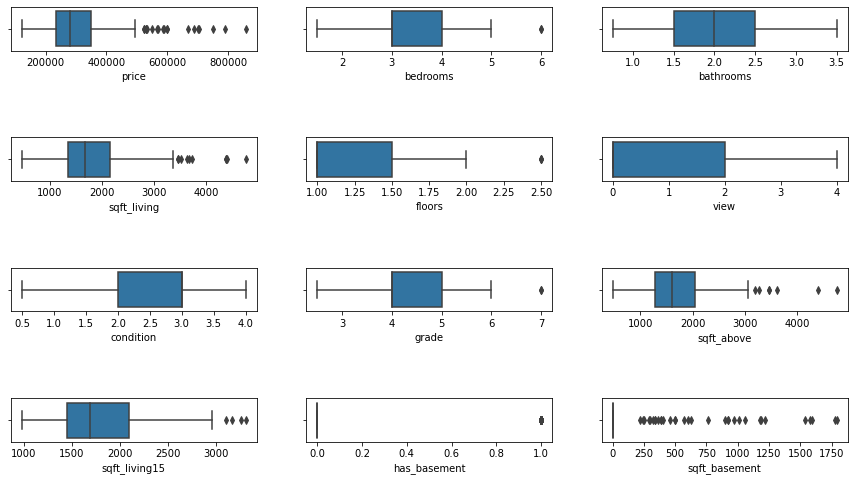

boxplot data for Fall City


<Figure size 432x288 with 0 Axes>

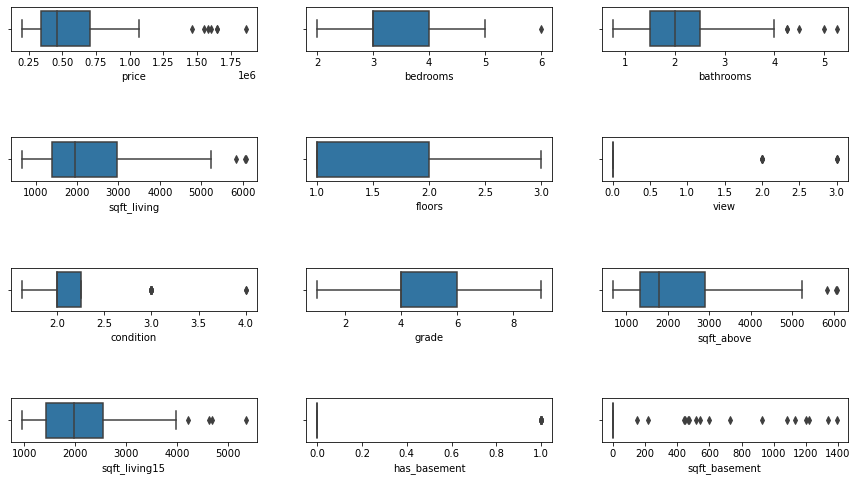

boxplot data for Issaquah


<Figure size 432x288 with 0 Axes>

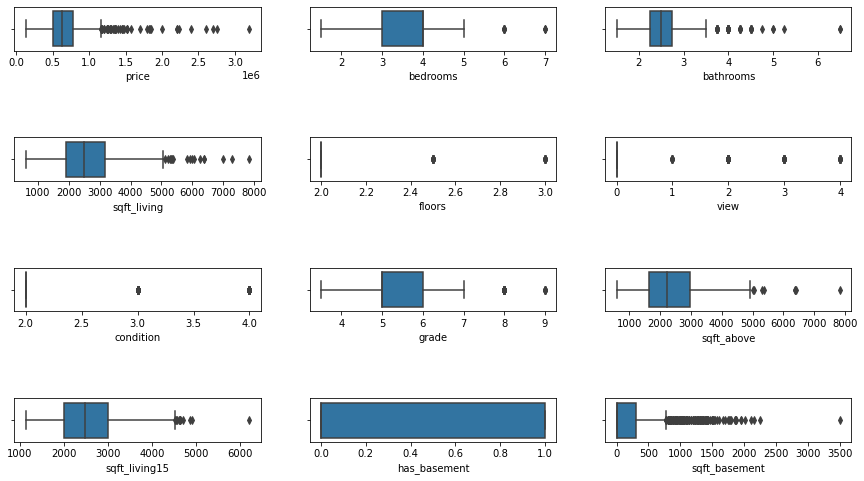

boxplot data for Kent


<Figure size 432x288 with 0 Axes>

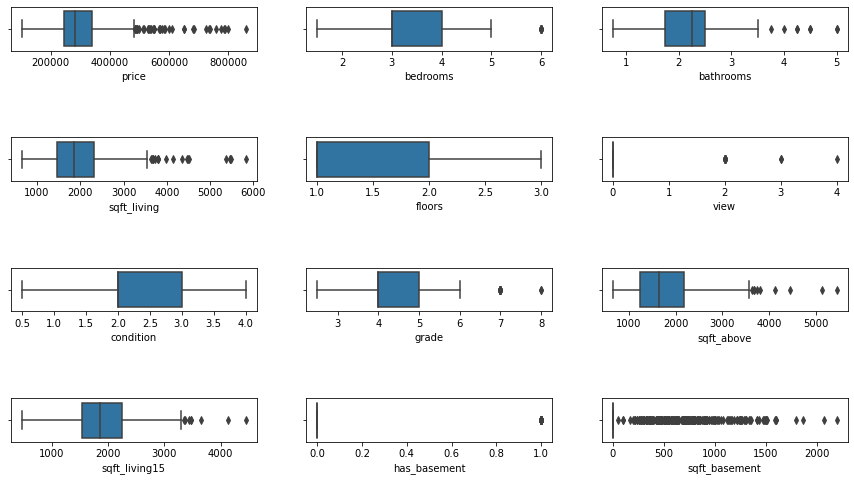

boxplot data for Kirkland


<Figure size 432x288 with 0 Axes>

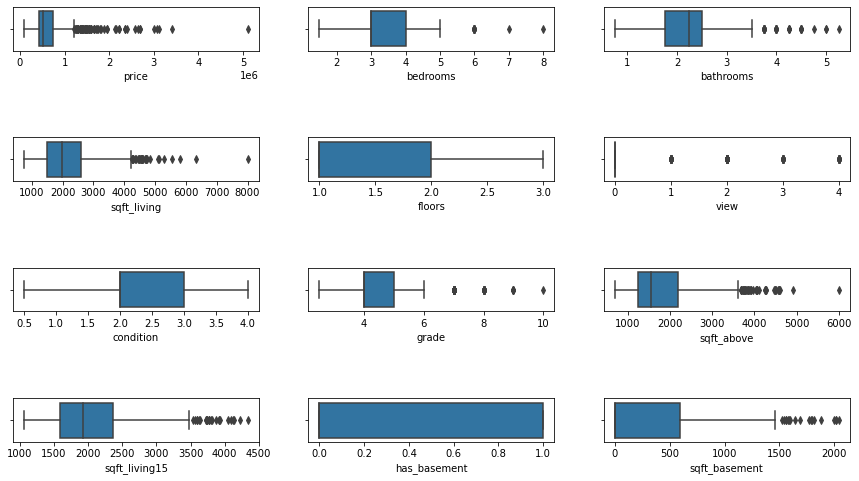

boxplot data for Maple Valley


<Figure size 432x288 with 0 Axes>

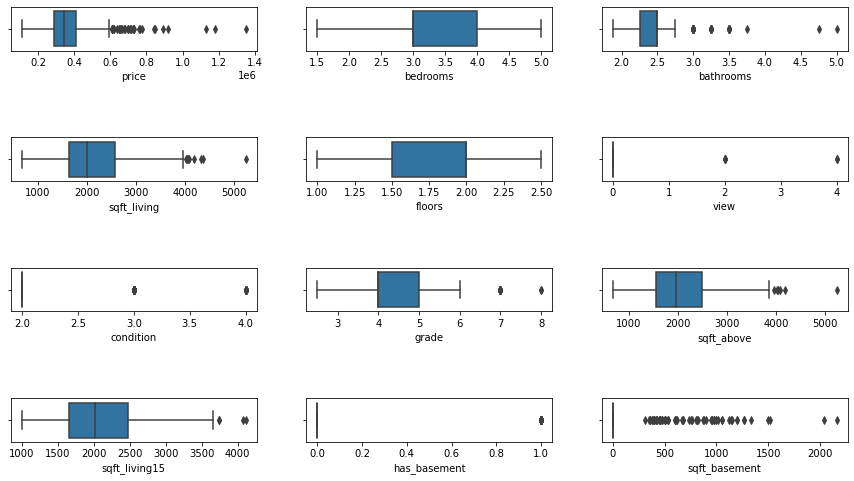

boxplot data for Medina


<Figure size 432x288 with 0 Axes>

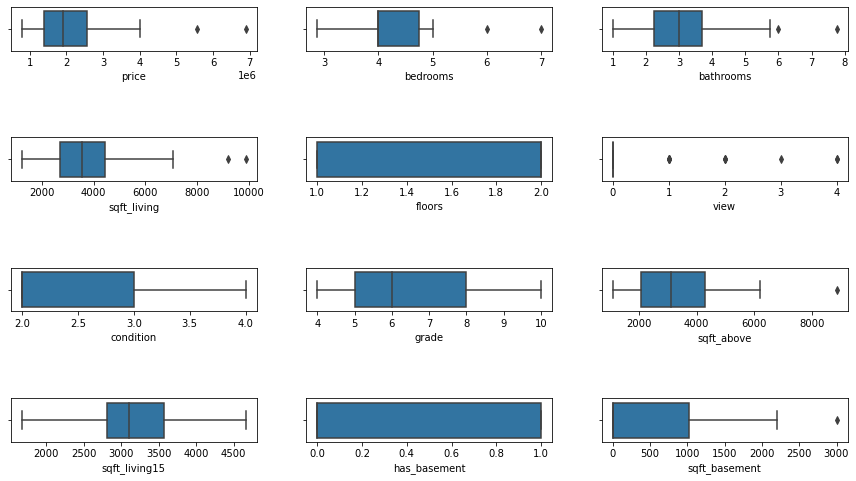

boxplot data for Mercer Island


<Figure size 432x288 with 0 Axes>

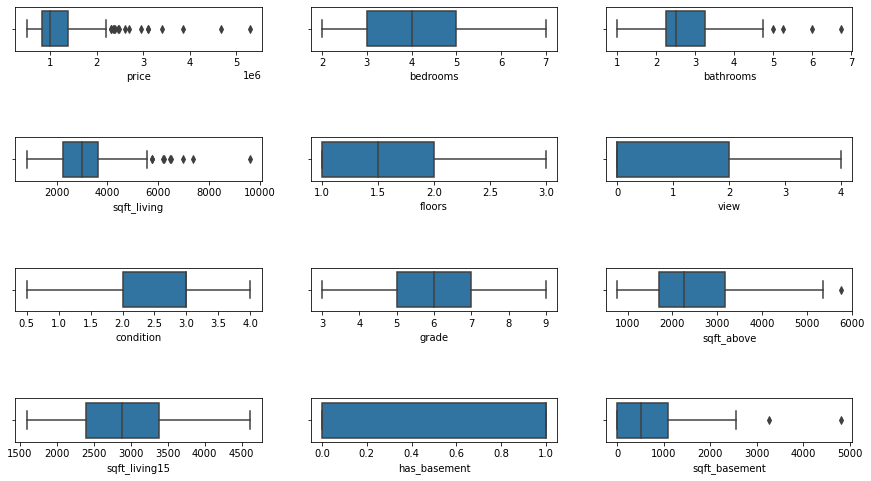

boxplot data for Kenmore


<Figure size 432x288 with 0 Axes>

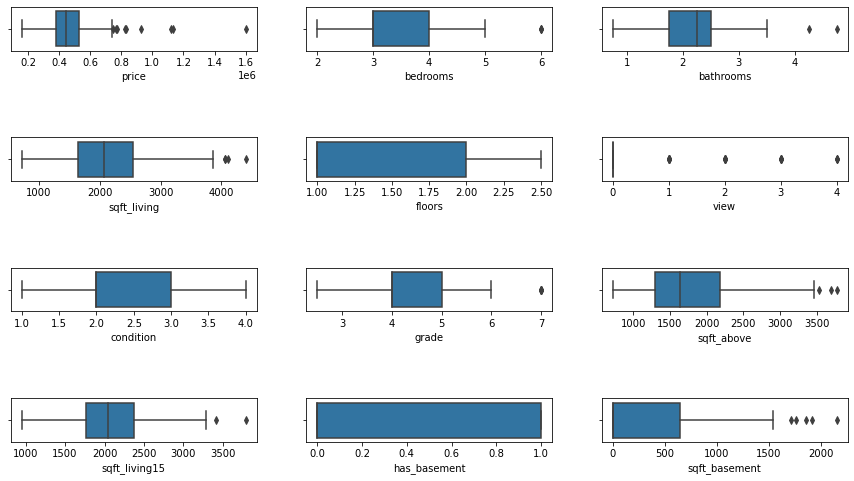

boxplot data for Covington


<Figure size 432x288 with 0 Axes>

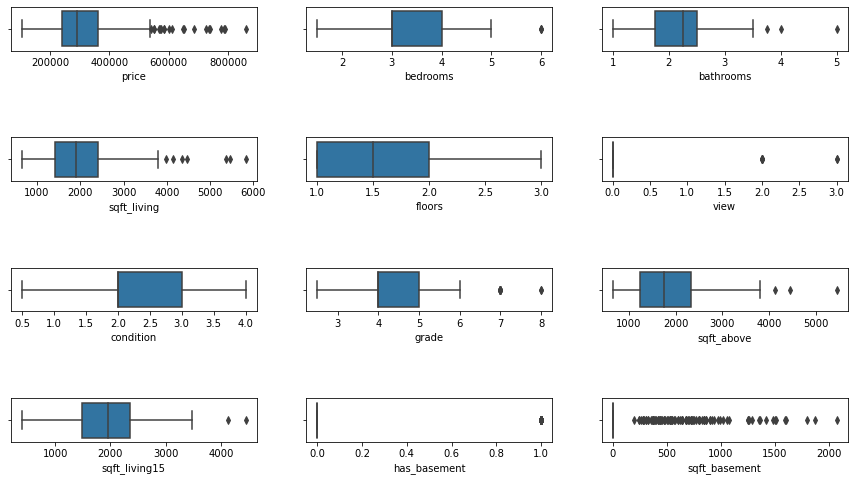

boxplot data for North Bend


<Figure size 432x288 with 0 Axes>

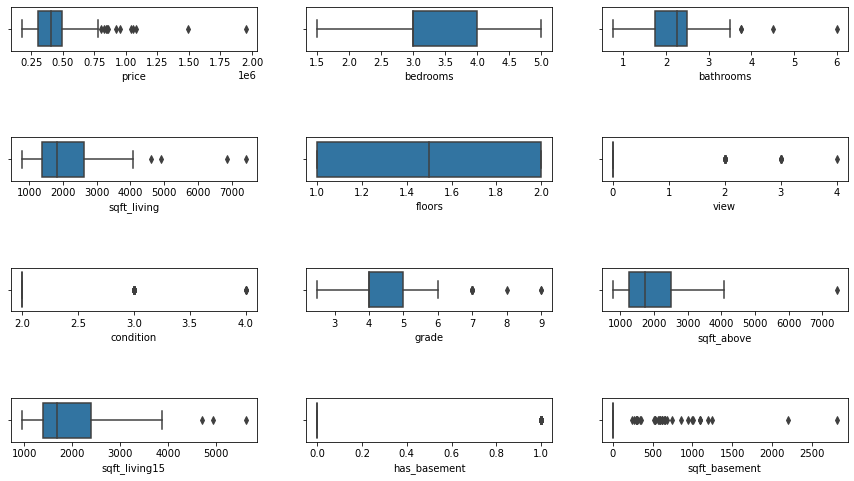

boxplot data for Redmond


<Figure size 432x288 with 0 Axes>

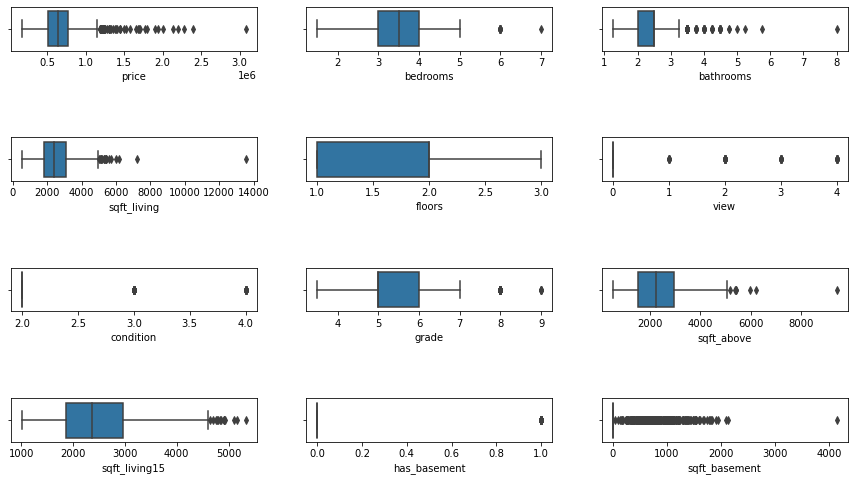

boxplot data for Renton


<Figure size 432x288 with 0 Axes>

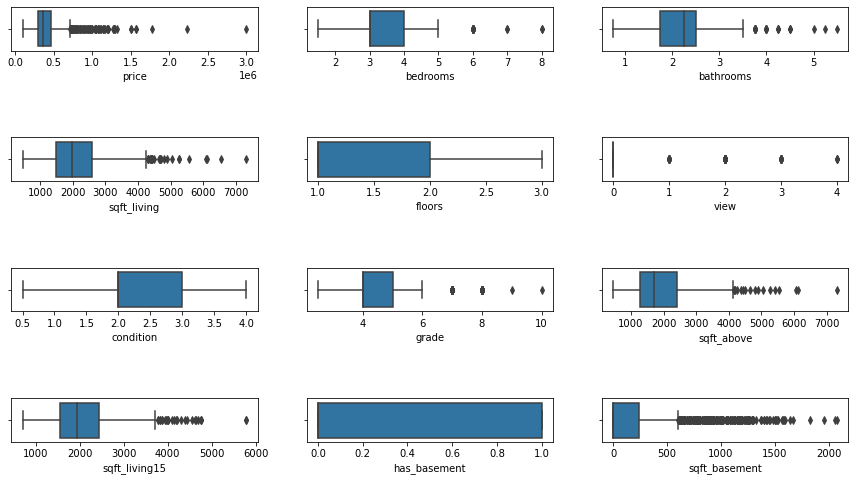

boxplot data for Newcastle


<Figure size 432x288 with 0 Axes>

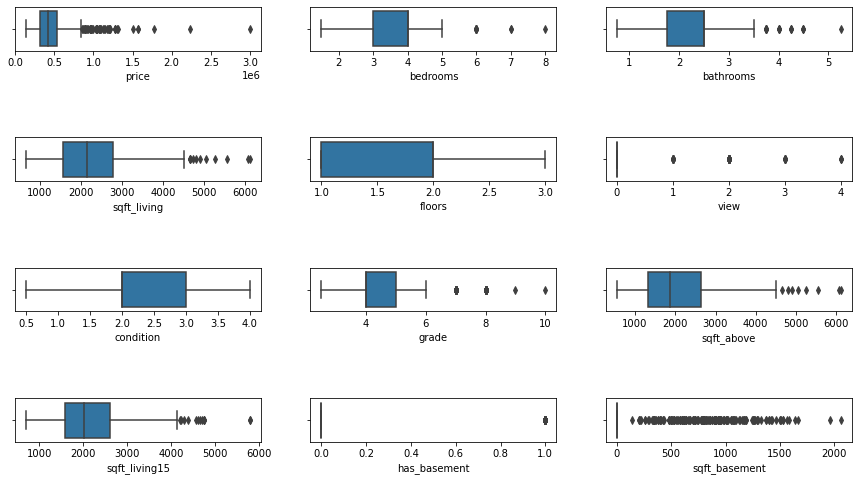

boxplot data for Snoqualmie


<Figure size 432x288 with 0 Axes>

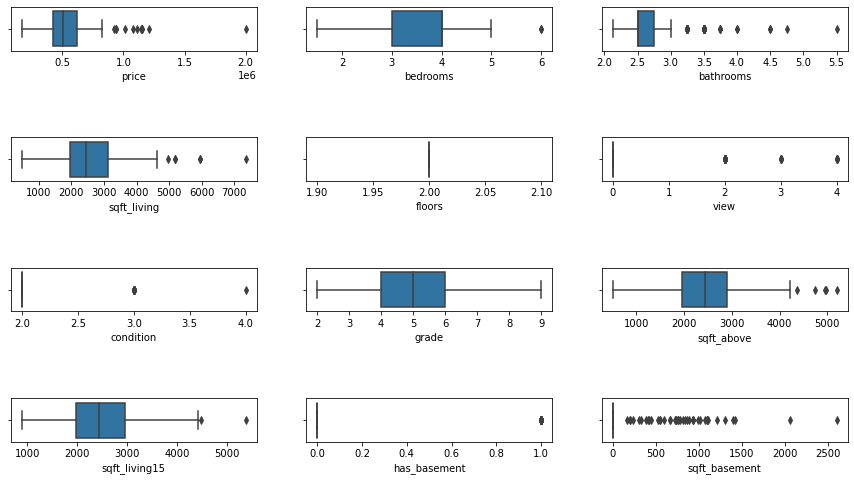

boxplot data for Vashon


<Figure size 432x288 with 0 Axes>

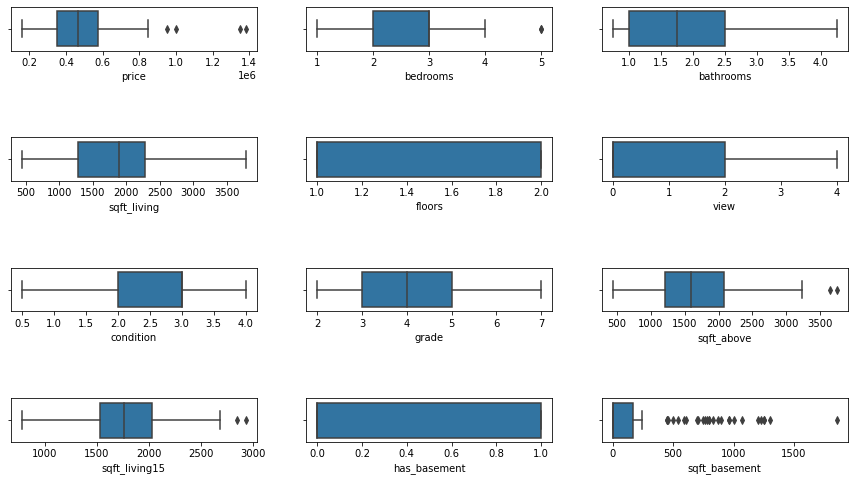

boxplot data for Woodinville


<Figure size 432x288 with 0 Axes>

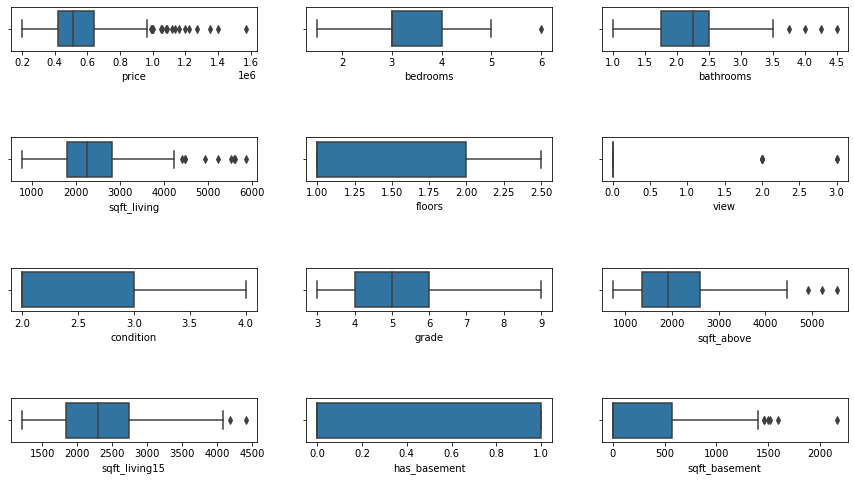

boxplot data for Sammamish


<Figure size 432x288 with 0 Axes>

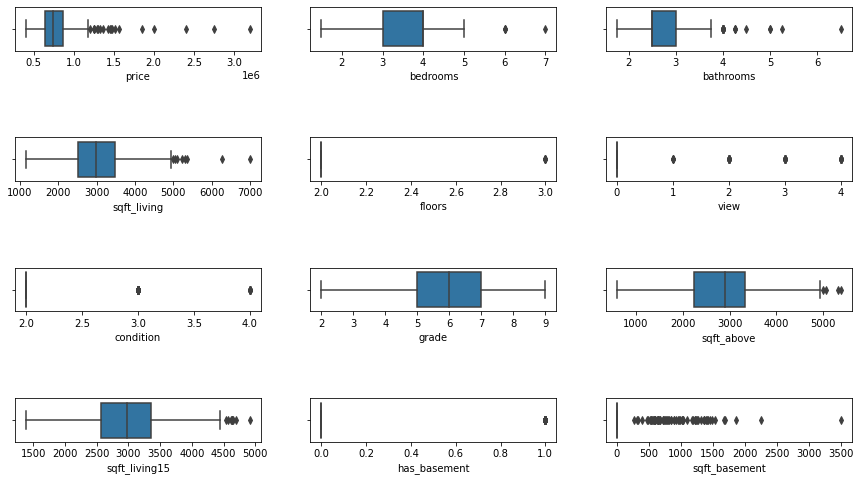

boxplot data for Seattle


<Figure size 432x288 with 0 Axes>

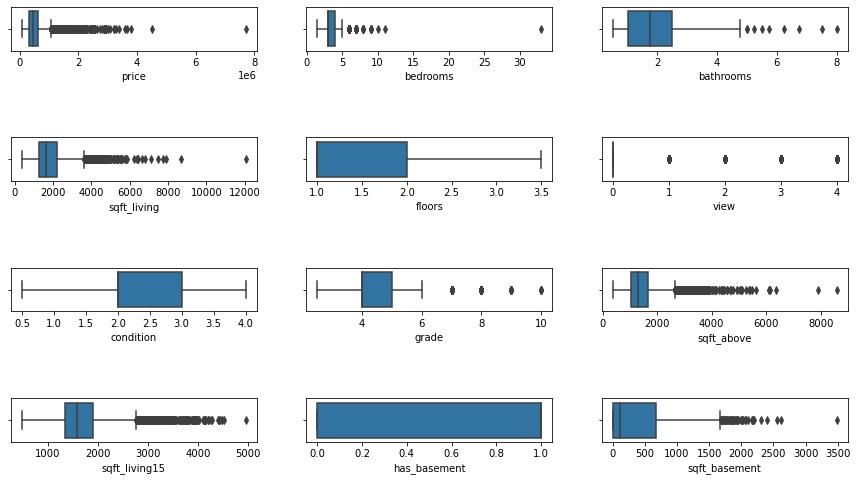

boxplot data for Tukwila


<Figure size 432x288 with 0 Axes>

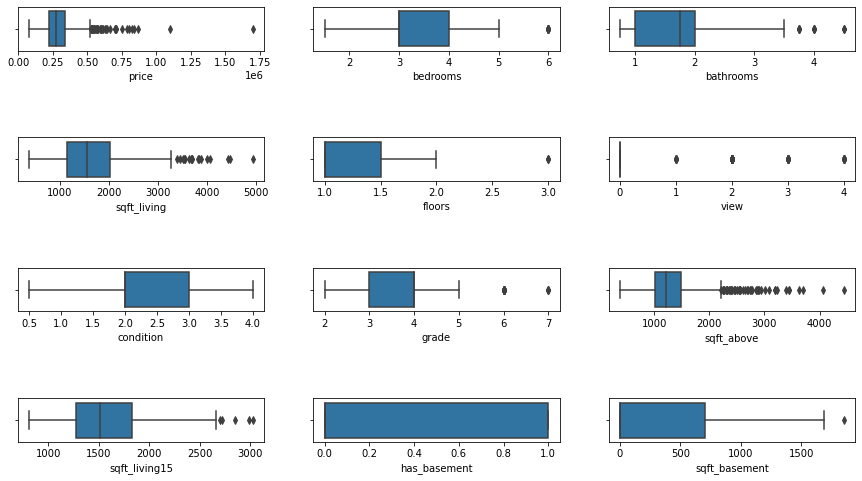

boxplot data for Shoreline


<Figure size 432x288 with 0 Axes>

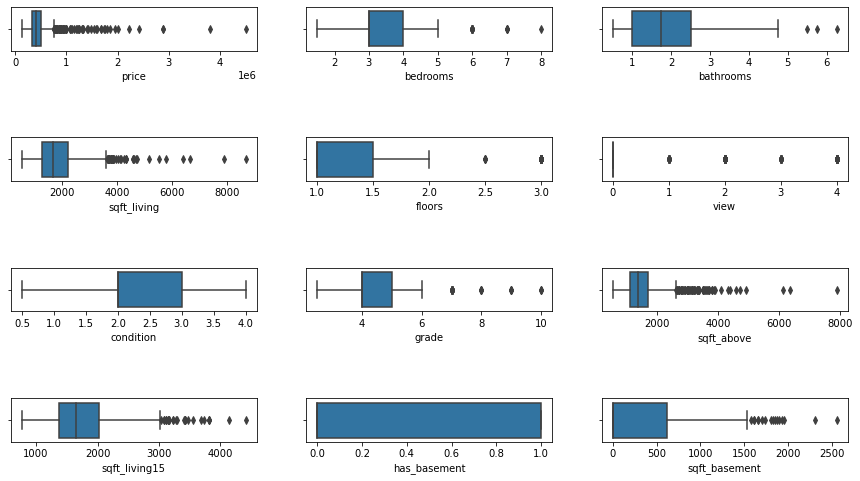

boxplot data for Burien


<Figure size 432x288 with 0 Axes>

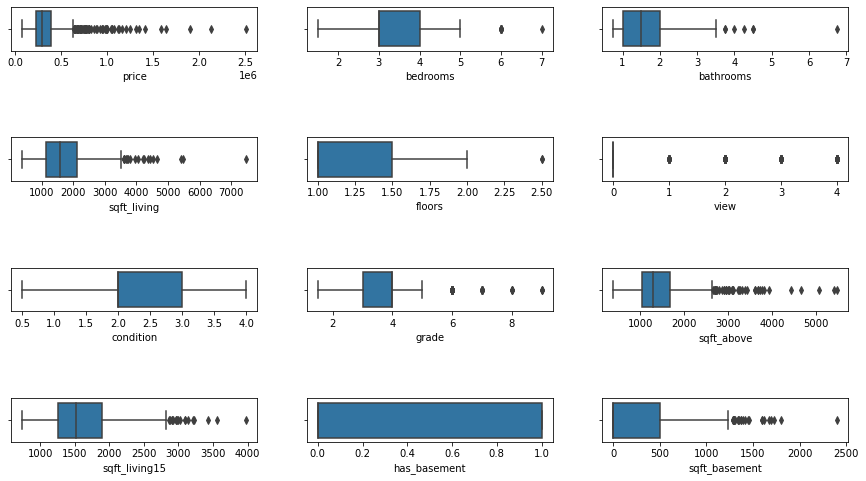

boxplot data for Des Moines


<Figure size 432x288 with 0 Axes>

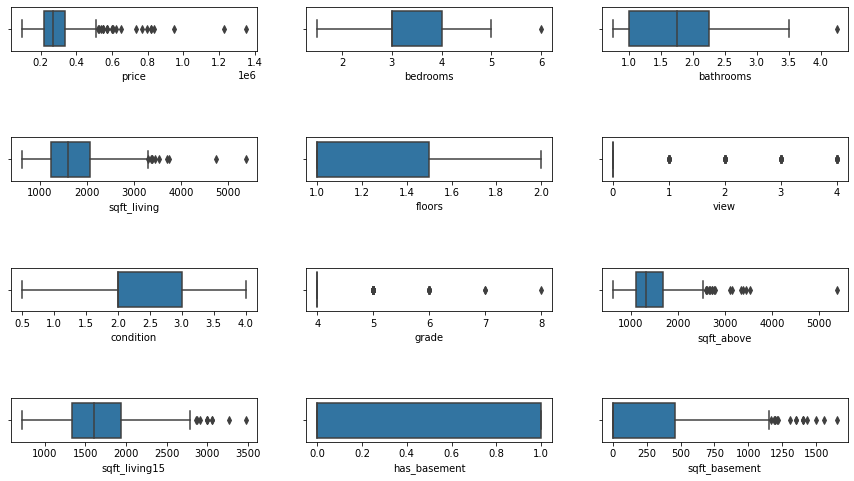

boxplot data for Normandy Park


<Figure size 432x288 with 0 Axes>

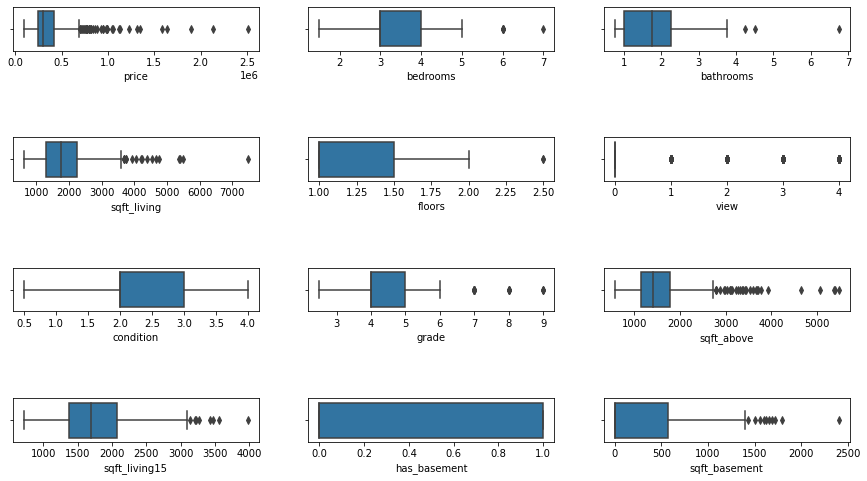

boxplot data for Seatac


<Figure size 432x288 with 0 Axes>

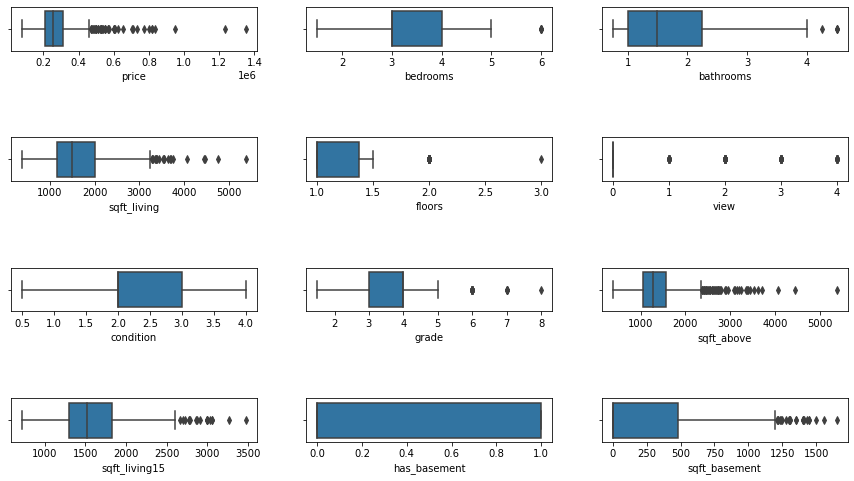

boxplot data for Lake Forest Park


<Figure size 432x288 with 0 Axes>

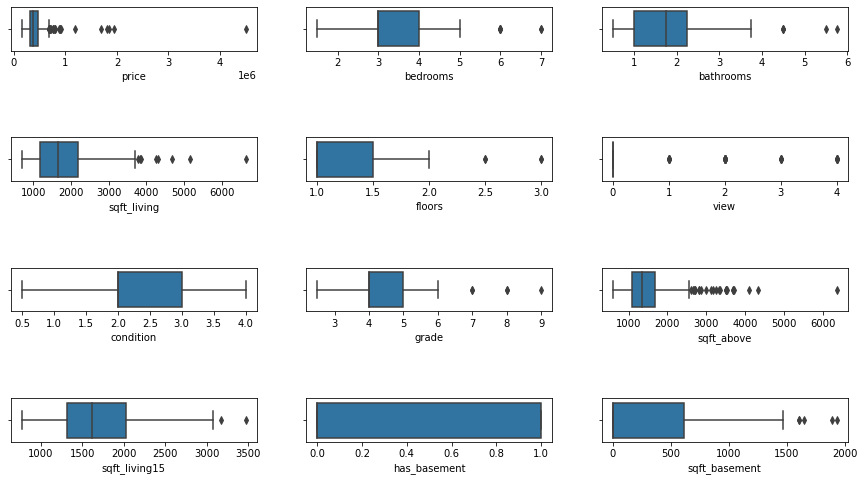

<Figure size 432x288 with 0 Axes>

In [61]:
for i in city_dfs.keys():
    print('boxplot data for {}'.format(i))
    
    fig, ax = plt.subplots(figsize=(15,8), nrows=4, ncols=3)
    plt.subplots_adjust(hspace=2)
    
    sns.boxplot(city_dfs[i]['price'],data=city_dfs[i],ax=ax[0][0])
    sns.boxplot(city_dfs[i]['bedrooms'],data=city_dfs[i],ax=ax[0][1])
    sns.boxplot(city_dfs[i]['bathrooms'],data=city_dfs[i],ax=ax[0][2])
    sns.boxplot(city_dfs[i]['sqft_living'],data=city_dfs[i],ax=ax[1][0])
    sns.boxplot(city_dfs[i]['floors'],data=city_dfs[i],ax=ax[1][1])
    sns.boxplot(city_dfs[i]['view'],data=city_dfs[i],ax=ax[1][2])
    sns.boxplot(city_dfs[i]['condition'],data=city_dfs[i],ax=ax[2][0])
    sns.boxplot(city_dfs[i]['grade'],data=city_dfs[i],ax=ax[2][1])
    sns.boxplot(city_dfs[i]['sqft_above'],data=city_dfs[i],ax=ax[2][2])
    sns.boxplot(city_dfs[i]['sqft_living15'],data=city_dfs[i],ax=ax[3][0])
    sns.boxplot(city_dfs[i]['has_basement'],data=city_dfs[i],ax=ax[3][1])
    sns.boxplot(city_dfs[i]['sqft_basement'],data=city_dfs[i],ax=ax[3][2])
    
    plt.show()
    
    plt.clf()
# Boxplot after the outlier treatment

Algona


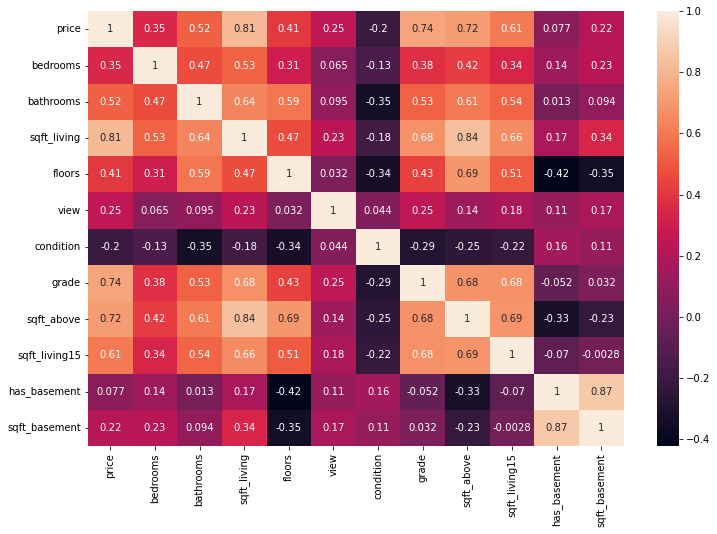

Auburn


<Figure size 432x288 with 0 Axes>

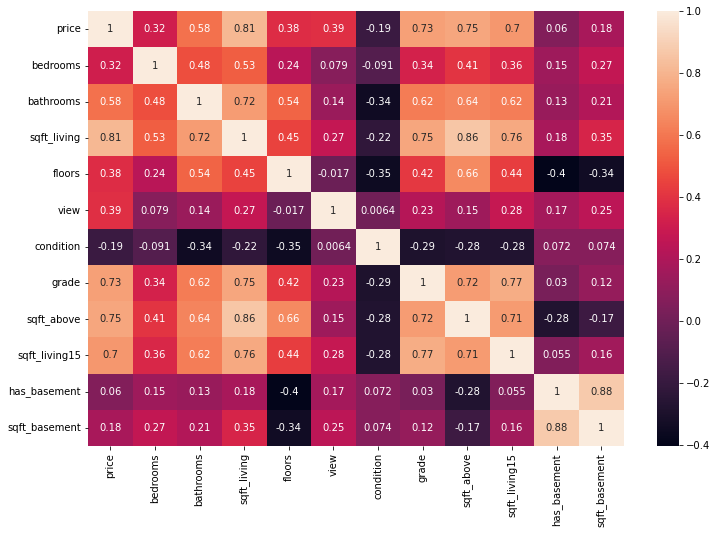

Federal Way


<Figure size 432x288 with 0 Axes>

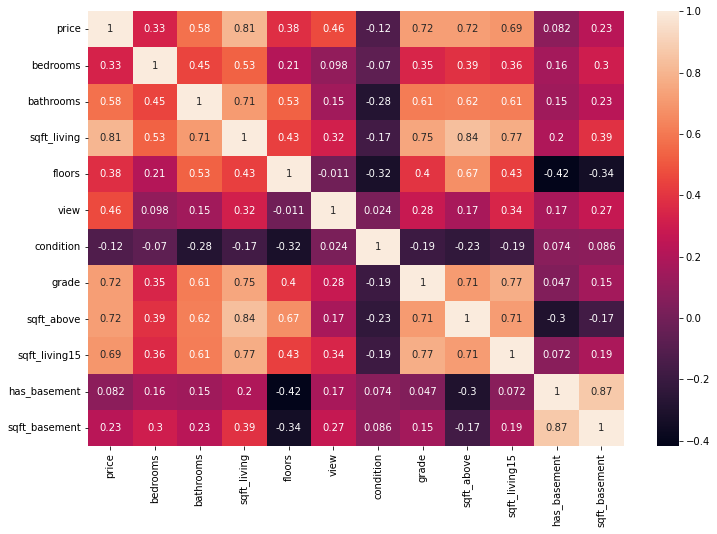

Bellevue


<Figure size 432x288 with 0 Axes>

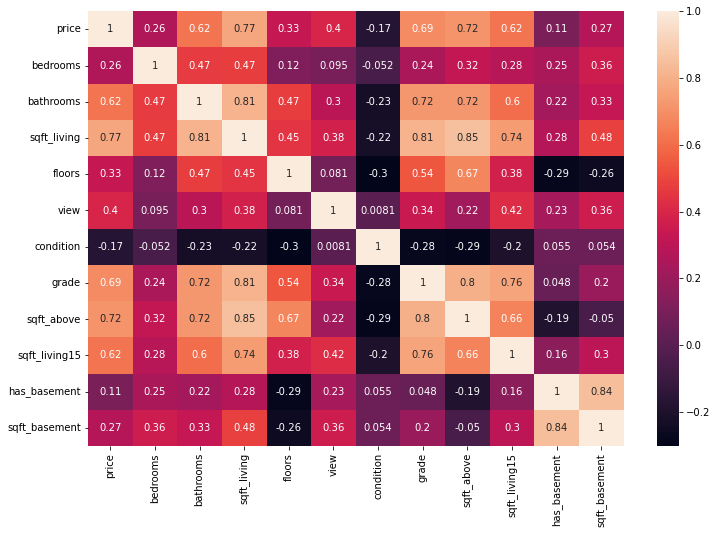

Yarrow Point


<Figure size 432x288 with 0 Axes>

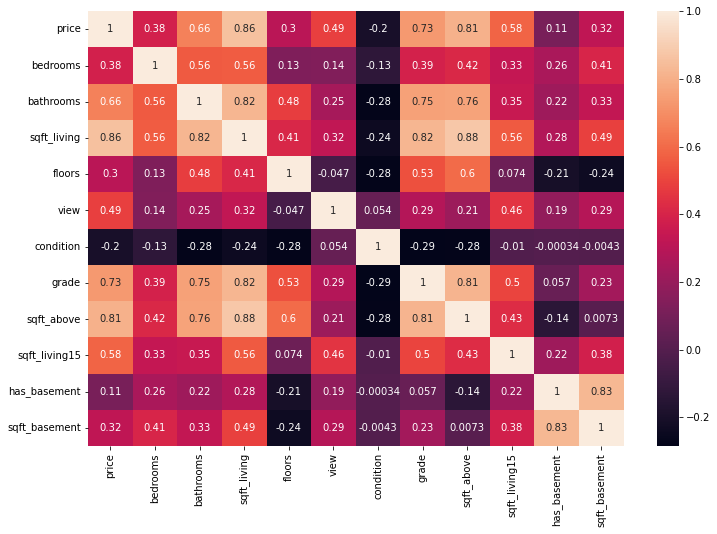

Black Diamond


<Figure size 432x288 with 0 Axes>

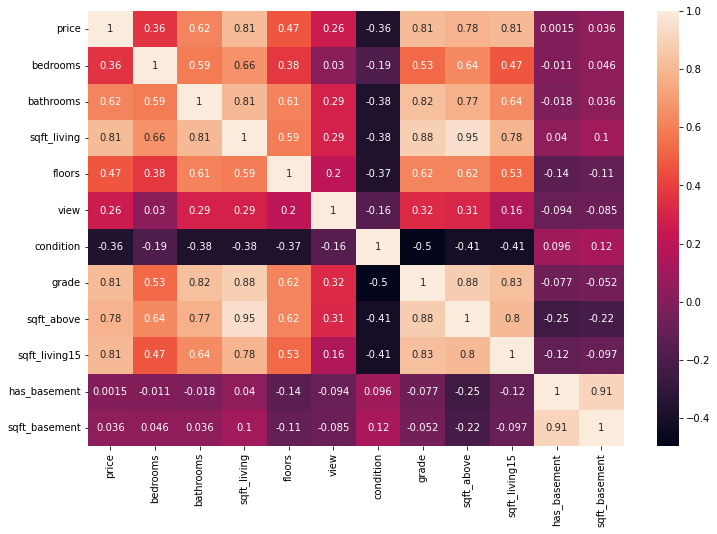

Bothell


<Figure size 432x288 with 0 Axes>

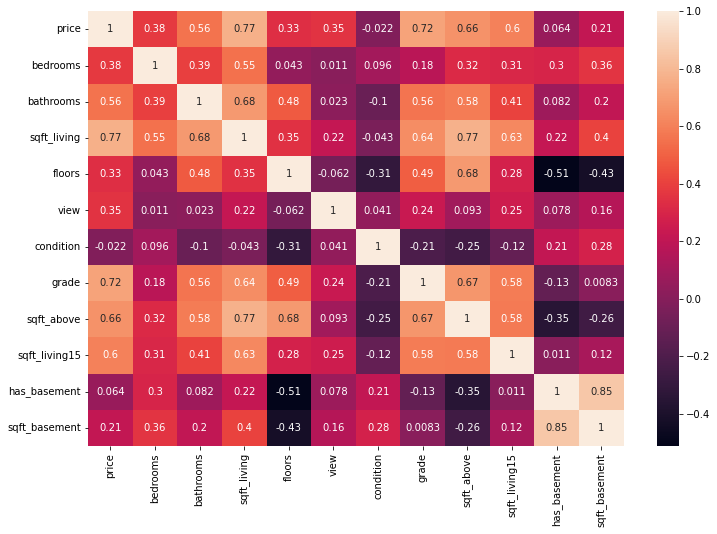

Carnation


<Figure size 432x288 with 0 Axes>

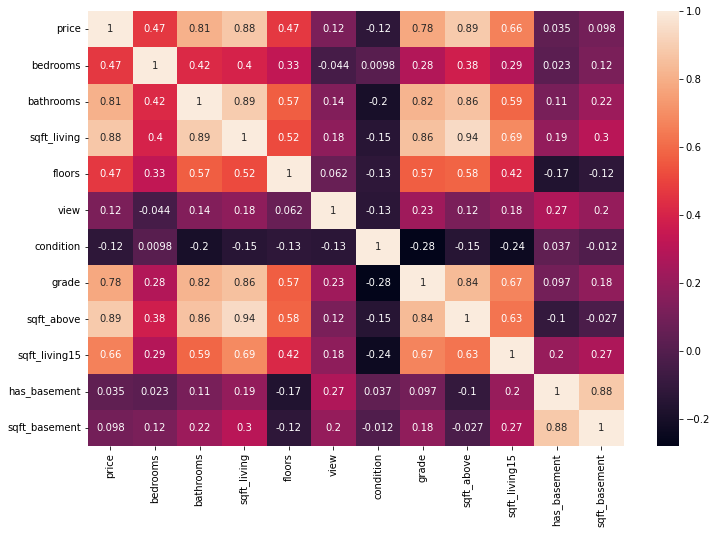

Duvall


<Figure size 432x288 with 0 Axes>

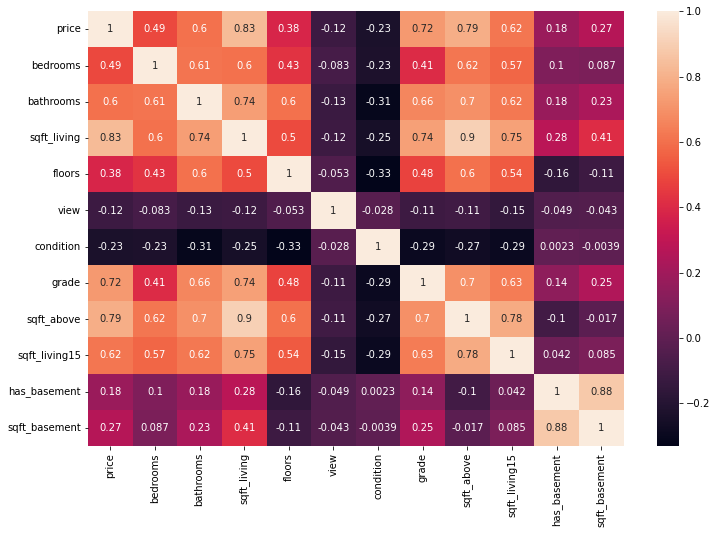

Enumclaw


<Figure size 432x288 with 0 Axes>

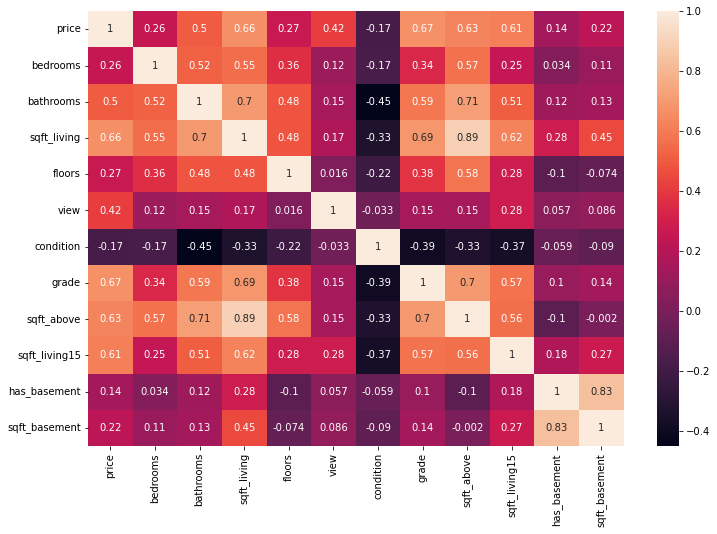

Fall City


<Figure size 432x288 with 0 Axes>

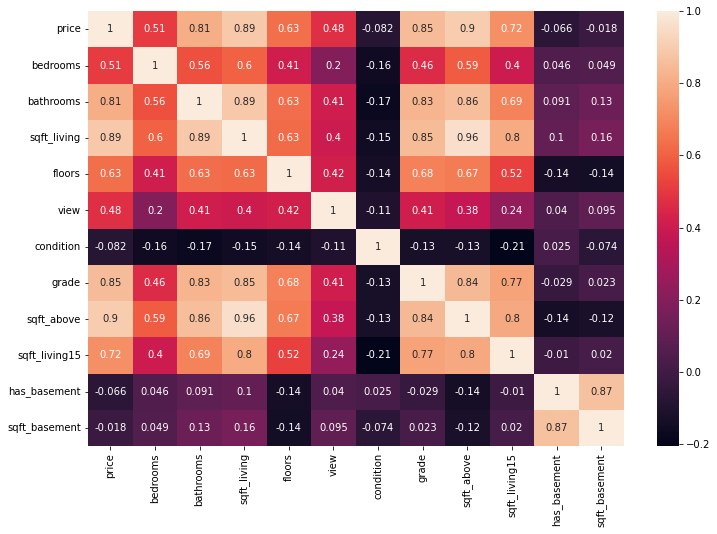

Issaquah


<Figure size 432x288 with 0 Axes>

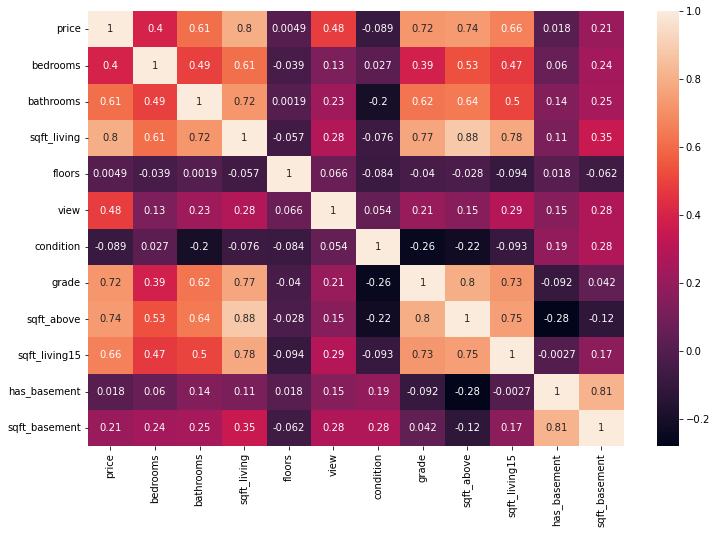

Kent


<Figure size 432x288 with 0 Axes>

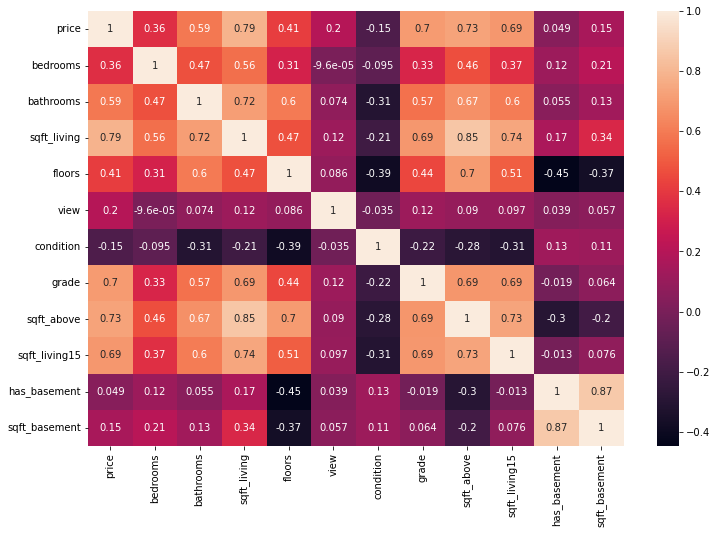

Kirkland


<Figure size 432x288 with 0 Axes>

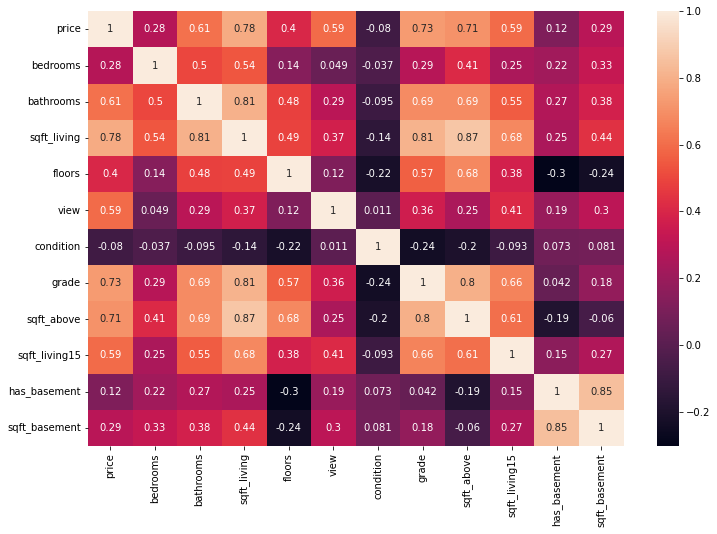

Maple Valley


<Figure size 432x288 with 0 Axes>

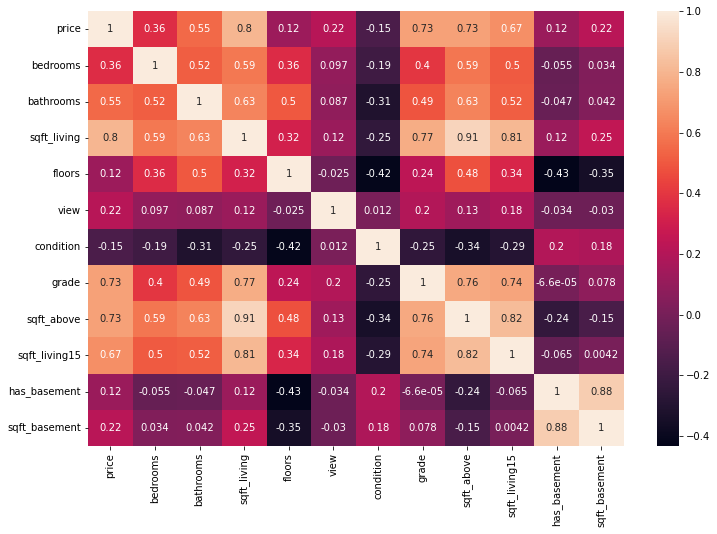

Medina


<Figure size 432x288 with 0 Axes>

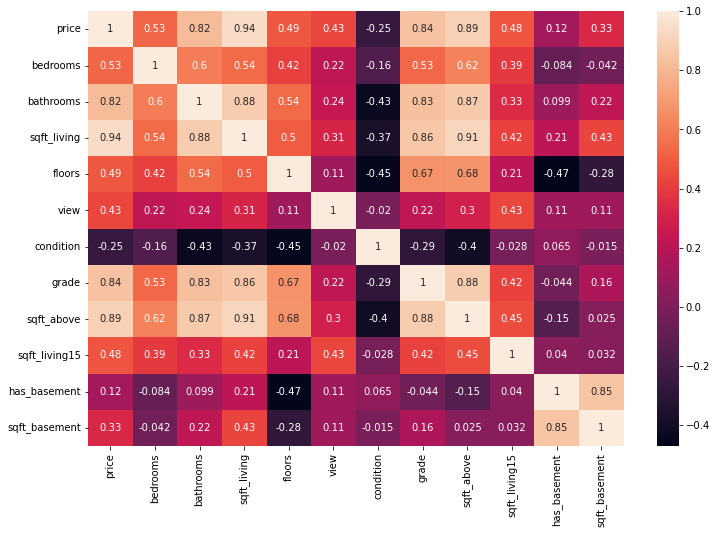

Mercer Island


<Figure size 432x288 with 0 Axes>

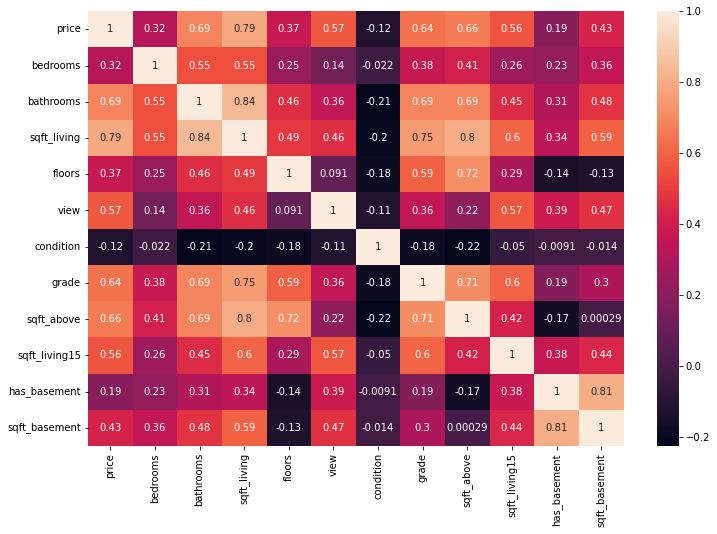

Kenmore


<Figure size 432x288 with 0 Axes>

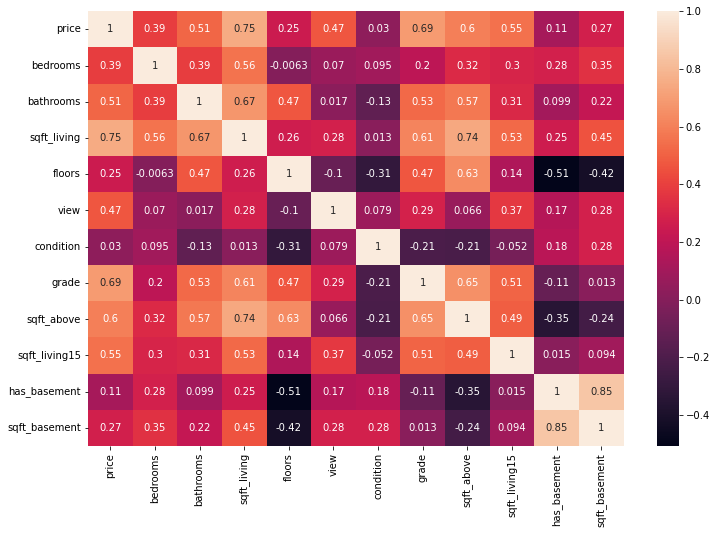

Covington


<Figure size 432x288 with 0 Axes>

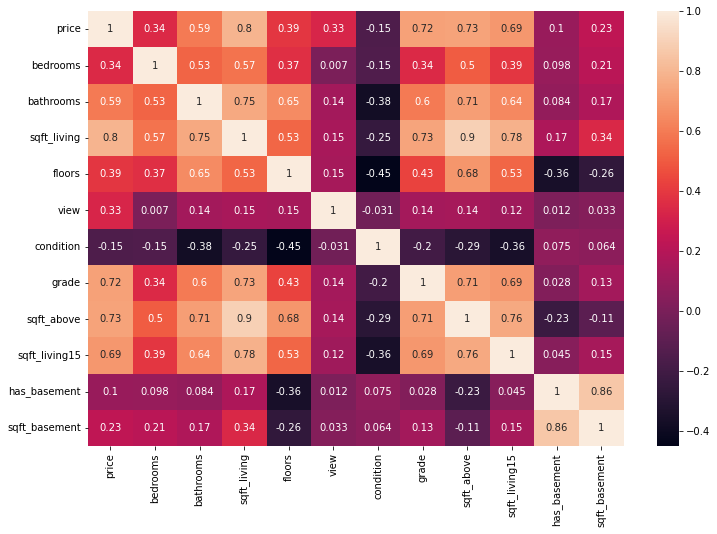

North Bend


<Figure size 432x288 with 0 Axes>

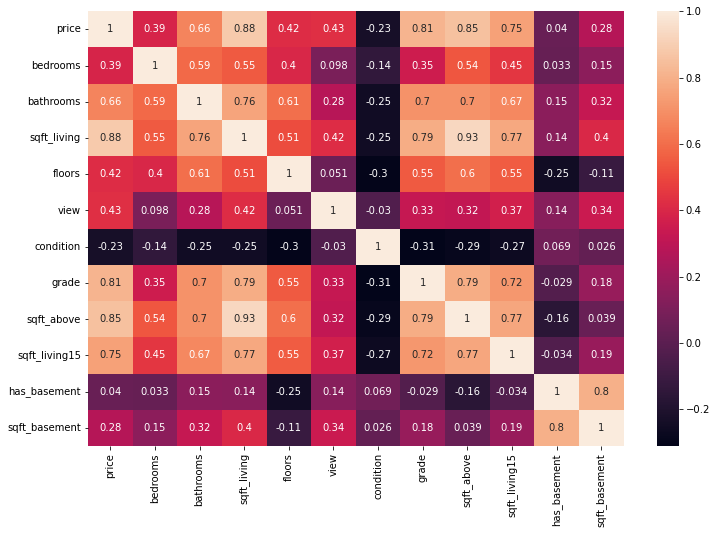

Redmond


<Figure size 432x288 with 0 Axes>

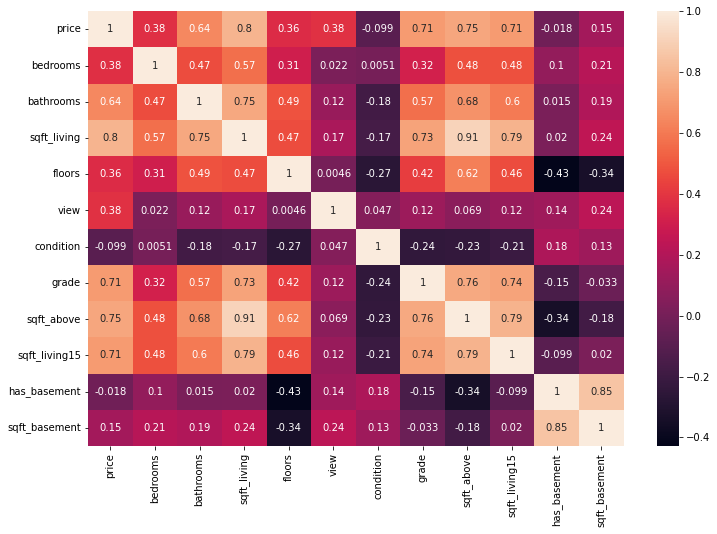

Renton


<Figure size 432x288 with 0 Axes>

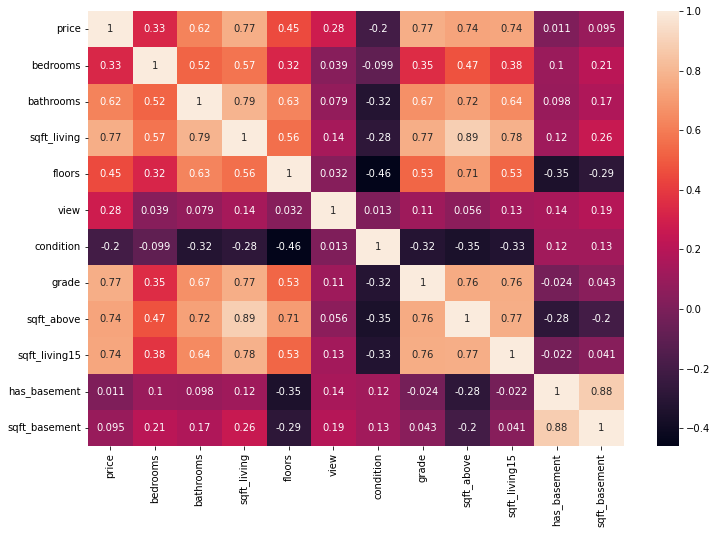

Newcastle


<Figure size 432x288 with 0 Axes>

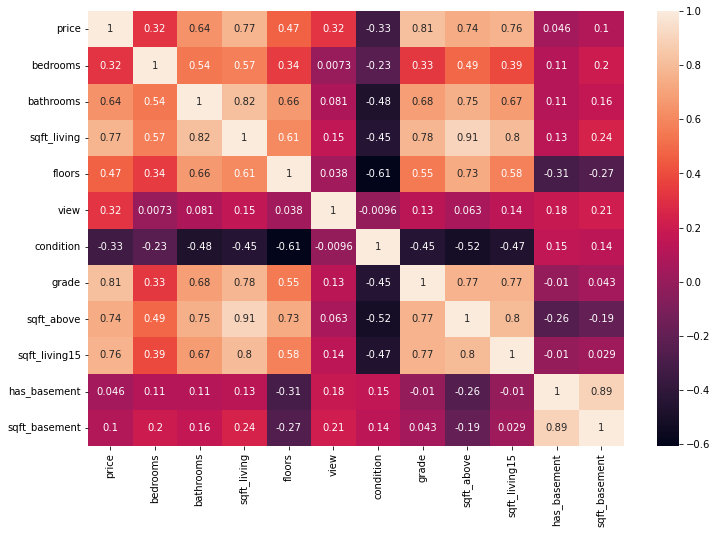

Snoqualmie


<Figure size 432x288 with 0 Axes>

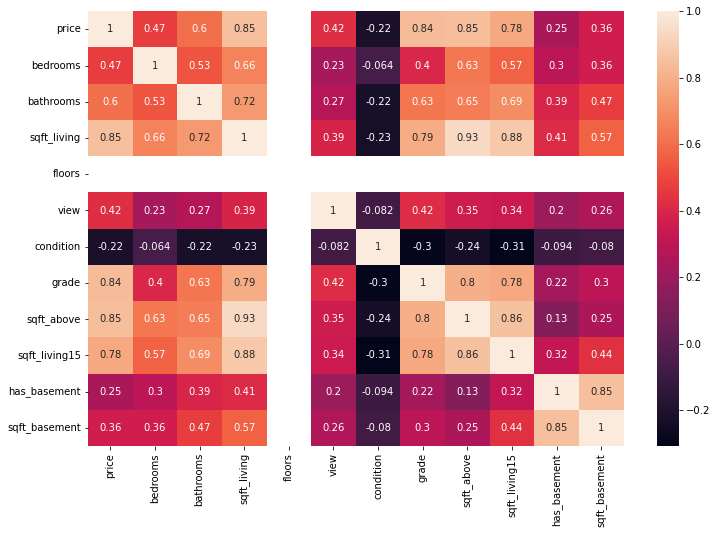

Vashon


<Figure size 432x288 with 0 Axes>

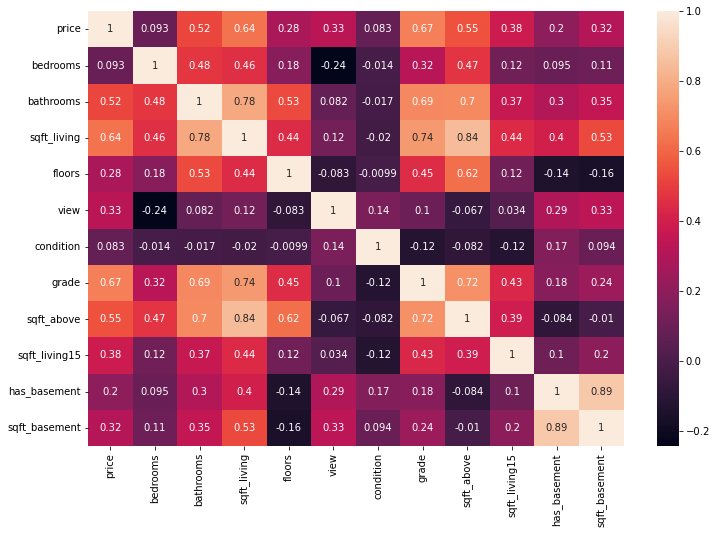

Woodinville


<Figure size 432x288 with 0 Axes>

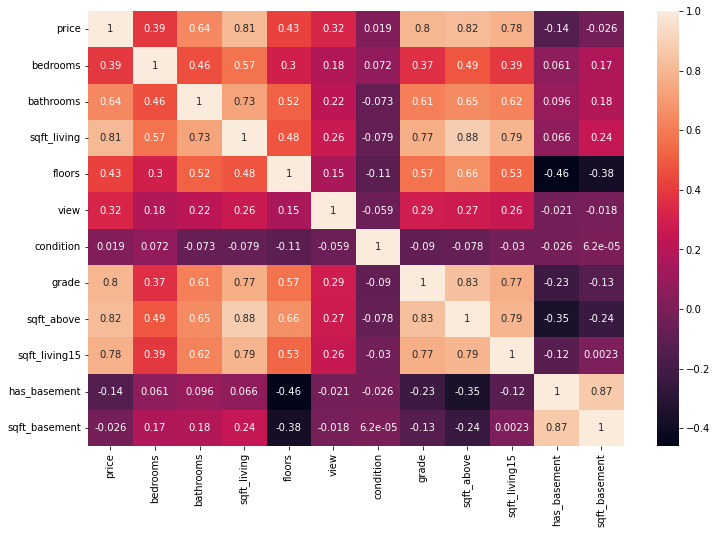

Sammamish


<Figure size 432x288 with 0 Axes>

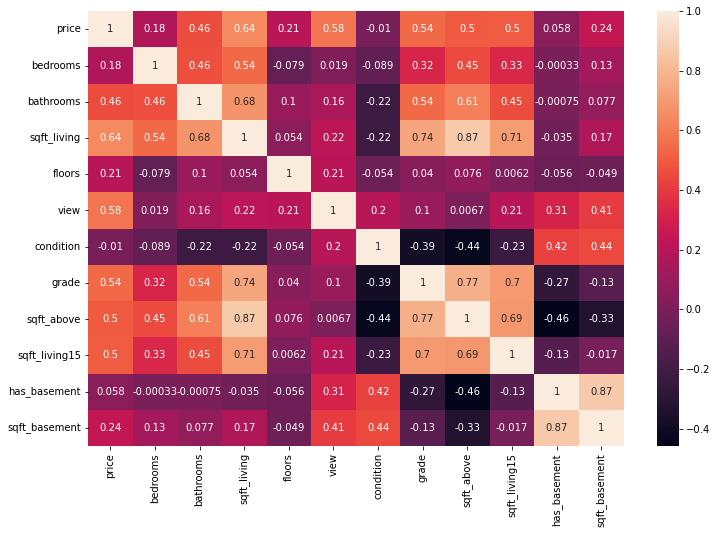

Seattle


<Figure size 432x288 with 0 Axes>

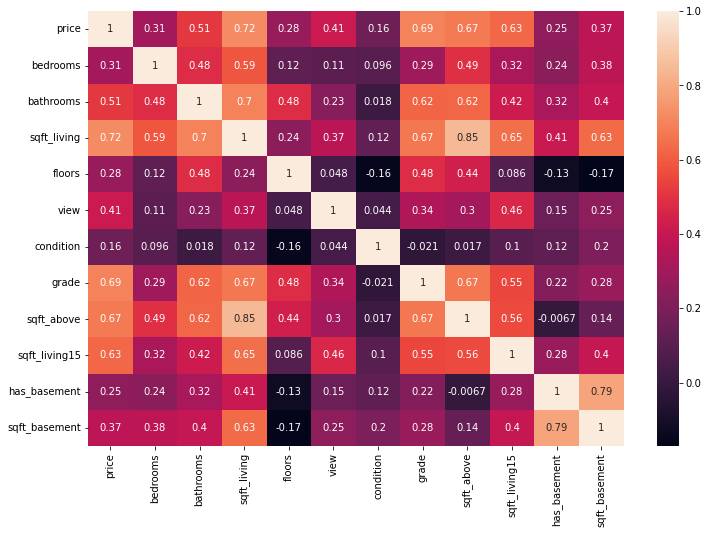

Tukwila


<Figure size 432x288 with 0 Axes>

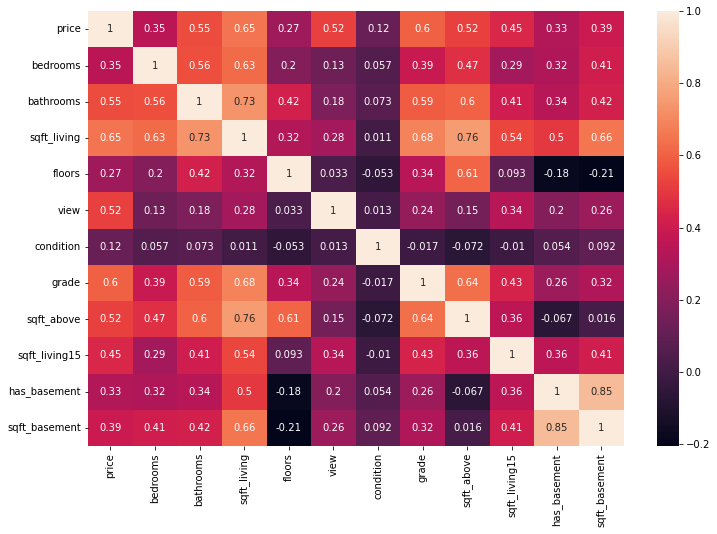

Shoreline


<Figure size 432x288 with 0 Axes>

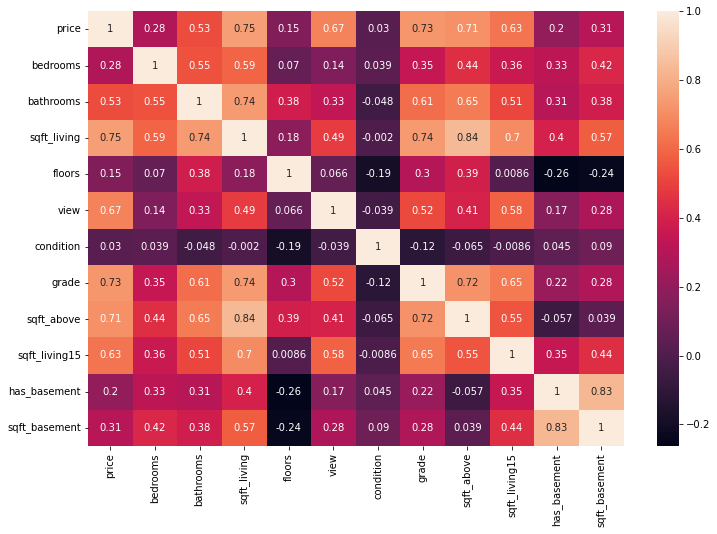

Burien


<Figure size 432x288 with 0 Axes>

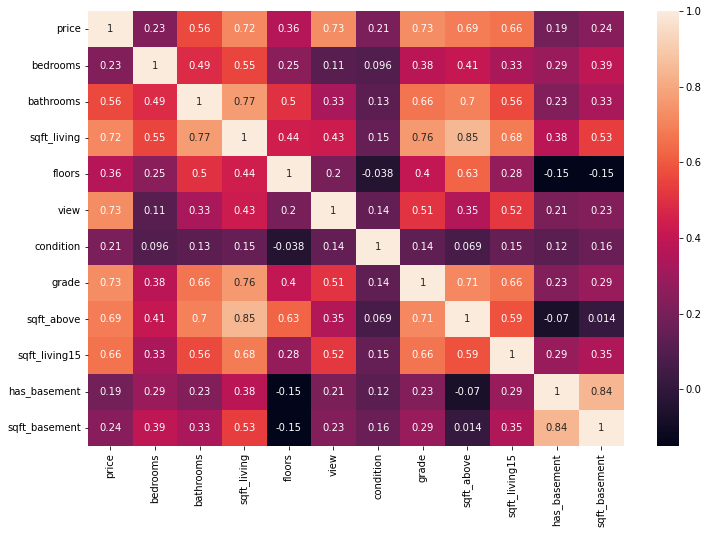

Des Moines


<Figure size 432x288 with 0 Axes>

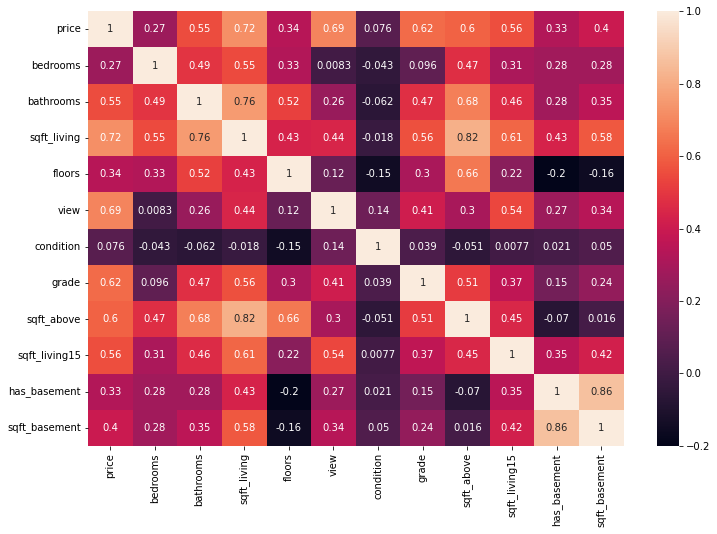

Normandy Park


<Figure size 432x288 with 0 Axes>

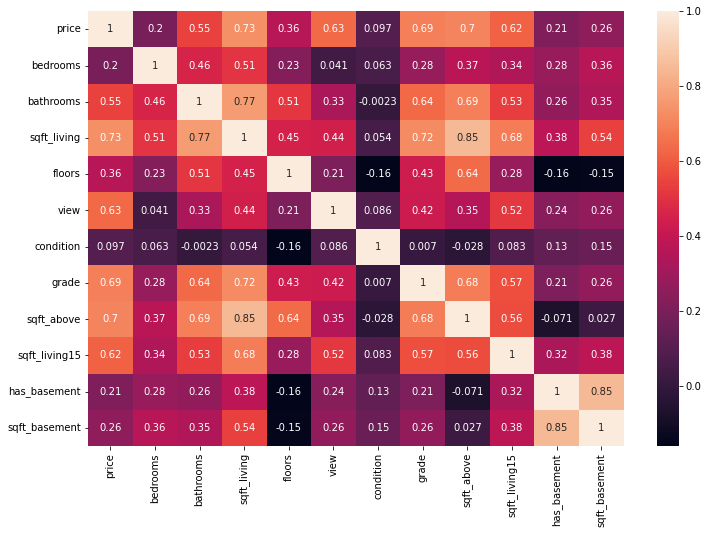

Seatac


<Figure size 432x288 with 0 Axes>

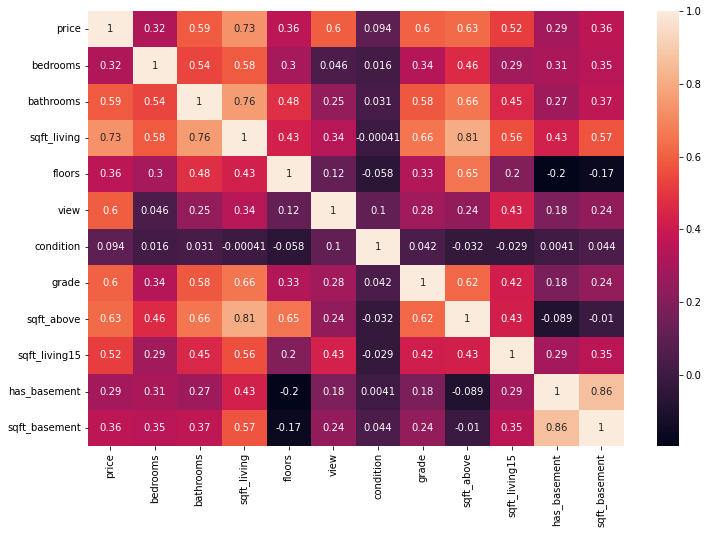

Lake Forest Park


<Figure size 432x288 with 0 Axes>

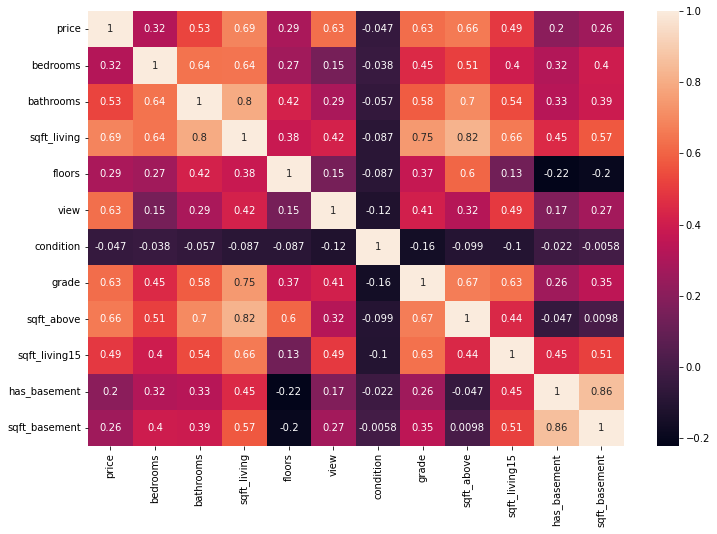

<Figure size 432x288 with 0 Axes>

In [62]:
for i in city_dfs.keys():

    print('{}'.format(i))
    fig, ax = plt.subplots(figsize=(12,8))
    sns.heatmap(city_dfs[i].loc[:,boxplot_cols].corr(), annot=True)

    plt.show()
    plt.clf()

# Heatmap after the outlier treatment

In [63]:
boxplot_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_living15',
 'has_basement',
 'sqft_basement']

In [64]:
for i in city_dfs.keys():
    print('{}: {}'.format(i,len(city_dfs[i])))

Algona: 361
Auburn: 1690
Federal Way: 1140
Bellevue: 1407
Yarrow Point: 317
Black Diamond: 100
Bothell: 478
Carnation: 124
Duvall: 190
Enumclaw: 233
Fall City: 80
Issaquah: 1092
Kent: 1201
Kirkland: 977
Maple Valley: 589
Medina: 50
Mercer Island: 282
Kenmore: 283
Covington: 547
North Bend: 220
Redmond: 1418
Renton: 1597
Newcastle: 874
Snoqualmie: 308
Vashon: 117
Woodinville: 273
Sammamish: 359
Seattle: 8973
Tukwila: 853
Shoreline: 1194
Burien: 868
Des Moines: 337
Normandy Park: 591
Seatac: 742
Lake Forest Park: 446


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

col_selector = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade',
               'sqft_above', 'sqft_living15', 'has_basement', 'recently_renovated']

model_dict= {}
error_dict = {}

for i in city_dfs.keys():
    
    X = city_dfs[i][col_selector]
    y = city_dfs[i]['price']
    
    test = None
    
    if len(city_dfs[i]) < 300:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
        test = 0.4
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        test = 0.3
    
    lr = LinearRegression()
    
    lr.fit(X_train, y_train)
    rsquared = lr.score(X_train, y_train)
    y_pred = lr.predict(X_test)
    MAE = mean_absolute_error(y_pred, y_test)
    RMSE = np.sqrt(mean_squared_error(y_pred, y_test))


    
    model_dict[i] = [lr, rsquared, test]
    error_dict[i] = [MAE, RMSE]

In [66]:
model_dict['Algona']

[LinearRegression(), 0.7325842991607098, 0.3]

In [67]:
error_dict['Algona']

[35399.65819174579, 48645.46931507726]

In [68]:
for i in city_dfs.keys():
    print('{}: {}, {}'.format(i,model_dict[i][1], model_dict[i][2]))

Algona: 0.7325842991607098, 0.3
Auburn: 0.7442574692077638, 0.3
Federal Way: 0.7439699021062978, 0.3
Bellevue: 0.6897982217787652, 0.3
Yarrow Point: 0.8303209616833567, 0.3
Black Diamond: 0.8902548611794415, 0.4
Bothell: 0.6749884723030053, 0.3
Carnation: 0.8034369927364672, 0.4
Duvall: 0.7870867449382224, 0.4
Enumclaw: 0.6039391139283796, 0.4
Fall City: 0.8421085944835714, 0.4
Issaquah: 0.7361284358243103, 0.3
Kent: 0.724467084156806, 0.3
Kirkland: 0.7525931368396773, 0.3
Maple Valley: 0.7650728830662743, 0.3
Medina: 0.9221830101451419, 0.4
Mercer Island: 0.6964502973768948, 0.4
Kenmore: 0.7630417643321165, 0.4
Covington: 0.736114980026282, 0.3
North Bend: 0.8499891582226697, 0.4
Redmond: 0.7482304391696999, 0.3
Renton: 0.7424966894454024, 0.3
Newcastle: 0.7641091698396436, 0.3
Snoqualmie: 0.7902051543667596, 0.3
Vashon: 0.706502592721538, 0.4
Woodinville: 0.7796832480474222, 0.4
Sammamish: 0.6608729843875749, 0.3
Seattle: 0.6386846045975356, 0.3
Tukwila: 0.5946042943939208, 0.3
Shore

In [69]:
for i in city_dfs.keys():
    print('{}: MAE:{}, RMSE: {}'.format(i, error_dict[i][0], error_dict[i][1]))

Algona: MAE:35399.65819174579, RMSE: 48645.46931507726
Auburn: MAE:38257.73122856115, RMSE: 62561.80970953809
Federal Way: MAE:33925.51441519646, RMSE: 47892.97301230617
Bellevue: MAE:221936.71237199364, RMSE: 328936.2410310719
Yarrow Point: MAE:233533.36340978518, RMSE: 345674.30590869515
Black Diamond: MAE:92213.3584187696, RMSE: 124470.85868564491
Bothell: MAE:46806.19643710909, RMSE: 66591.79763761527
Carnation: MAE:85451.88865510578, RMSE: 127795.05712023673
Duvall: MAE:45760.73521890533, RMSE: 70840.63626459733
Enumclaw: MAE:53045.348130191545, RMSE: 72326.5487254292
Fall City: MAE:136529.48077727575, RMSE: 189222.21092060697
Issaquah: MAE:84215.44609191825, RMSE: 128516.49097150145
Kent: MAE:34687.34351973096, RMSE: 60282.16602693679
Kirkland: MAE:141998.07665647237, RMSE: 240776.07522010643
Maple Valley: MAE:57570.6268165605, RMSE: 85877.4893505341
Medina: MAE:365727.65070627176, RMSE: 498550.002461854
Mercer Island: MAE:214206.09233210405, RMSE: 299879.8587039157
Kenmore: MAE:

In [70]:
for i in city_dfs.keys():
    for x in boxplot_cols:
        if (x == 'view') or (x == 'condition') or (x == 'grade'):
            df = city_dfs[i][x].cat.codes
        else:
            df = city_dfs[i][x]
        print(df.skew())

1.5610597610311685
0.2155089203346821
-0.34215856207016515
1.123799770675479
0.33394312143121374


AttributeError: Can only use .cat accessor with a 'category' dtype

In [79]:
city_dfs['Algona']['view'].astype('category')

38       0.0
67       0.0
114      0.0
213      0.0
292      0.0
        ... 
21375    0.0
21463    0.0
21495    0.0
21549    0.0
21582    2.0
Name: view, Length: 361, dtype: category
Categories (4, float64): [0.0, 2.0, 3.0, 4.0]

In [81]:
change_cat_type = ['view', 'condition', 'grade']

for i in city_dfs.keys():
    for x in change_cat_type:
        city_dfs[i][x].astype('category')


In [93]:
for i in city_dfs.keys():
    for x in boxplot_cols:
        print('{}: {}: {}'.format(i, x, city_dfs[i][x].skew()))


Algona: price: 1.5610597610311685
Algona: bedrooms: 0.2155089203346821
Algona: bathrooms: -0.34215856207016515
Algona: sqft_living: 1.123799770675479
Algona: floors: 0.33394312143121374
Algona: view: 5.6661361572024935
Algona: condition: 0.7867268079326887
Algona: grade: 0.6995551093828294
Algona: sqft_above: 1.0019233165043109
Algona: sqft_living15: 0.9491976479562109
Algona: has_basement: 1.2162338923573184
Algona: sqft_basement: 2.427414709477352
Auburn: price: 2.400944378837179
Auburn: bedrooms: 0.6435904541146138
Auburn: bathrooms: 0.10098160685883258
Auburn: sqft_living: 1.2001614344716975
Auburn: floors: 0.41579097879920424
Auburn: view: 4.772225295212832
Auburn: condition: 0.5543854003641219
Auburn: grade: 0.7487606425369842
Auburn: sqft_above: 1.256205671162772
Auburn: sqft_living15: 0.7290577208272928
Auburn: has_basement: 0.9684427654277
Auburn: sqft_basement: 1.9307568450610297
Federal Way: price: 2.5939108210129196
Federal Way: bedrooms: 0.5726076612845721
Federal Way: bat

In [124]:
for i in city_dfs.keys():
    print('{}: {}'.format(i, city_dfs[i]['view'].skew()))

Algona: 5.6661361572024935
Auburn: 4.772225295212832
Federal Way: 4.477483595080967
Bellevue: 2.4585841808450843
Yarrow Point: 3.038947116216638
Black Diamond: 5.06834416942474
Bothell: 5.124650443864098
Carnation: 3.3682298013590892
Duvall: 9.6687175851748
Enumclaw: 1.3456065640479256
Fall City: 2.9511835383250697
Issaquah: 3.951246145496317
Kent: 9.503374374291267
Kirkland: 3.33750644414069
Maple Valley: 11.578854894496466
Medina: 2.5173211974435126
Mercer Island: 1.3147849726110281
Kenmore: 4.355965876197573
Covington: 8.616209849333739
North Bend: 2.775521666029668
Redmond: 5.688907469328405
Renton: 5.782217869661238
Newcastle: 5.123270913805021
Snoqualmie: 2.9120964026960334
Vashon: 0.8795355519021423
Woodinville: 6.437737756447965
Sammamish: 2.94055413326736
Seattle: 2.896195052140727
Tukwila: 3.559087911049504
Shoreline: 3.4929423818940637
Burien: 2.8643832433998764
Des Moines: 2.1331986676390433
Normandy Park: 1.896810117935194
Seatac: 3.2943169785165423
Lake Forest Park: 4.306

In [118]:
skew_view = []
for i in city_dfs.keys():
    skew_view.append(city_dfs[i]['view'].skew())



In [119]:
from statistics import mean
  
def avg(lst):
    return mean(lst)
  
print(avg(skew_view))

4.288526191915269


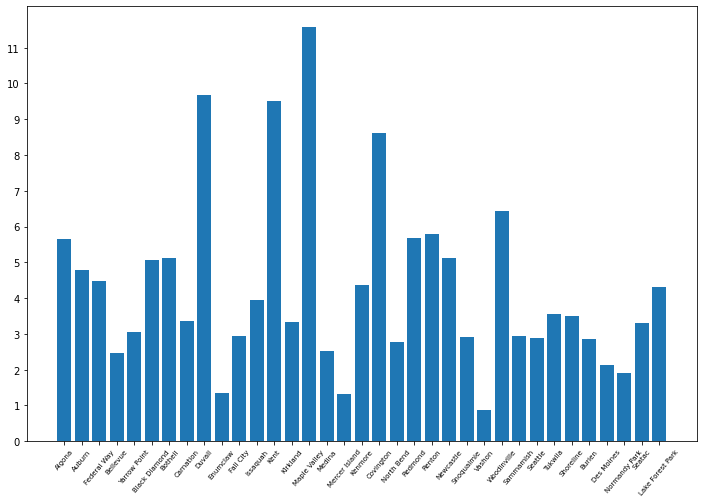

<Figure size 432x288 with 0 Axes>

In [132]:
# Skewness by view

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(list(range(len(city_dfs.keys()))), skew_view)

ax.set_xticks(list(range(len(city_dfs.keys()))))
ax.set_xticklabels(city_dfs.keys(), rotation =50, fontsize=7)
ax.set_yticks(list(range(0, 12)))

plt.show()
plt.clf()

In [120]:
col_selector

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'view',
 'grade',
 'sqft_above',
 'sqft_living15',
 'has_basement',
 'recently_renovated']

In [125]:
for i in city_dfs.keys():
    print('{}: {}'.format(i, city_dfs[i]['recently_renovated'].skew()))

Algona: 13.378776441015916
Auburn: 12.895778502236174
Federal Way: 16.815093678340855
Bellevue: 5.68093806785333
Yarrow Point: 3.848549632902655
Black Diamond: 0
Bothell: 15.41083081287769
Carnation: 11.135528725660025
Duvall: 9.6687175851748
Enumclaw: 7.4824660386321495
Fall City: 6.201763912117177
Issaquah: 16.454399422912857
Kent: 12.144959716641106
Kirkland: 10.93160877640264
Maple Valley: 13.940146201292002
Medina: 2.749859704614352
Mercer Island: 3.85264401340274
Kenmore: 11.831709485642952
Covington: 9.416142157447272
North Bend: 14.832396974191324
Redmond: 12.445463389540922
Renton: 10.549373833421491
Newcastle: 13.13001448867668
Snoqualmie: 17.549928774784263
Vashon: 7.548116778526724
Woodinville: 16.522711641858308
Sammamish: 10.846999010536672
Seattle: 5.802052653327996
Tukwila: 9.597513912345248
Shoreline: 7.170820046795736
Burien: 6.546346155942162
Des Moines: 12.922502184323923
Normandy Park: 6.280018482690479
Seatac: 13.536837646103947
Lake Forest Park: 6.847724203637027

In [127]:
skew_reno = []
for i in city_dfs.keys():
    skew_reno.append(city_dfs[i]['recently_renovated'].skew())

print(avg(skew_reno))

10.170535230053417


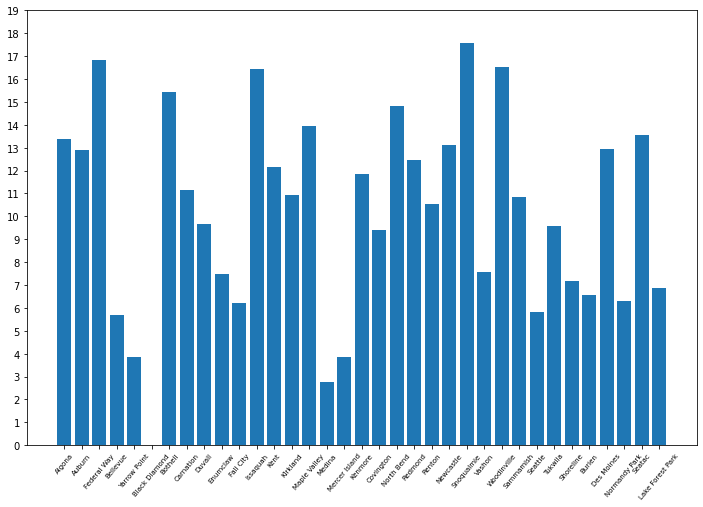

<Figure size 432x288 with 0 Axes>

In [134]:
# Skewness by recently renovated

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(list(range(len(city_dfs.keys()))), skew_reno)

ax.set_xticks(list(range(len(city_dfs.keys()))))
ax.set_xticklabels(city_dfs.keys(), rotation =50, fontsize=7)
ax.set_yticks(list(range(0, 20)))

plt.show()
plt.clf()

In [141]:
# Applying log transformation 

for i in city_dfs.keys():
    df_view = pd.DataFrame(city_dfs[i]['view'])

df_view

view
194     0.0
349     0.0
552     0.0
662     0.0
707     3.0
...     ...
19590   0.0
19591   0.0
20163   0.0
20757   0.0
20933   0.0

[446 rows x 1 columns]

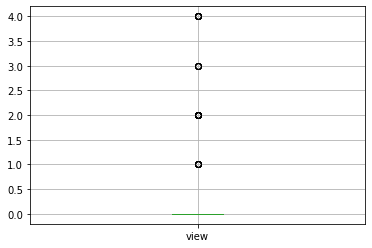

In [142]:
df_view.boxplot(column='view')
plt.show()

<AxesSubplot:ylabel='Density'>

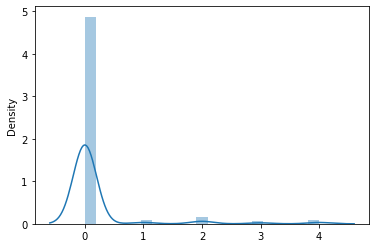

In [143]:
sns.distplot(df_view)

In [145]:
inp_array = df_view
print('input_array : ', inp_array)

input_array :         view
194     0.0
349     0.0
552     0.0
662     0.0
707     3.0
...     ...
19590   0.0
19591   0.0
20163   0.0
20757   0.0
20933   0.0

[446 rows x 1 columns]


In [148]:
inp_array.mean()

view    0.170404
dtype: float64

In [146]:
out_array = np.log10(inp_array)
print('output_array : ', out_array)

output_array :             view
194        -inf
349        -inf
552        -inf
662        -inf
707    0.477121
...         ...
19590      -inf
19591      -inf
20163      -inf
20757      -inf
20933      -inf

[446 rows x 1 columns]


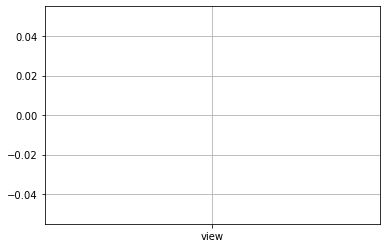

In [147]:
out_array.boxplot(column='view')
plt.show()

In [149]:
out_array.mean()

view   -inf
dtype: float64

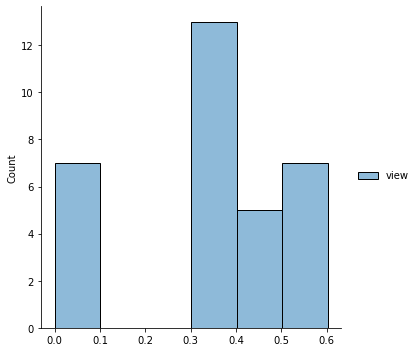

In [150]:
sns.displot(out_array)